In [1]:
!pip install pyreadstat


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-posthocs


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install lifelines matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install nbconvert


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyreadstat
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [6]:
dfe = pd.read_excel(r"C:\Users\jaime\Desktop\resultados TFG\Base_TFG_pruebas.xlsx")

In [7]:
dfe.head()

,NHC,ApellidosyNombre,Sexo,edad_ingreso,Fecha_Intervención,fecha_alta,Muerte,Fecha_muerte,dias_muerte,Causa,...,dislipemia,sobrepeso/obesidad,fumador,exfumador,IC,IAM,SC_intermedio/angina_inestable,Angina_estable,SCC,Antecedente_IAM
0,690,RODRIGUEZ SANCHEZ CONRADA,Mujer,74,2012-10-02,2012-10-05 00:00:00,1,2020-04-01,89.966667,Coronavirus,...,SI,SI,NaN,NaN,NaN,SI,NaN,NaN,0,NaN
1,7315,TORIBIO NUÑEZ JUAN CARLOS,Hombre,59,2018-05-09,2018-05-15 15:30:00,0,2021-04-06,34.900000,NaN,...,NaN,NaN,NaN,SI,SI,SI,NaN,NaN,0,NaN
2,24239,SANTOS GALLEGO MARIA CRUZ,Mujer,52,2019-04-23,2019-04-29 15:18:00,0,2020-10-27,18.133333,NaN,...,NaN,NaN,SI,NaN,NaN,SI,NaN,NaN,0,NaN
3,34470,TELLEZ CUIÑAS CARMEN,Mujer,81,2017-07-18,2017-07-23 00:00:00,0,2021-03-23,44.166667,NaN,...,SI,NaN,NaN,NaN,NaN,SI,NaN,NaN,0,NaN
4,49636,MARCOS MARTIN MACARIO,Hombre,79,2018-11-24,2018-12-07 16:13:00,0,2020-09-26,22.066667,NaN,...,SI,NaN,NaN,NaN,NaN,SI,NaN,NaN,0,SI


In [8]:
for columna in dfe.columns:
    num_faltantes = dfe[columna].isna().sum()
    
    print(f'Columna: {columna}')
    print(f'Número de valores faltantes: {num_faltantes}')
    print('---')

Columna: NHC
Número de valores faltantes: 0
---
Columna: ApellidosyNombre
Número de valores faltantes: 0
---
Columna: Sexo
Número de valores faltantes: 0
---
Columna: edad_ingreso
Número de valores faltantes: 0
---
Columna: Fecha_Intervención
Número de valores faltantes: 0
---
Columna: fecha_alta
Número de valores faltantes: 0
---
Columna: Muerte
Número de valores faltantes: 0
---
Columna: Fecha_muerte
Número de valores faltantes: 0
---
Columna: dias_muerte
Número de valores faltantes: 0
---
Columna: Causa
Número de valores faltantes: 151
---
Columna: Infarto
Número de valores faltantes: 0
---
Columna: Fecha_infarto
Número de valores faltantes: 0
---
Columna: Nueva_revascularización
Número de valores faltantes: 0
---
Columna: Fecha_Nueva_revascularización
Número de valores faltantes: 0
---
Columna: Ingeso_ICC
Número de valores faltantes: 0
---
Columna: Fecha_Ingreso_ICC
Número de valores faltantes: 0
---
Columna: Tronco_coronario
Número de valores faltantes: 0
---
Columna: DA
Número de

In [9]:
dfe.loc[dfe['Sexo'] == 'Hombre', 'Sexo'] = 0
dfe.loc[dfe['Sexo'] == 'Mujer', 'Sexo'] = 1

In [10]:
dfe.loc[dfe['tipo_procedimiento'] == 'ACTP', 'tipo_procedimiento'] = 0
dfe.loc[dfe['tipo_procedimiento'] == 'PONTAJE AORTOCORONARIO', 'tipo_procedimiento'] = 1

In [11]:
dfe.loc[dfe['Tipo_intervención_mitral'] == 'Anuloplastia', 'Tipo_intervención_mitral'] = 'anuloplastia'

In [12]:
columns_to_transform = ['HTA', 'DM', 'dislipemia', 'sobrepeso/obesidad', 'fumador', 'exfumador', 'IC', 'IAM', 'SC_intermedio/angina_inestable', 'Angina_estable', 'Antecedente_IAM']  # Especifica las columnas

In [13]:
for col in columns_to_transform:
    dfe[col] = np.where(dfe[col] == 'SI', 1, 0)
dfe

,NHC,ApellidosyNombre,Sexo,edad_ingreso,Fecha_Intervención,fecha_alta,Muerte,Fecha_muerte,dias_muerte,Causa,...,dislipemia,sobrepeso/obesidad,fumador,exfumador,IC,IAM,SC_intermedio/angina_inestable,Angina_estable,SCC,Antecedente_IAM
0,690,RODRIGUEZ SANCHEZ CONRADA,1,74,2012-10-02,2012-10-05 00:00:00,1,2020-04-01,89.966667,Coronavirus,...,1,1,0,0,0,1,0,0,0,0
1,7315,TORIBIO NUÑEZ JUAN CARLOS,0,59,2018-05-09,2018-05-15 15:30:00,0,2021-04-06,34.900000,NaN,...,0,0,0,1,1,1,0,0,0,0
2,24239,SANTOS GALLEGO MARIA CRUZ,1,52,2019-04-23,2019-04-29 15:18:00,0,2020-10-27,18.133333,NaN,...,0,0,1,0,0,1,0,0,0,0
3,34470,TELLEZ CUIÑAS CARMEN,1,81,2017-07-18,2017-07-23 00:00:00,0,2021-03-23,44.166667,NaN,...,1,0,0,0,0,1,0,0,0,0
4,49636,MARCOS MARTIN MACARIO,0,79,2018-11-24,2018-12-07 16:13:00,0,2020-09-26,22.066667,NaN,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,218805,GRANDE BLANCO MATIAS,0,72,2018-01-02,2018-01-11 15:22:00,0,2021-02-26,37.800000,NaN,...,1,1,0,1,0,0,0,0,0,1
177,3021770,SANCHEZ GONZALEZ ISABEL,1,82,2019-04-20,2019-05-17 15:29:00,0,2020-04-07,11.566667,NaN,...,1,0,0,0,1,0,0,0,0,0
178,2174769,MATEOS TOCINO CARLOS,0,66,2016-04-02,2016-05-11 00:00:00,0,2021-04-12,60.333333,NaN,...,0,0,0,0,1,0,0,0,0,0
179,236289,GONZALEZ MARTIN MARIA CARMEN,1,43,2016-05-03,2016-05-12 00:00:00,0,2021-03-19,58.533333,NaN,...,0,0,0,0,0,1,0,0,0,0


In [14]:
# Valores repetidos en Nhistoria
filas_repetidas = dfe[dfe["NHC"].duplicated(keep=False)]
filas_repetidas

,NHC,ApellidosyNombre,Sexo,edad_ingreso,Fecha_Intervención,fecha_alta,Muerte,Fecha_muerte,dias_muerte,Causa,...,dislipemia,sobrepeso/obesidad,fumador,exfumador,IC,IAM,SC_intermedio/angina_inestable,Angina_estable,SCC,Antecedente_IAM


In [15]:
dfe = dfe.rename(columns={'sobrepeso/obesidad': 'sobrepeso_obesidad'})
dfe = dfe.rename(columns={'SC_intermedio/angina_inestable': 'SC_intermedio_Angina_inestable'})
dfe = dfe.rename(columns={' Intervención_mitral': 'Intervencion_mitral'})
dfe = dfe.rename(columns={'días_FEVI_pre': 'dias_FEVI_pre'})
dfe = dfe.rename(columns={'días_FEVI_post': 'dias_FEVI_post'})

In [16]:
for columna in dfe.columns:
    num_faltantes = dfe[columna].isna().sum()
    
    print(f'Columna: {columna}')
    print(f'Número de valores faltantes: {num_faltantes}')
    print('---')

Columna: NHC
Número de valores faltantes: 0
---
Columna: ApellidosyNombre
Número de valores faltantes: 0
---
Columna: Sexo
Número de valores faltantes: 0
---
Columna: edad_ingreso
Número de valores faltantes: 0
---
Columna: Fecha_Intervención
Número de valores faltantes: 0
---
Columna: fecha_alta
Número de valores faltantes: 0
---
Columna: Muerte
Número de valores faltantes: 0
---
Columna: Fecha_muerte
Número de valores faltantes: 0
---
Columna: dias_muerte
Número de valores faltantes: 0
---
Columna: Causa
Número de valores faltantes: 151
---
Columna: Infarto
Número de valores faltantes: 0
---
Columna: Fecha_infarto
Número de valores faltantes: 0
---
Columna: Nueva_revascularización
Número de valores faltantes: 0
---
Columna: Fecha_Nueva_revascularización
Número de valores faltantes: 0
---
Columna: Ingeso_ICC
Número de valores faltantes: 0
---
Columna: Fecha_Ingreso_ICC
Número de valores faltantes: 0
---
Columna: Tronco_coronario
Número de valores faltantes: 0
---
Columna: DA
Número de

#### Crear variable Tabaquismo_Rec (No fumador = 0, Fumador = 1, Ex Fumador = 2)

In [17]:
# Condiciones 'Tabaquismo_Rec'
conditions = [
    (dfe['fumador'] == 0) & (dfe['exfumador'] == 0),
    (dfe['fumador'] == 1) & (dfe['exfumador'] == 0),
    (dfe['fumador'] == 0) & (dfe['exfumador'] == 1) 
]

choices = [0, 1, 2]

dfe['Tabaquismo_Rec'] = np.select(conditions, choices, default=np.nan)

print("\nDataFrame con Tabaquismo_Rec:")
dfe.head()


DataFrame con Tabaquismo_Rec:


,NHC,ApellidosyNombre,Sexo,edad_ingreso,Fecha_Intervención,fecha_alta,Muerte,Fecha_muerte,dias_muerte,Causa,...,sobrepeso_obesidad,fumador,exfumador,IC,IAM,SC_intermedio_Angina_inestable,Angina_estable,SCC,Antecedente_IAM,Tabaquismo_Rec
0,690,RODRIGUEZ SANCHEZ CONRADA,1,74,2012-10-02,2012-10-05 00:00:00,1,2020-04-01,89.966667,Coronavirus,...,1,0,0,0,1,0,0,0,0,0.0
1,7315,TORIBIO NUÑEZ JUAN CARLOS,0,59,2018-05-09,2018-05-15 15:30:00,0,2021-04-06,34.900000,NaN,...,0,0,1,1,1,0,0,0,0,2.0
2,24239,SANTOS GALLEGO MARIA CRUZ,1,52,2019-04-23,2019-04-29 15:18:00,0,2020-10-27,18.133333,NaN,...,0,1,0,0,1,0,0,0,0,1.0
3,34470,TELLEZ CUIÑAS CARMEN,1,81,2017-07-18,2017-07-23 00:00:00,0,2021-03-23,44.166667,NaN,...,0,0,0,0,1,0,0,0,0,0.0
4,49636,MARCOS MARTIN MACARIO,0,79,2018-11-24,2018-12-07 16:13:00,0,2020-09-26,22.066667,NaN,...,0,0,0,0,1,0,0,0,1,0.0


#### Creamos la variable 'tipo_causa' donde agrupamos las categorías de la varibale 'Causa' en función de si son cardiovasculares o no

In [18]:
categorias_unicas = dfe['Causa'].unique()
categorias_unicas

array(['Coronavirus', nan, 'IAM', 'ICC ', 'ACVA', 'CORONAVIRUS', 'SEPSIS',
       'muerte cardiovascular en residencia', 'LMA', 'EPOC',
       'Linfoma no Hodgkin', 'Muerte  subita cardiovascular', 'ICC',
       'Infarto agudo de miocarido', 'INFECCION RESPIRATORIA',
       'Fallo agudo de trasplante cardiaco', 'CARDIOVASCULAR'],
      dtype=object)

In [19]:
causas_cardiovasculares = ['ICC ', 'ICC', 'IAM', 'Infarto agudo de miocarido', 'ACVA', 'muerte cardiovascular en residencia', 'Muerte  subita cardiovascular', 'Fallo agudo de trasplante cardiaco', 'CARDIOVASCULAR']

# Creamos variable 'tipo_causa'
dfe['tipo_causa'] = dfe['Causa'].apply(
    lambda x: 'Cardiovascular' if isinstance(x, str) and any(kw in x for kw in causas_cardiovasculares) 
    else ('No Cardiovascular' if isinstance(x, str) else np.nan)
)

print(dfe['tipo_causa'].value_counts(dropna=False))  # dropna=False para incluir los valores faltantes en el conteo

tipo_causa
NaN                  151
Cardiovascular        19
No Cardiovascular     11
Name: count, dtype: int64


#### Creamos nuevas variables de pacientes que con lesión y que no han sido revascularizados 

In [20]:
# Creamos nuevas variables de pacientes que con lesión y que no han sido revascularizados 
dfe['DA_sin_revasc'] = ((dfe['DA'] == 1) & (dfe['DA_revasc'] == 0)).astype(int)
dfe['Cx_sin_revasc'] = ((dfe['Cx'] == 1) & (dfe['Cx_revasc'] == 0)).astype(int)
dfe['CD_sin_revasc'] = ((dfe['CD'] == 1) & (dfe['CD_revasc'] == 0)).astype(int)

#### Creamos la variable 'Muerte_o_Infarto' en función de si el paciente ha fallecido o ha sufrido un infarto en los primeros tres años tras la intervención

In [21]:
# Definir la nueva columna 'Muerte_o_Infarto'
def calcular_muerte_infarto(row):
    limite_dias = 3 * 365

    # Caso 1: Muerte=0, Infarto=0
    if row['Muerte'] == 0 and row['Infarto'] == 0:
        return 0

    # Caso 2: Muerte=1, Infarto=1
    if row['Muerte'] == 1 and row['Infarto'] == 1:
        diferencia_muerte = (row['Fecha_muerte'] - row['Fecha_Intervención']).days if pd.notna(row['Fecha_muerte']) else float('inf')
        diferencia_infarto = (row['Fecha_infarto'] - row['Fecha_Intervención']).days if pd.notna(row['Fecha_infarto']) else float('inf')

        if diferencia_muerte <= limite_dias or diferencia_infarto <= limite_dias:
            return 1
        else:
            return 0

    # Caso 3: Muerte=1, Infarto=0
    if row['Muerte'] == 1 and row['Infarto'] == 0:
        diferencia_muerte = (row['Fecha_muerte'] - row['Fecha_Intervención']).days if pd.notna(row['Fecha_muerte']) else float('inf')

        if diferencia_muerte <= limite_dias:
            return 1
        else:
            return 0

    # Caso 4: Muerte=0, Infarto=1
    if row['Muerte'] == 0 and row['Infarto'] == 1:
        diferencia_infarto = (row['Fecha_infarto'] - row['Fecha_Intervención']).days if pd.notna(row['Fecha_infarto']) else float('inf')

        if diferencia_infarto <= limite_dias:
            return 1
        else:
            return 0

# Aplicar la función a cada fila del DataFrame
dfe['Muerte_o_Infarto'] = dfe.apply(calcular_muerte_infarto, axis=1)

dfe[['Fecha_Intervención', 'Muerte', 'Fecha_muerte', 'Infarto', 'Fecha_infarto', 'Muerte_o_Infarto']]

,Fecha_Intervención,Muerte,Fecha_muerte,Infarto,Fecha_infarto,Muerte_o_Infarto
0,2012-10-02,1,2020-04-01,0,2021-04-20,0
1,2018-05-09,0,2021-04-06,0,2021-04-20,0
2,2019-04-23,0,2020-10-27,0,2021-04-20,0
3,2017-07-18,0,2021-03-23,1,2018-02-20,1
4,2018-11-24,0,2020-09-26,1,2019-05-16,1
...,...,...,...,...,...,...
176,2018-01-02,0,2021-02-26,0,2021-04-20,0
177,2019-04-20,0,2020-04-07,1,2019-10-25,1
178,2016-04-02,0,2021-04-12,0,2021-04-20,0
179,2016-05-03,0,2021-03-19,0,2021-04-20,0


#### Graficamos variables categóricas y realizamos conteo de cada una de las categorías de cada variable

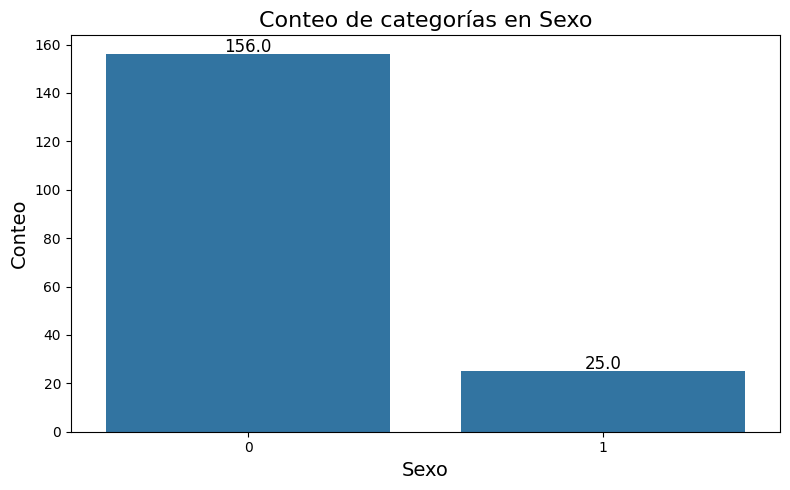

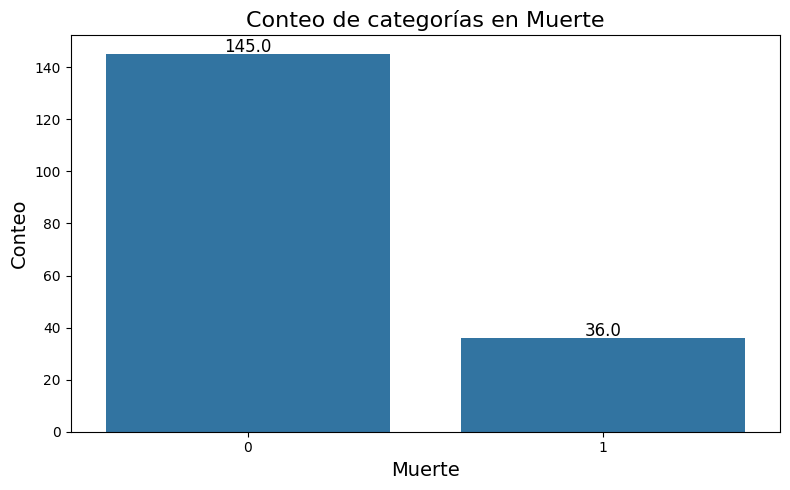

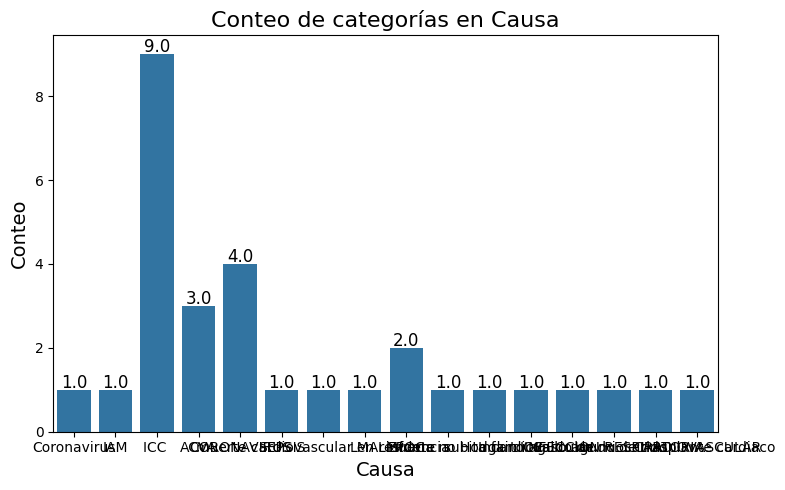

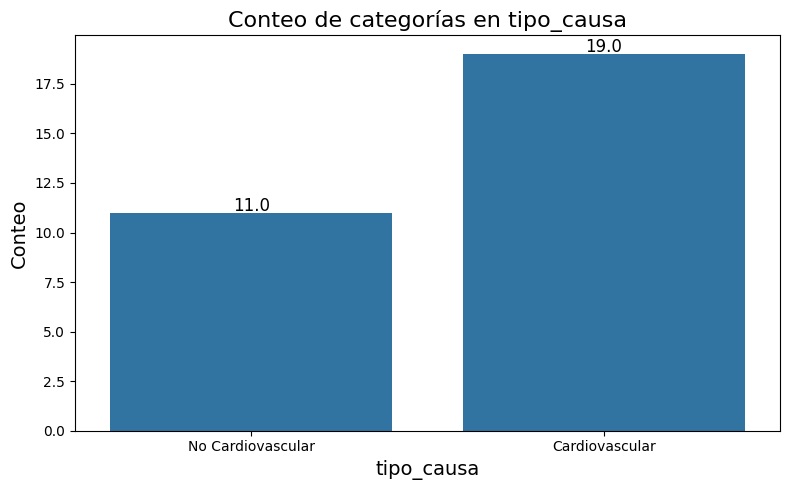

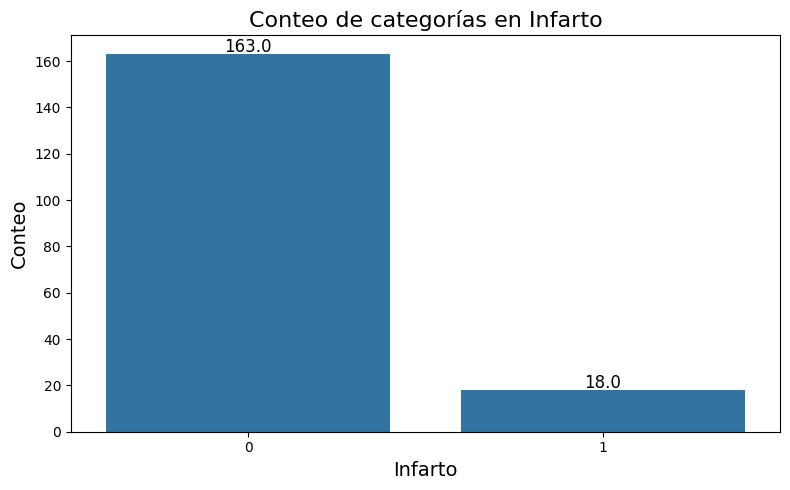

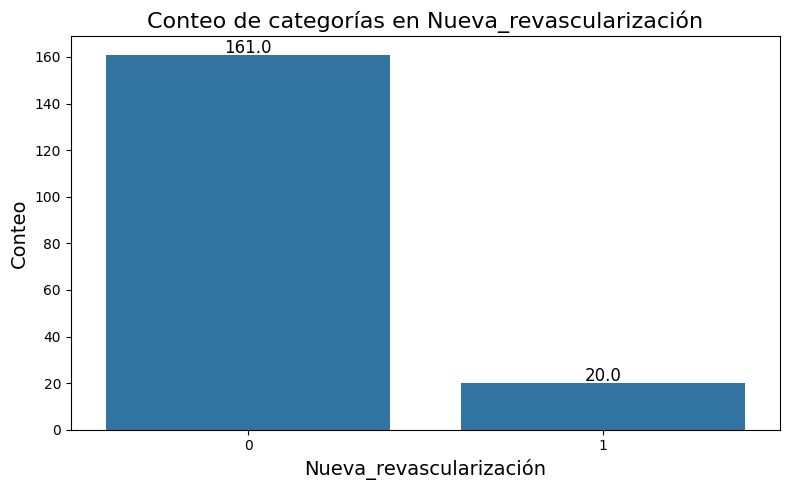

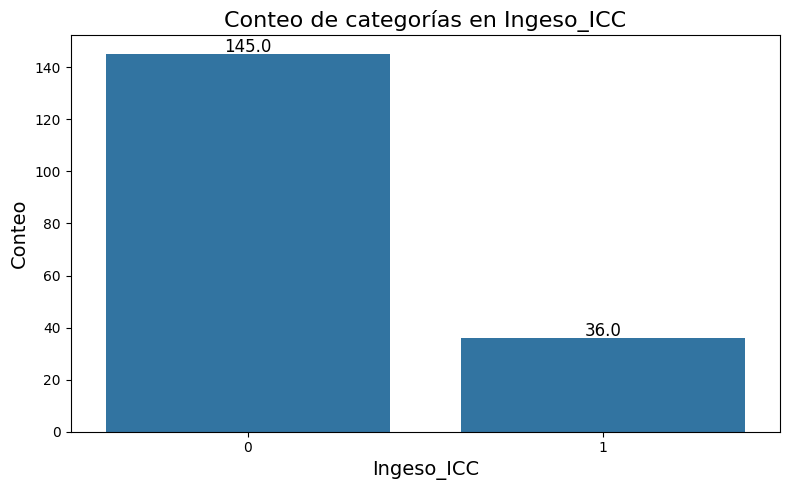

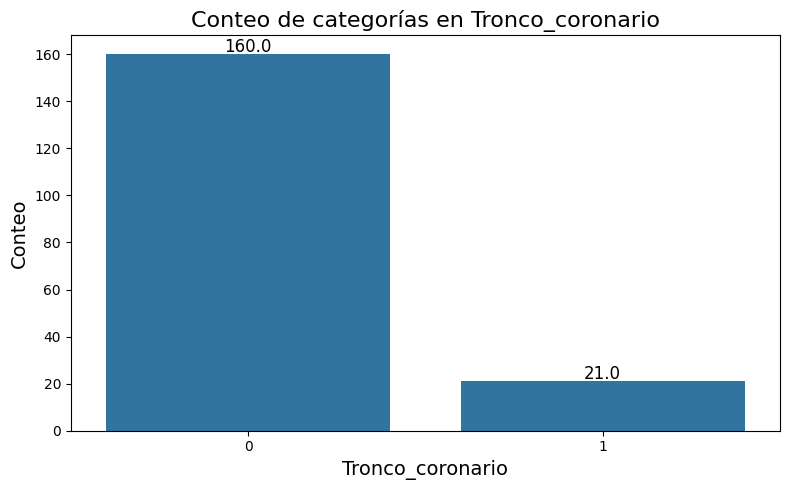

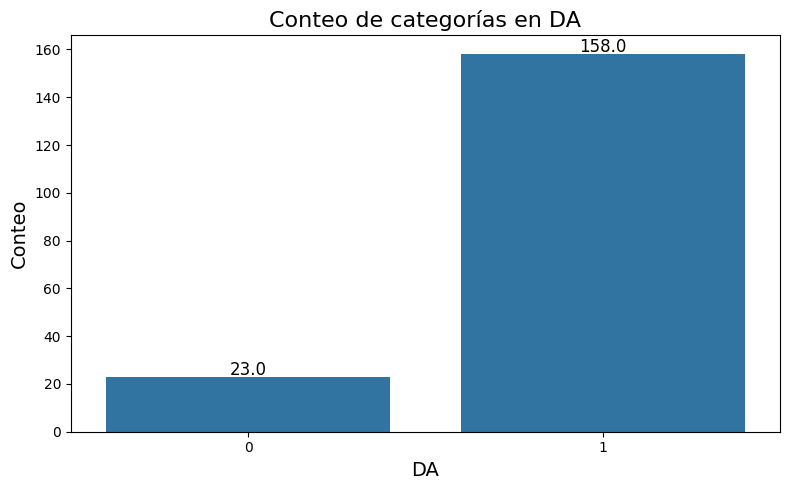

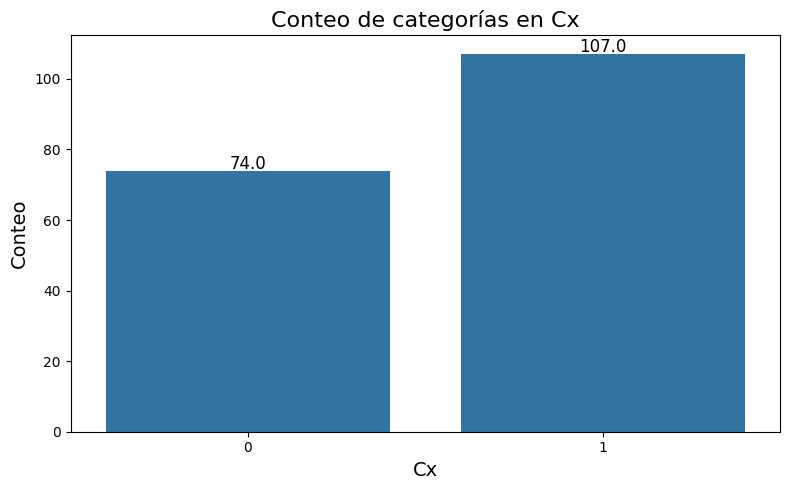

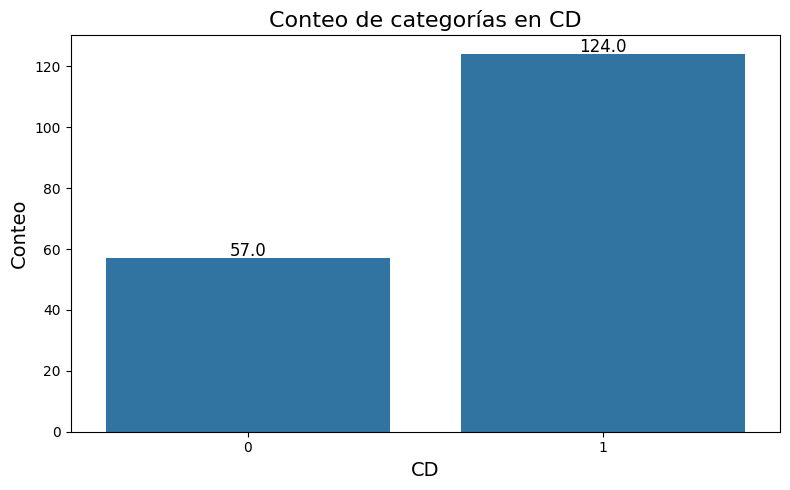

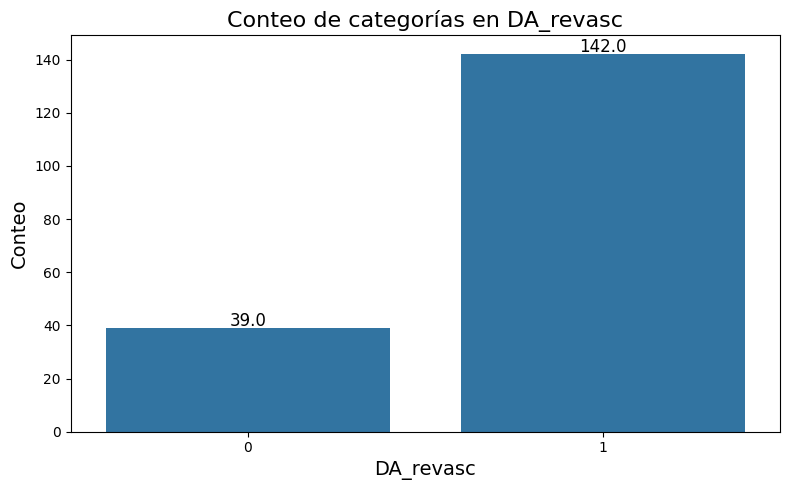

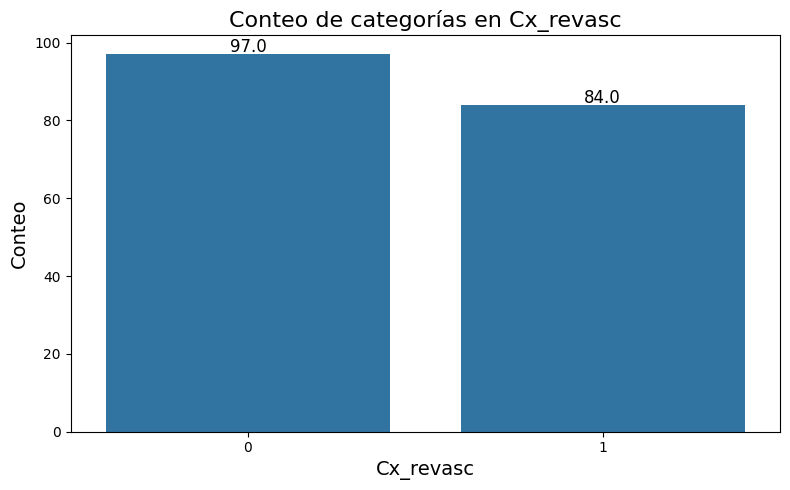

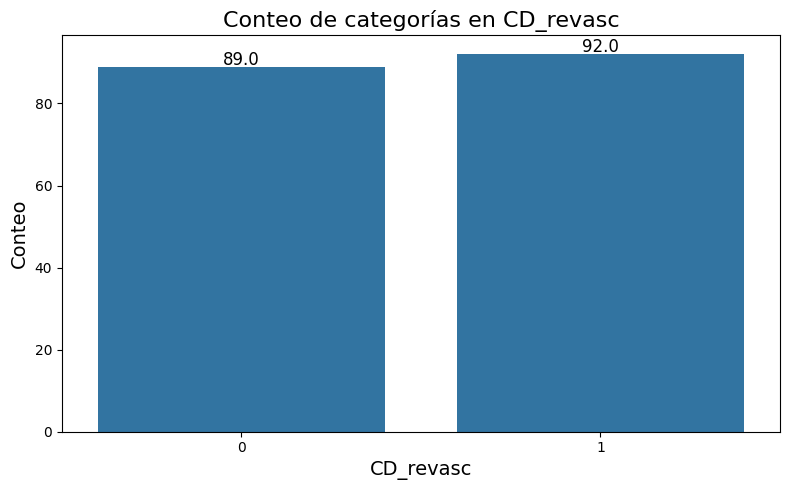

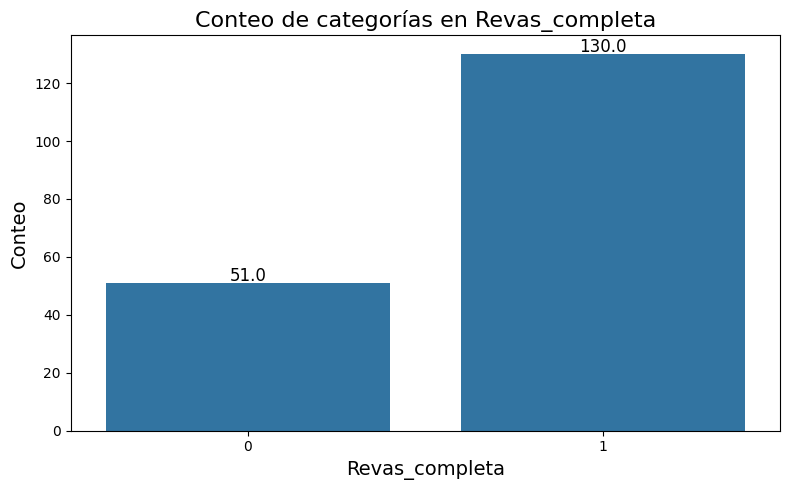

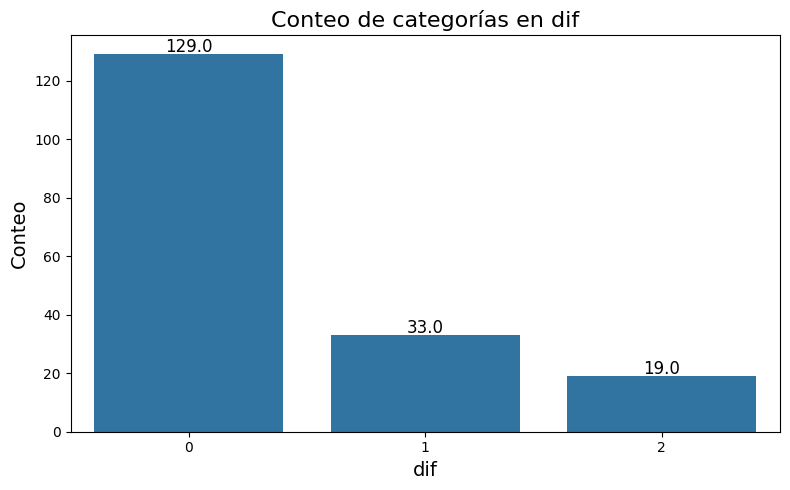

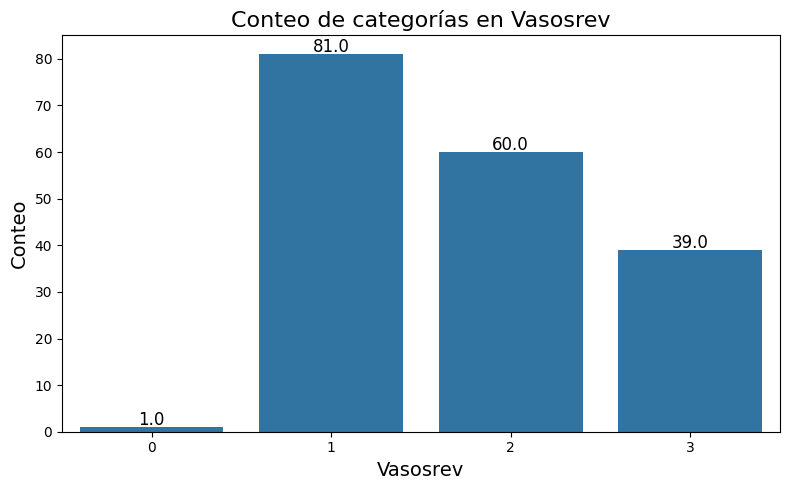

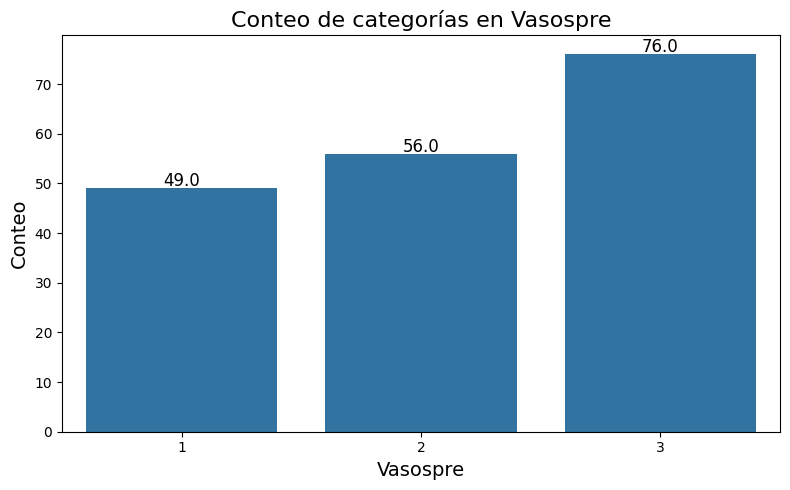

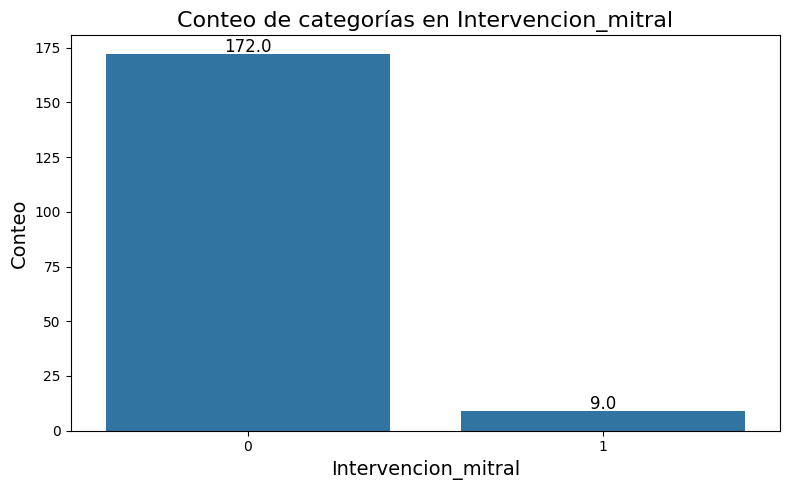

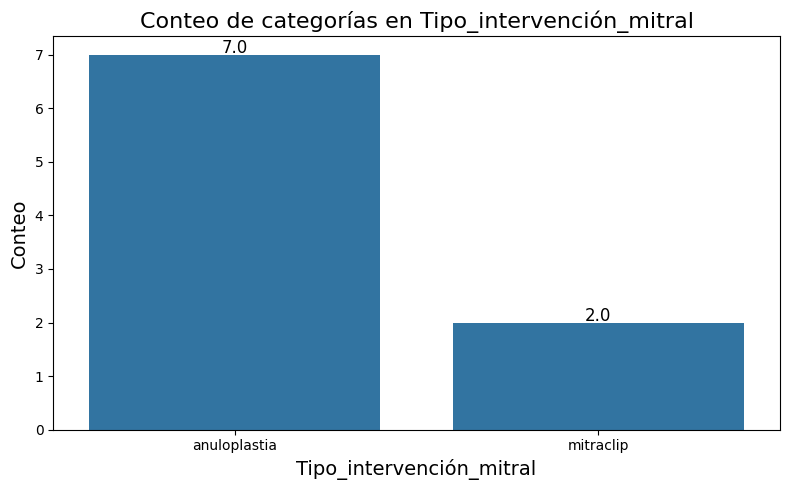

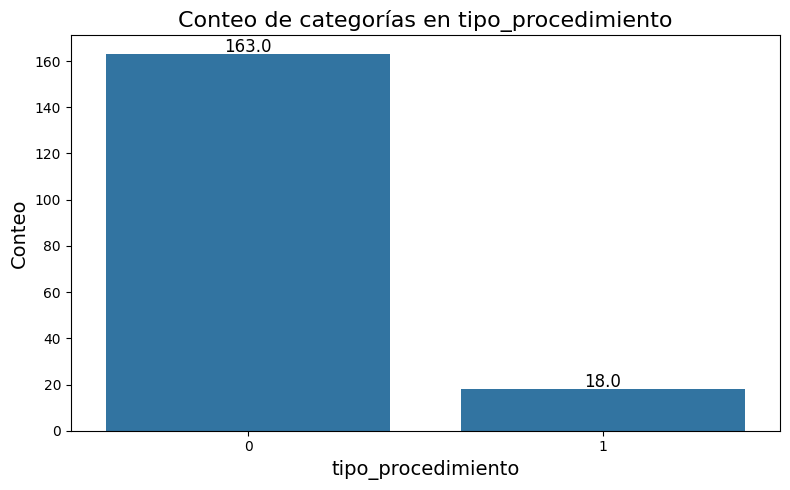

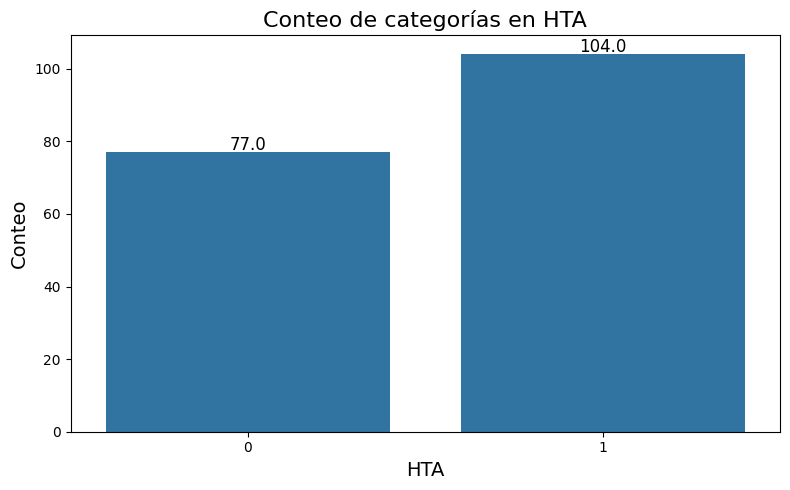

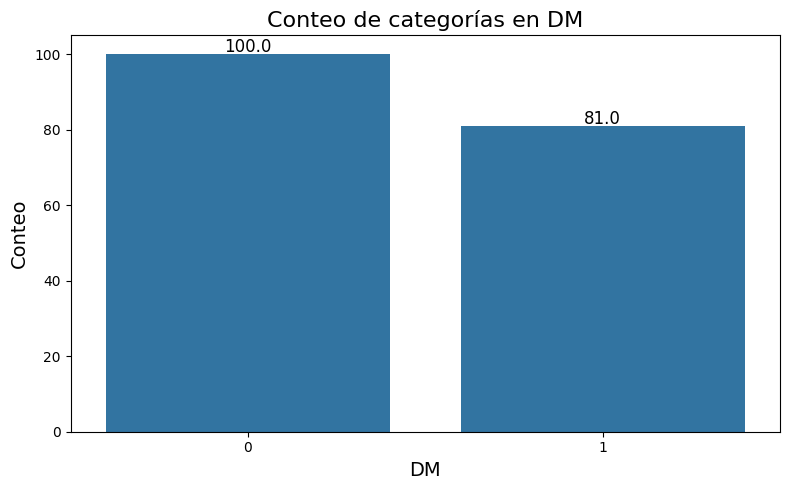

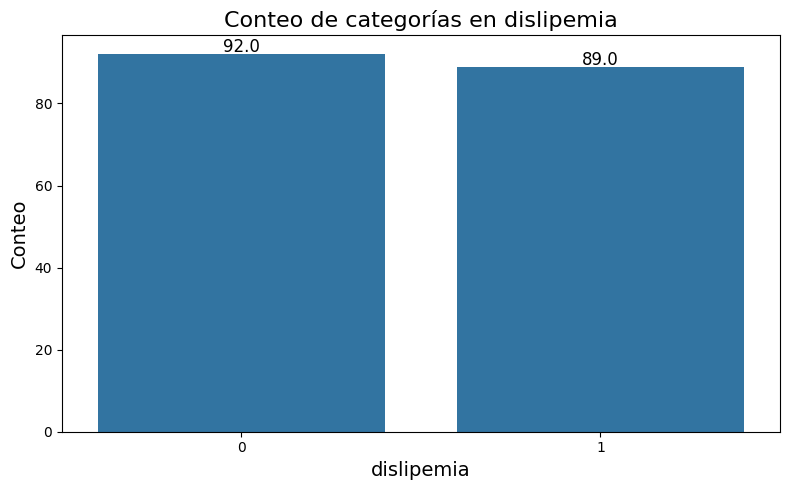

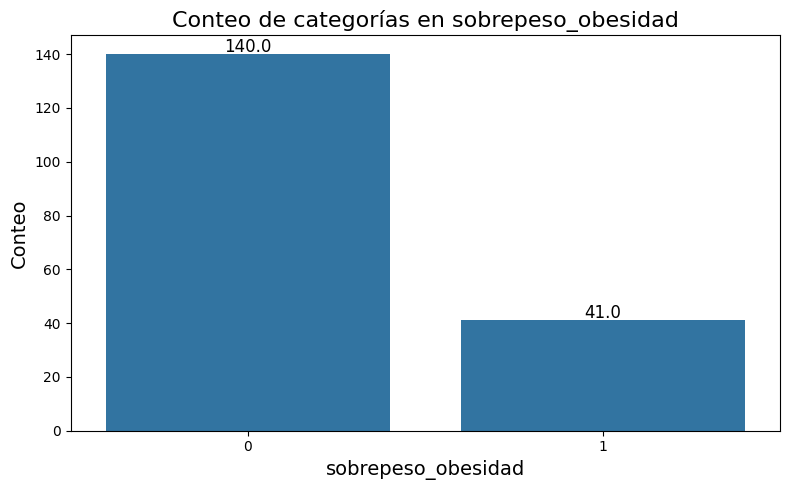

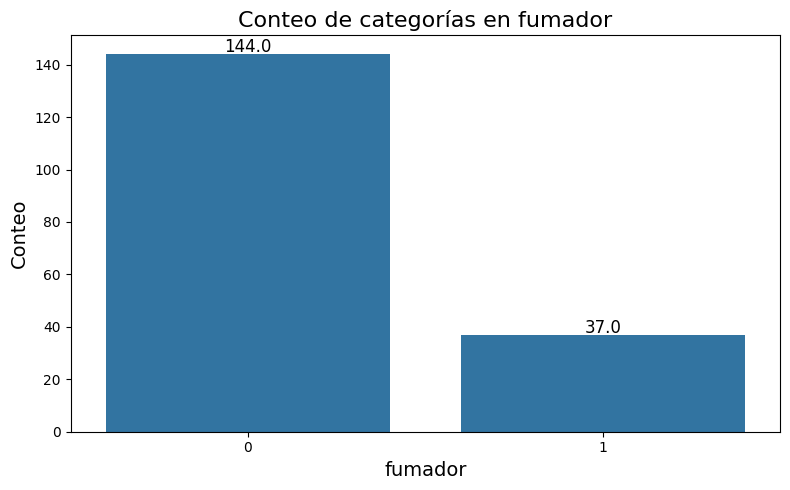

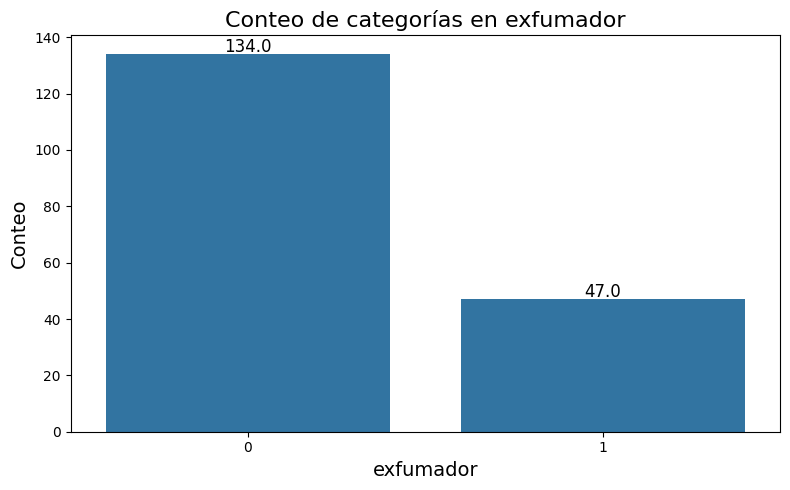

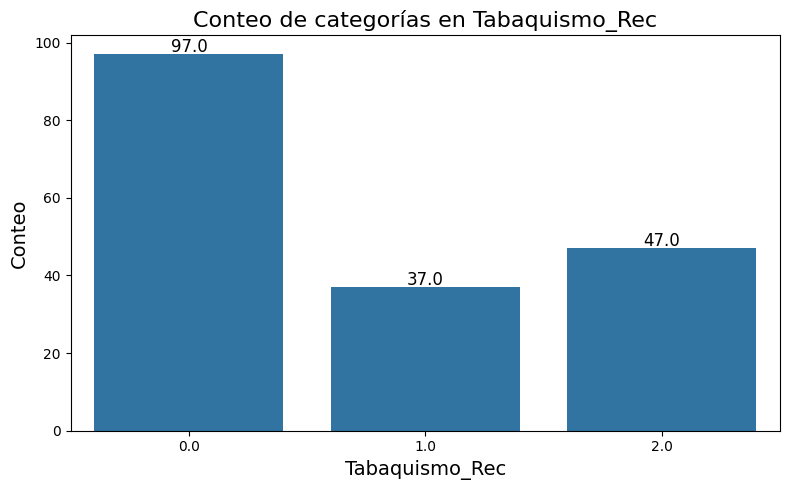

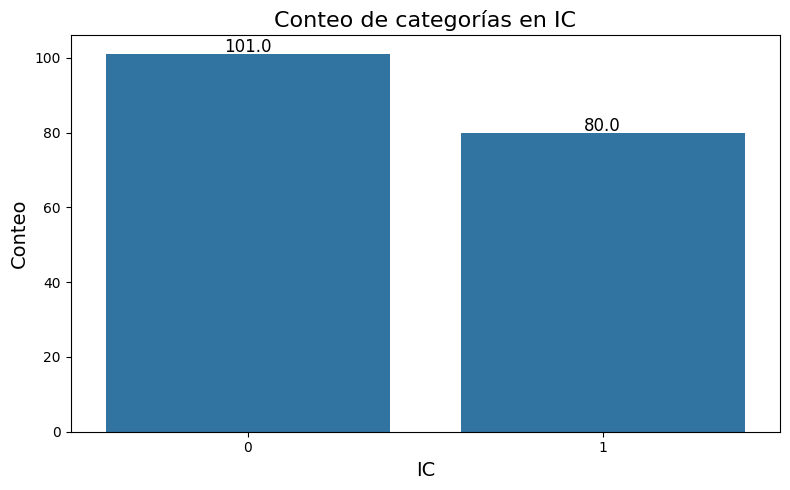

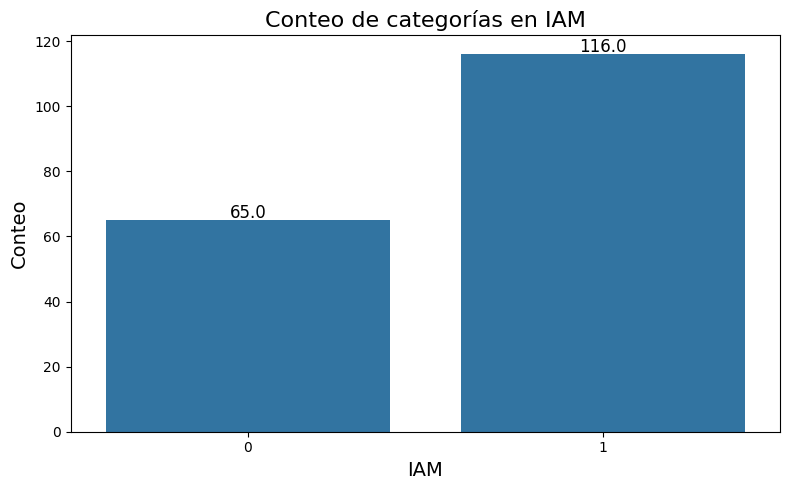

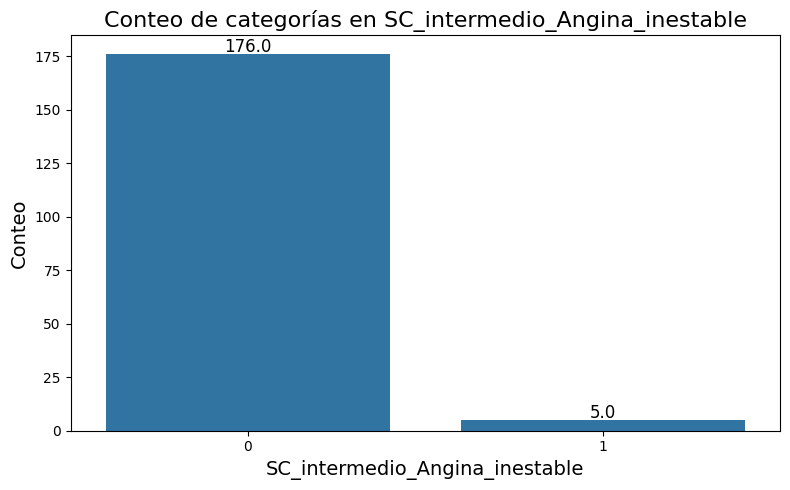

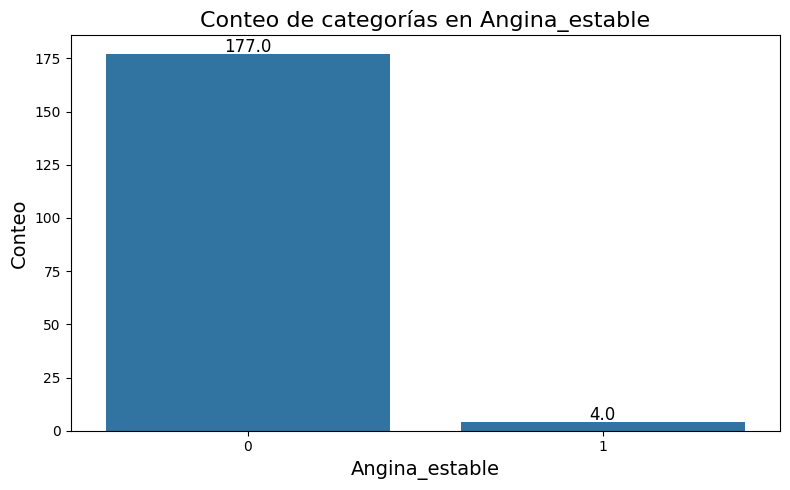

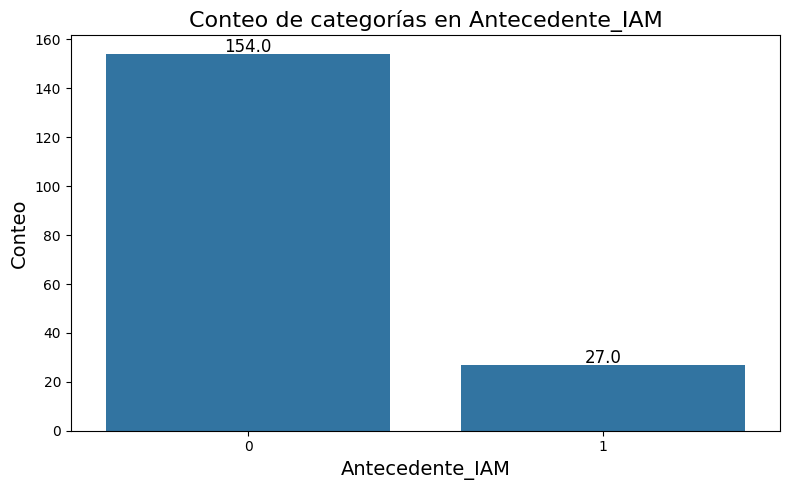

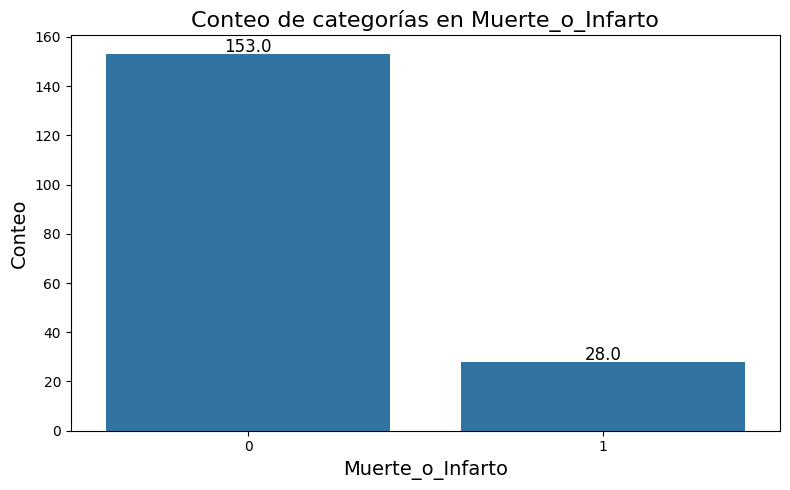

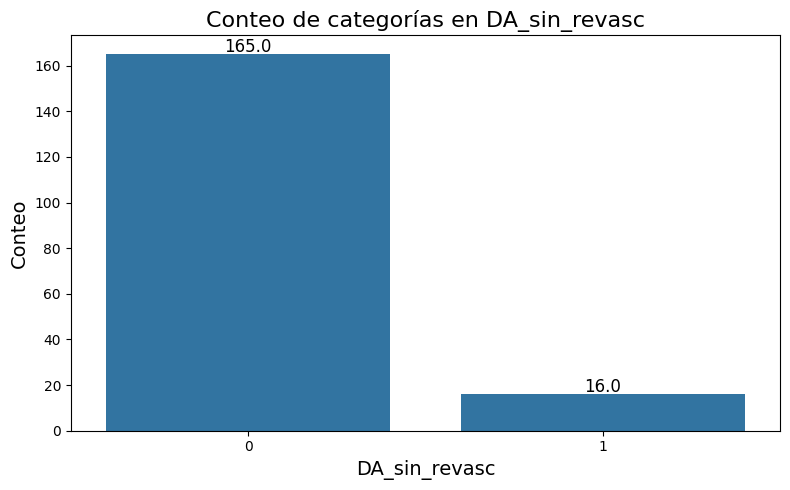

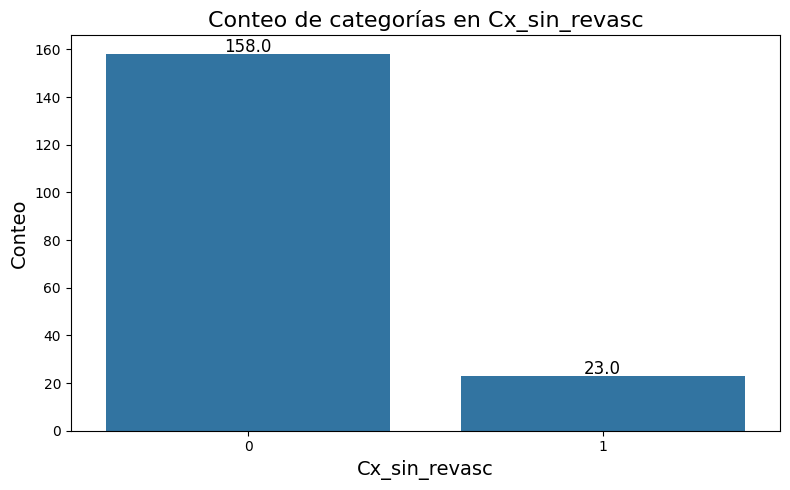

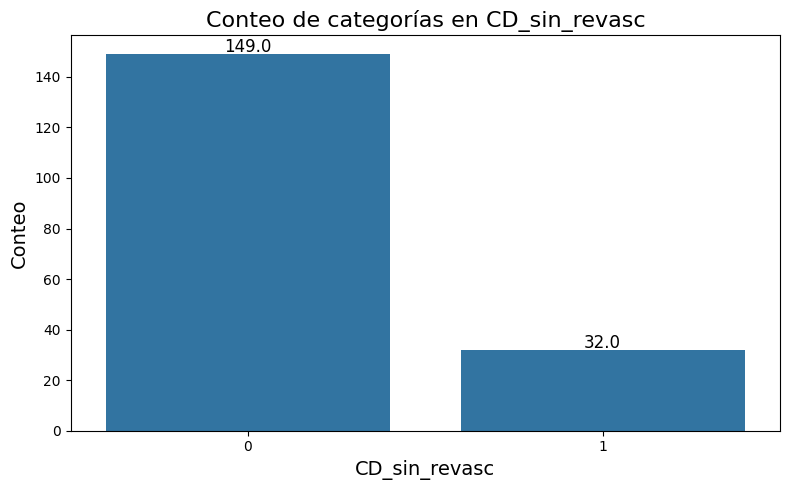

In [22]:
var_cat = ['Sexo', 'Muerte', 'Causa', 'tipo_causa', 'Infarto', 'Nueva_revascularización', 'Ingeso_ICC', 'Tronco_coronario', 'DA', 'Cx', 'CD', 
           'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Revas_completa', 'dif', 'Vasosrev', 'Vasospre', 'Intervencion_mitral', 'Tipo_intervención_mitral', 
           'tipo_procedimiento', 'HTA', 'DM', 'dislipemia', 'sobrepeso_obesidad', 'fumador', 'exfumador', 'Tabaquismo_Rec', 'IC', 'IAM', 
           'SC_intermedio_Angina_inestable', 'Angina_estable', 'Antecedente_IAM', 'Muerte_o_Infarto', 'DA_sin_revasc', 'Cx_sin_revasc', 'CD_sin_revasc'] 
# Crear un gráfico para cada variable categórica
for var in var_cat:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dfe, x=var)
    
    # Agregar los conteos sobre las barras
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # Título y etiquetas
    plt.title(f'Conteo de categorías en {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Conteo', fontsize=14)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [23]:
# Crear una lista para almacenar los resultados
summary_table = []

# Iterar sobre cada variable categórica
for var in var_cat:
    # Obtener los conteos de cada categoría
    counts = dfe[var].value_counts(dropna=False)  # Incluir NaN si existe
    percentages = dfe[var].value_counts(normalize=True, dropna=False) * 100  # Porcentajes
    
    # Crear una tabla por cada categoría de la variable
    for category, count in counts.items():
        percentage = percentages[category]
        summary_table.append({
            'Variable': var,
            'Categoría': category,
            'Conteo': count,
            'Porcentaje (%)': round(percentage, 2)
        })

# Convertir la lista a un DataFrame
df_summary = pd.DataFrame(summary_table)

# Mostrar la tabla
df_summary

,Variable,Categoría,Conteo,Porcentaje (%)
0,Sexo,0,156,86.19
1,Sexo,1,25,13.81
2,Muerte,0,145,80.11
3,Muerte,1,36,19.89
4,Causa,NaN,151,83.43
...,...,...,...,...
91,DA_sin_revasc,1,16,8.84
92,Cx_sin_revasc,0,158,87.29
93,Cx_sin_revasc,1,23,12.71
94,CD_sin_revasc,0,149,82.32


#### Creación variable 'tiempo_meses' (meses transcurridos entre la fecha de intervención y la de muerte)

In [24]:
# Creamos columna para la fecha de fin de seguimiento (última fecha conocida)
# Si no tienes una fecha límite clara, podrías usar una fecha fija
fecha_fin_seguimiento = pd.Timestamp("2024-11-20")  # Ajusta según sea necesario

# Calcular la diferencia en meses entre las fechas
dfe['tiempo_meses'] = (
    dfe['Fecha_muerte'].fillna(fecha_fin_seguimiento).dt.to_period('M') - 
    dfe['Fecha_Intervención'].dt.to_period('M')
).apply(lambda x: x.n)  # Convertir PeriodIndex a valores numéricos


# Mostrar una vista previa
dfe[['Fecha_Intervención', 'Fecha_muerte', 'tiempo_meses', 'Muerte']]

,Fecha_Intervención,Fecha_muerte,tiempo_meses,Muerte
0,2012-10-02,2020-04-01,90,1
1,2018-05-09,2021-04-06,35,0
2,2019-04-23,2020-10-27,18,0
3,2017-07-18,2021-03-23,44,0
4,2018-11-24,2020-09-26,22,0
...,...,...,...,...
176,2018-01-02,2021-02-26,37,0
177,2019-04-20,2020-04-07,12,0
178,2016-04-02,2021-04-12,60,0
179,2016-05-03,2021-03-19,58,0


#### Graficamos variables numéricas 

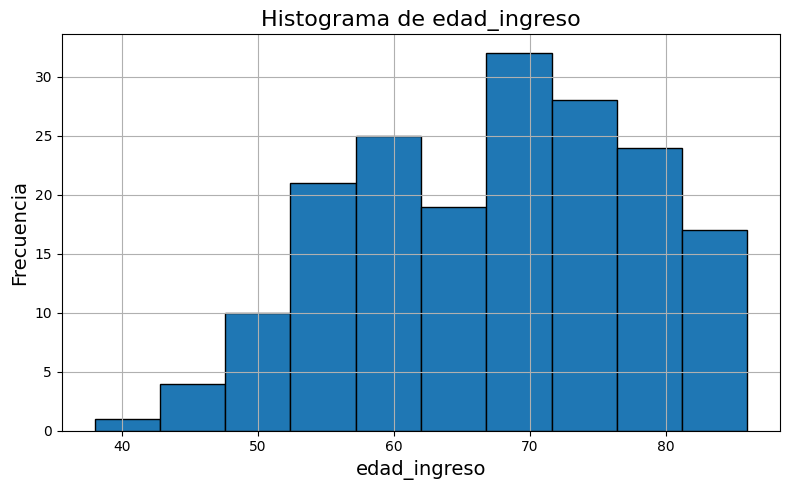

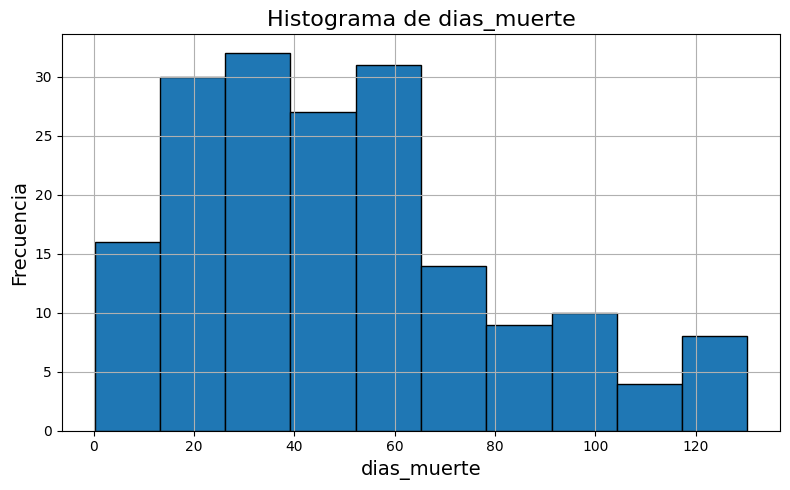

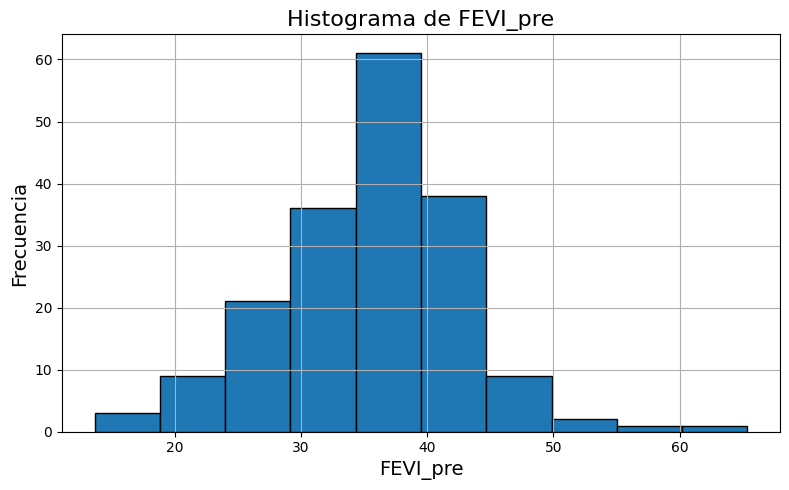

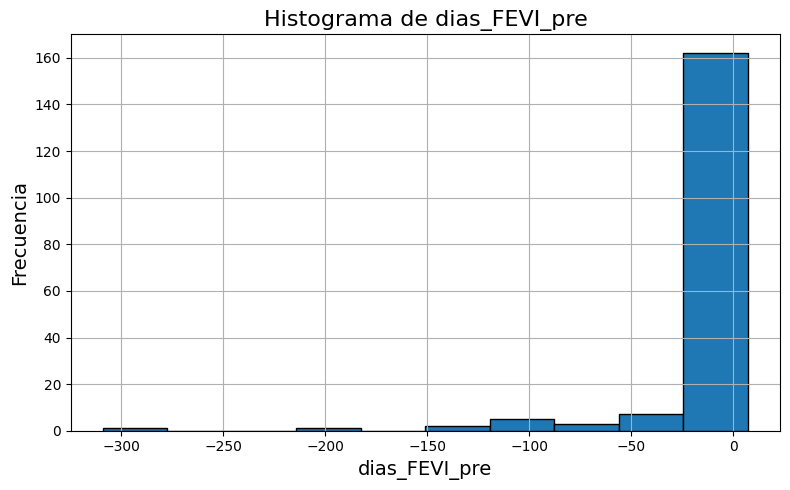

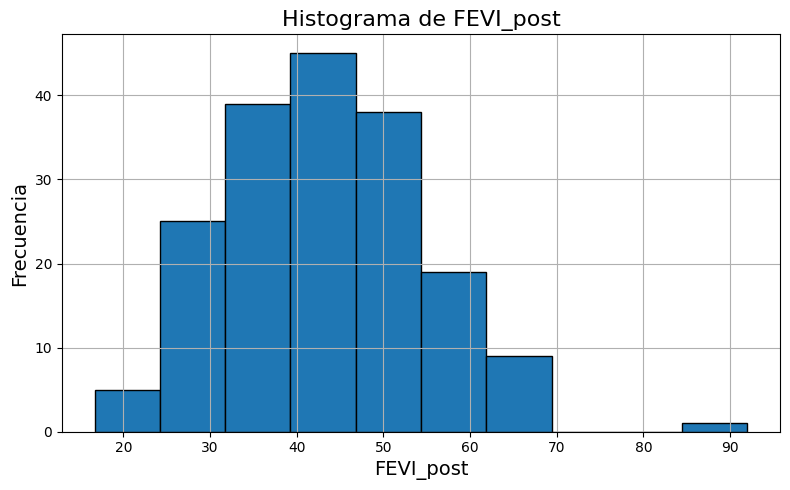

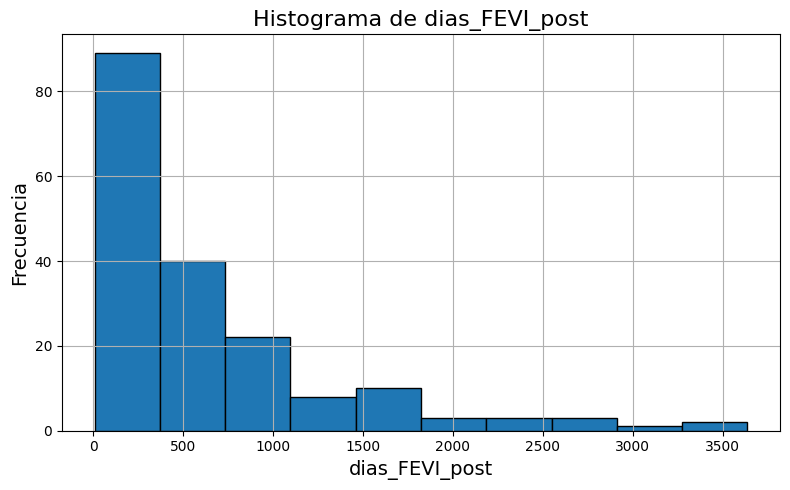

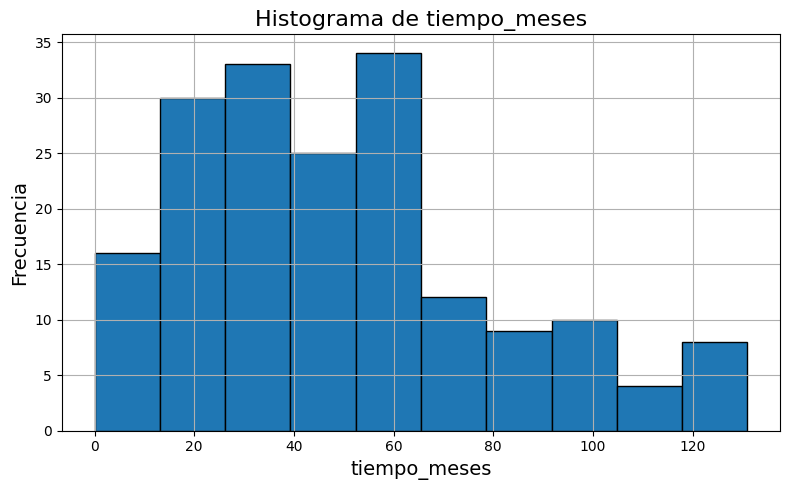

In [25]:
var_num = ['edad_ingreso', 'dias_muerte', 'FEVI_pre', 'dias_FEVI_pre', 'FEVI_post', 'dias_FEVI_post', 'tiempo_meses']
# Crear un histograma para cada variable numérica
for var in var_num:
    plt.figure(figsize=(8, 5))
    dfe[var].hist(bins=10, edgecolor='black')  
    
    # Título y etiquetas
    plt.title(f'Histograma de {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

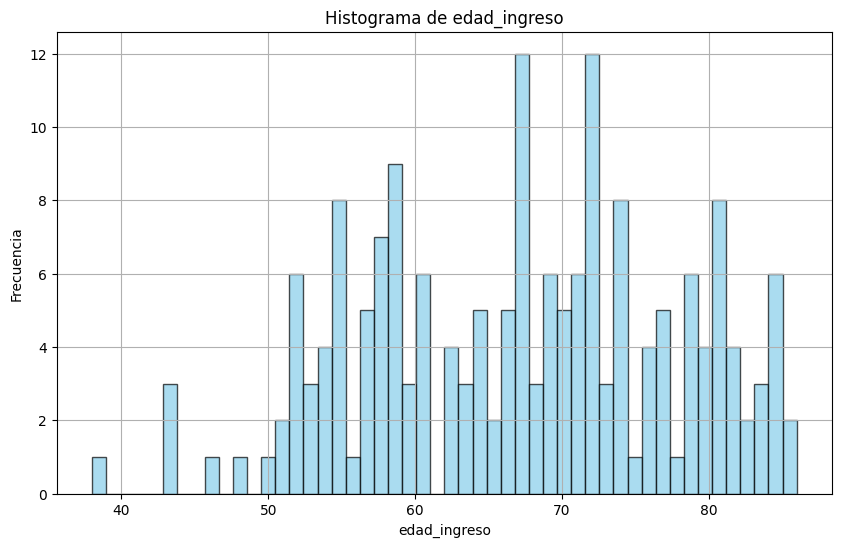

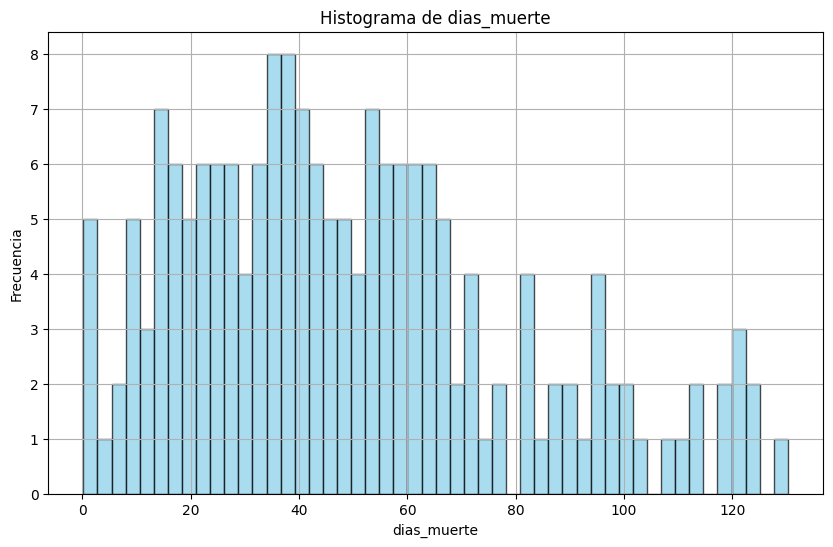

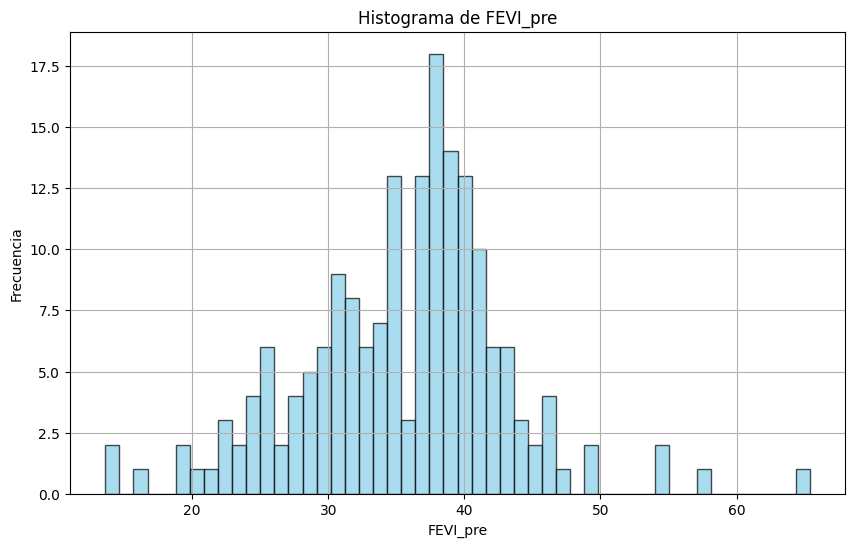

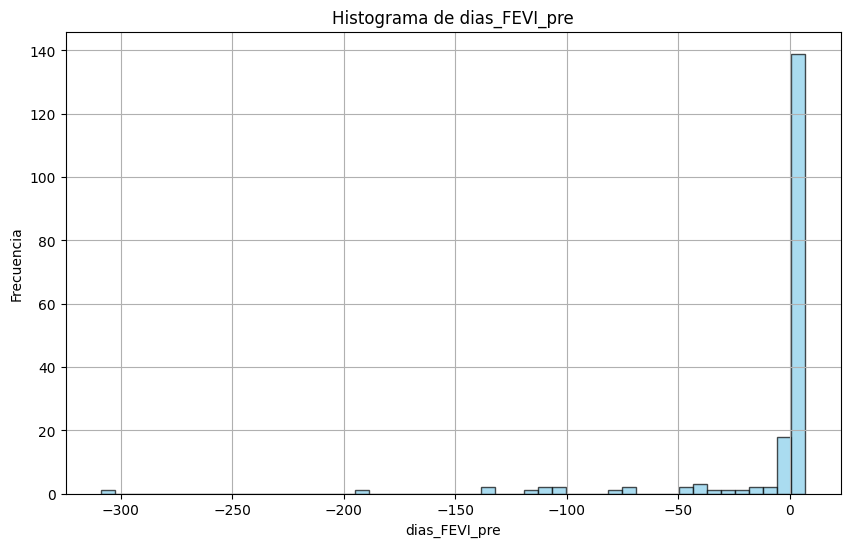

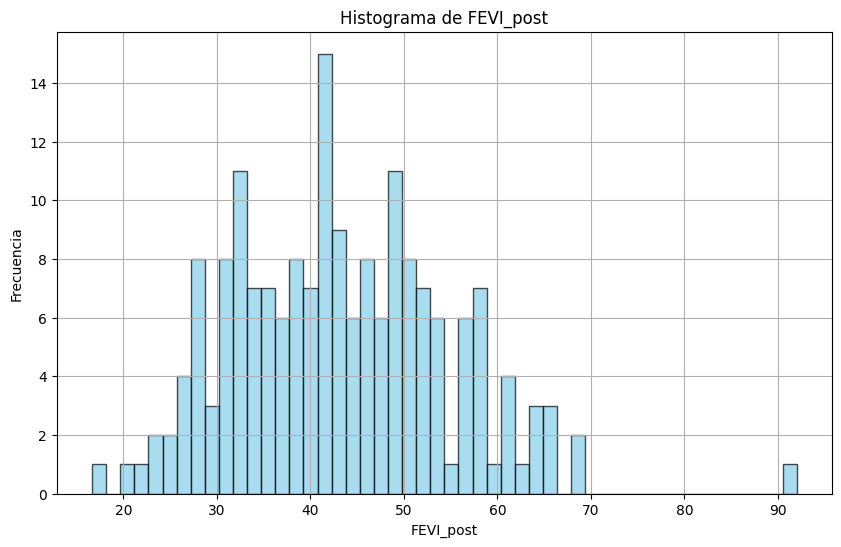

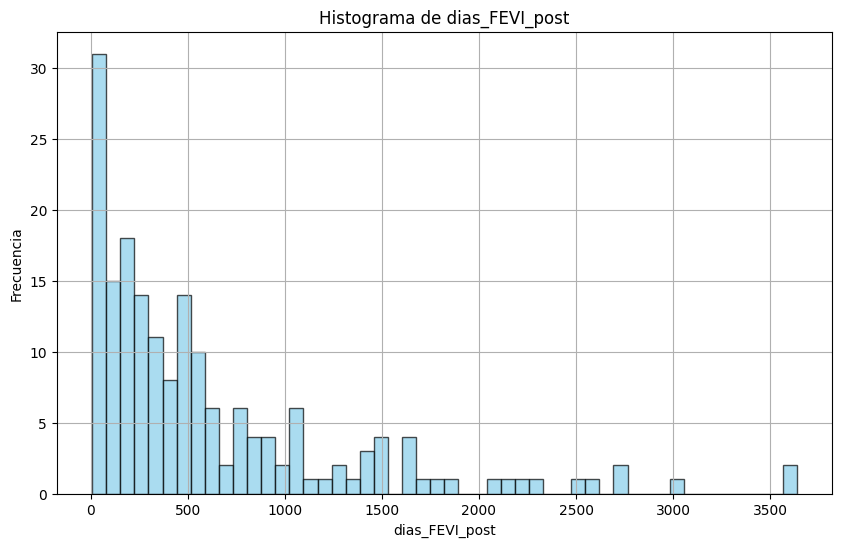

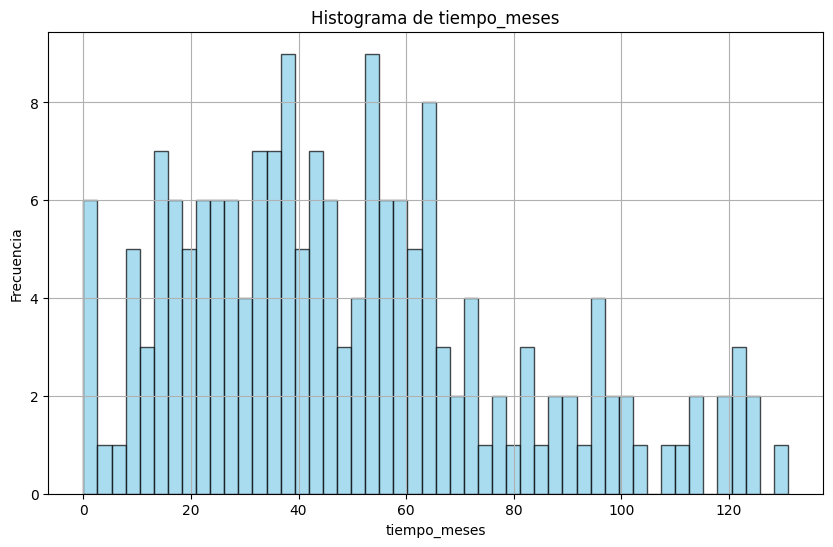

In [26]:
# Bucle para generar los histogramas
for col in var_num:
    plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura para mejor visibilidad
    
    # Generar el histograma con más detalles ajustando el número de bins
    plt.hist(dfe[col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7) 
    
    # Personalización del gráfico
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()

#### Estadística básica de variables numéricas

In [27]:
# Lista para almacenar la información de cada variable
summary_data = []

# Bucle para recorrer cada columna de tipo float64
for col in var_num:
    # Calcular estadísticas básicas
    media = dfe[col].mean()  
    mediana = dfe[col].median()  
    desviacion_std = dfe[col].std()  
    minimo = dfe[col].min() 
    maximo = dfe[col].max()  
    
    # Número de valores faltantes (NaN) en la columna
    num_faltantes = dfe[col].isna().sum()  # Solo cuenta los NaN, no los 0

    # Identificar outliers usando el método del rango intercuartílico (IQR)
    Q1 = dfe[col].quantile(0.25)  # Primer cuartil
    Q3 = dfe[col].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    
    # Definir límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los valores que son outliers
    outliers = dfe[col][(dfe[col] < lower_bound) | (dfe[col] > upper_bound)]
    
    # Contar cuántos outliers hay
    num_outliers = outliers.shape[0]
    
    # Rango de los outliers (si existen)
    if num_outliers > 0:
        outlier_min = outliers.min()
        outlier_max = outliers.max()
    else:
        outlier_min, outlier_max = np.nan, np.nan  # Si no hay outliers, asignar NaN

    # Agregar la información a la lista
    summary_data.append({
        'Variable': col,
        'Valores Faltantes': num_faltantes,
        'Media': media,
        'Mediana': mediana,
        'Desviación Estándar': desviacion_std,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Mínimo': minimo,
        'Máximo': maximo,
        'Número de Outliers': num_outliers,
        'Rango de Outliers (Mín)': outlier_min,
        'Rango de Outliers (Máx)': outlier_max
    })

# Crear un DataFrame con el resumen
df_summary = pd.DataFrame(summary_data)

# Mostrar el DataFrame con el resumen
df_summary

,Variable,Valores Faltantes,Media,Mediana,Desviación Estándar,Q1,Q3,IQR,Mínimo,Máximo,Número de Outliers,Rango de Outliers (Mín),Rango de Outliers (Máx)
0,edad_ingreso,0,67.215470,67.000000,10.617752,59.00,75.00,16.00,38.000000,86.00,0,NaN,NaN
1,dias_muerte,0,49.368324,44.166667,30.659952,25.60,64.80,39.20,0.166667,130.30,3,123.966667,130.30
2,FEVI_pre,0,35.532602,36.880000,7.620171,31.05,39.74,8.69,13.620000,65.38,7,13.620000,65.38
3,dias_FEVI_pre,0,-7.748619,2.000000,36.999047,1.00,4.00,3.00,-309.000000,7.00,24,-309.000000,-9.00
4,FEVI_post,0,43.275215,42.230000,11.579794,34.15,50.96,16.81,16.660000,92.00,1,92.000000,92.00
5,dias_FEVI_post,0,615.894641,381.500000,699.335805,151.00,813.34,662.34,8.000000,3636.00,12,1871.000000,3636.00
6,tiempo_meses,0,49.392265,44.000000,30.679449,26.00,65.00,39.00,0.000000,131.00,3,124.000000,131.00


#### Comparación variables entre pacientes con y sin evento

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, shapiro

# Separamos grupos (evento y no evento)
grupo_evento = dfe[dfe['Muerte'] == 1]  # Pacientes con evento
grupo_no_evento = dfe[dfe['Muerte'] == 0]  # Pacientes sin evento

# Almacenar resultados
resultados_categoricas = []
resultados_numericas = []
tablas_contingencia = []
frecuencias_categoricas = []

# Comparación variables categóricas
var_cat = ['Sexo', 'Causa', 'tipo_causa', 'Infarto', 'Nueva_revascularización', 'Ingeso_ICC', 'Tronco_coronario', 'DA', 'Cx', 'CD', 
           'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Revas_completa', 'dif', 'Vasosrev', 'Vasospre', ' Intervencion_mitral', 'Tipo_intervención_mitral', 
           'tipo_procedimiento', 'HTA', 'DM', 'dislipemia', 'sobrepeso_obesidad', 'fumador', 'exfumador', 'Tabaquismo_Rec', 'IC', 'IAM', 
           'SC_intermedio_Angina_inestable', 'Angina_estable', 'Antecedente_IAM', 'Muerte_o_Infarto', 'DA_sin_revasc', 'Cx_sin_revasc', 'CD_sin_revasc']

for var in var_cat:
    if var in dfe.columns:
        tabla = pd.crosstab(dfe[var], dfe['Muerte'])  # Tabla de contingencia
        chi2, p, _, _ = chi2_contingency(tabla)  # Prueba de chi-cuadrado
        
        # Guardar tabla de contingencia como DataFrame para exportar a Excel
        tabla_reset = tabla.reset_index()
        tabla_reset.insert(0, 'Variable', var)  # Agregar nombre de variable
        tablas_contingencia.append(tabla_reset)
        
        # Guardar frecuencias individuales
        tabla_frec = dfe[var].value_counts().reset_index()
        tabla_frec.columns = ['Valor', 'Frecuencia']
        tabla_frec.insert(0, 'Variable', var)
        frecuencias_categoricas.append(tabla_frec)
        
        # Guardar resultado de la prueba
        resultados_categoricas.append({'Variable': var, 'Prueba': 'Chi-cuadrado', 'P-valor': p})

# Comparación variables numéricas
var_num = ['edad_ingreso', 'dias_muerte', 'FEVI_pre', 'dias_FEVI_pre', 'FEVI_post', 'dias_FEVI_post', 'tiempo_meses']

for var in var_num:
    if var in dfe.columns:
        # Evaluar normalidad con Shapiro-Wilk
        stat, p_normal = shapiro(dfe[var].dropna())  
        
        if p_normal > 0.05:  # Distribución normal → Prueba t de Student
            test_name = 'Prueba t de Student'
            t_stat, p_value = ttest_ind(grupo_evento[var].dropna(), grupo_no_evento[var].dropna(), equal_var=False)
        else:  # No normal → Prueba de Mann-Whitney U
            test_name = 'Mann-Whitney U'
            u_stat, p_value = mannwhitneyu(grupo_evento[var].dropna(), grupo_no_evento[var].dropna())
        
        # Guardar resultados
        resultados_numericas.append({'Variable': var, 'Prueba': test_name, 'P-valor': p_value, 'P-valor Shapiro-Wilk': p_normal})

# Convertir a DataFrame
df_resultados_categoricas = pd.DataFrame(resultados_categoricas).sort_values(by='P-valor')
df_resultados_numericas = pd.DataFrame(resultados_numericas).sort_values(by='P-valor')
df_tablas_contingencia = pd.concat(tablas_contingencia, ignore_index=True) if tablas_contingencia else pd.DataFrame()
df_frecuencias_categoricas = pd.concat(frecuencias_categoricas, ignore_index=True) if frecuencias_categoricas else pd.DataFrame()

In [29]:
# Guardar en un archivo Excel con múltiples hojas
nombre_archivo = "comparacion_muerte_variables.xlsx"
with pd.ExcelWriter(nombre_archivo) as writer:
    df_resultados_categoricas.to_excel(writer, sheet_name="Variables_Categoricas", index=False)
    df_resultados_numericas.to_excel(writer, sheet_name="Variables_Numericas", index=False)
    if not df_tablas_contingencia.empty:
        df_tablas_contingencia.to_excel(writer, sheet_name="Tablas_Contingencia", index=False)
    if not df_frecuencias_categoricas.empty:
        df_frecuencias_categoricas.to_excel(writer, sheet_name="Frecuencias_Categoricas", index=False)

print(f"Resultados guardados en {nombre_archivo}")

Resultados guardados en comparacion_muerte_variables.xlsx


#### Comparación variables entre pacientes con y sin evento

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, shapiro

# Separamos grupos (evento y no evento)
grupo_evento = dfe[dfe['Muerte'] == 1]  # Pacientes con evento
grupo_no_evento = dfe[dfe['Muerte'] == 0]  # Pacientes sin evento

# Almacenamos resultados
resultados_categoricas = []
resultados_numericas = []

# Comparamos variables categóricas
var_cat = ['Sexo', 'Causa', 'tipo_causa', 'Infarto', 'Nueva_revascularización', 'Ingeso_ICC', 'Tronco_coronario', 'DA', 'Cx', 'CD', 
           'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Revas_completa', 'dif', 'Vasosrev', 'Vasospre', ' Intervencion_mitral', 'Tipo_intervención_mitral', 
           'tipo_procedimiento', 'HTA', 'DM', 'dislipemia', 'sobrepeso_obesidad', 'fumador', 'exfumador', 'Tabaquismo_Rec', 'IC', 'IAM', 
           'SC_intermedio_Angina_inestable', 'Angina_estable', 'Antecedente_IAM', 'Muerte_o_Infarto', 'DA_sin_revasc', 'Cx_sin_revasc', 'CD_sin_revasc']

for var in var_cat:
    if var in dfe.columns:
        tabla = pd.crosstab(dfe[var], dfe['Muerte'])  # Tabla de contingencia
        chi2, p, _, _ = chi2_contingency(tabla)  # Prueba de chi-cuadrado
        
        # Guardar resultado de la prueba
        resultados_categoricas.append({'Variable': var, 'P-valor': p})

# Comparamos variables numéricas
var_num = ['edad_ingreso', 'dias_muerte', 'FEVI_pre', 'dias_FEVI_pre', 'FEVI_post', 'dias_FEVI_post', 'tiempo_meses']

for var in var_num:
    if var in dfe.columns:
        # Shapiro-Wilk (normalidad)
        stat, p_normal = shapiro(dfe[var].dropna())  
        
        if p_normal > 0.05:  # Distr. normal (t-test)
            test_name = 'Prueba t de Student'
            t_stat, p_value = ttest_ind(grupo_evento[var].dropna(), grupo_no_evento[var].dropna(), equal_var=False)
        else:  # Distr. NO normal (Mann-Whitney U)
            test_name = 'Mann-Whitney U'
            u_stat, p_value = mannwhitneyu(grupo_evento[var].dropna(), grupo_no_evento[var].dropna())
        
        # Guardamos resultados
        resultados_numericas.append({'Variable': var, 'Prueba': test_name, 'P-valor': p_value, 'P-valor Shapiro-Wilk': p_normal})

df_resultados_categoricas = pd.DataFrame(resultados_categoricas)
df_resultados_numericas = pd.DataFrame(resultados_numericas)

In [31]:
# Guardar en un archivo Excel con múltiples hojas
nombre_archivo = "comparacion_est_variables.xlsx"
with pd.ExcelWriter(nombre_archivo) as writer:
    df_resultados_categoricas.to_excel(writer, sheet_name="Variables_Categoricas", index=False)
    df_resultados_numericas.to_excel(writer, sheet_name="Variables_Numericas", index=False)

print(f"Resultados guardados en {nombre_archivo}")

Resultados guardados en comparacion_est_variables.xlsx


##### Tablas de contingencia y de proporciones (variables categóricas)

In [32]:
for var in var_cat:
    if var in dfe.columns:
        # Tabla de contingencia
        tabla_contingencia = pd.crosstab(dfe[var], dfe['Muerte'])
        print(f"\n Tabla de Contingencia - {var}:")
        print(tabla_contingencia)

        # Tabla de proporciones
        tabla_proporciones = pd.crosstab(dfe[var], dfe['Muerte'], normalize='columns')
        print(f"\n Tabla de Proporciones - {var}:")
        print(tabla_proporciones)


 Tabla de Contingencia - Sexo:
Muerte    0   1
Sexo           
0       125  31
1        20   5

 Tabla de Proporciones - Sexo:
Muerte         0         1
Sexo                      
0       0.862069  0.861111
1       0.137931  0.138889

 Tabla de Contingencia - Causa:
Muerte                               1
Causa                                 
ACVA                                 3
CARDIOVASCULAR                       1
CORONAVIRUS                          4
Coronavirus                          1
EPOC                                 2
Fallo agudo de trasplante cardiaco   1
IAM                                  1
ICC                                  1
ICC                                  9
INFECCION RESPIRATORIA               1
Infarto agudo de miocarido           1
LMA                                  1
Linfoma no Hodgkin                   1
Muerte  subita cardiovascular        1
SEPSIS                               1
muerte cardiovascular en residencia  1

 Tabla de Proporciones - Cau

#### Comparación de variables respecto a Muerte_o_Infarto

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind, mannwhitneyu, shapiro

# Separamos grupos (evento y no evento)
grupo_evento = dfe[dfe['Muerte_o_Infarto'] == 1]  # Pacientes con evento
grupo_no_evento = dfe[dfe['Muerte_o_Infarto'] == 0]  # Pacientes sin evento

# Almacenamos resultados
resultados_categoricas = []
resultados_numericas = []

# Comparamos variables categóricas
var_cat = ['Sexo', 'Nueva_revascularización', 'Ingeso_ICC', 'Tronco_coronario', 'DA', 'Cx', 'CD', 'Revas_completa', 'dif', 'Vasosrev', 'Vasospre', 
           'Intervencion_mitral', 'tipo_procedimiento', 'HTA', 'DM', 'dislipemia', 'sobrepeso_obesidad', 'fumador', 'exfumador', 'IC', 'IAM', 
           'SC_intermedio_Angina_inestable', 'Angina_estable', 'Antecedente_IAM', 'DA_sin_revasc', 'Cx_sin_revasc', 'CD_sin_revasc']

for var in var_cat:
    if var in dfe.columns:
        tabla = pd.crosstab(dfe[var], dfe['Muerte_o_Infarto'])  # Tabla de contingencia
        chi2, p_chi2, _, expected = chi2_contingency(tabla)  # Prueba de chi-cuadrado con frecuencias esperadas
        
        # Revisar si alguna celda tiene <5 casos
        if (expected < 5).any():
            # Si alguna frecuencia esperada es menor a 5, usamos Fisher
            if tabla.shape == (2, 2):  # Fisher solo para tablas 2x2
                _, p_fisher = fisher_exact(tabla)
                p_value = p_fisher
                test_name = 'Fisher Exact'
            else:
                p_value = p_chi2  # Para tablas más grandes, mantenemos Chi-cuadrado
                test_name = 'Chi-cuadrado (ajustado)'
        else:
            p_value = p_chi2
            test_name = 'Chi-cuadrado'

        # Guardar resultado de la prueba
        resultados_categoricas.append({'Variable': var, 'Prueba': test_name, 'P-valor': p_value})

# Comparamos variables numéricas
var_num = ['edad_ingreso', 'FEVI_pre', 'dias_FEVI_pre', 'FEVI_post', 'dias_FEVI_post']

for var in var_num:
    if var in dfe.columns:
        # Shapiro-Wilk (normalidad)
        stat, p_normal = shapiro(dfe[var].dropna())  
        
        if p_normal > 0.05:  # Distr. normal (t-test)
            test_name = 'Prueba t de Student'
            t_stat, p_value = ttest_ind(grupo_evento[var].dropna(), grupo_no_evento[var].dropna(), equal_var=False)
        else:  # Distr. NO normal (Mann-Whitney U)
            test_name = 'Mann-Whitney U'
            u_stat, p_value = mannwhitneyu(grupo_evento[var].dropna(), grupo_no_evento[var].dropna())
        
        # Guardamos resultados
        resultados_numericas.append({'Variable': var, 'Prueba': test_name, 'P-valor': p_value, 'P-valor Shapiro-Wilk': p_normal})

df_resultados_categoricas = pd.DataFrame(resultados_categoricas)
df_resultados_numericas = pd.DataFrame(resultados_numericas)

In [34]:
# Guardar en un archivo Excel con múltiples hojas
nombre_archivo = "comparacion_muerteoinfarto.xlsx"
with pd.ExcelWriter(nombre_archivo) as writer:
    df_resultados_categoricas.to_excel(writer, sheet_name="Variables_Categoricas", index=False)
    df_resultados_numericas.to_excel(writer, sheet_name="Variables_Numericas", index=False)

print(f"Resultados guardados en {nombre_archivo}")

Resultados guardados en comparacion_muerteoinfarto.xlsx


In [35]:
for var in var_cat:
    if var in dfe.columns:
        # Tabla de contingencia
        tabla_contingencia = pd.crosstab(dfe[var], dfe['Muerte_o_Infarto'])
        print(f"\n Tabla de Contingencia - {var}:")
        print(tabla_contingencia)

        # Tabla de proporciones
        tabla_proporciones = pd.crosstab(dfe[var], dfe['Muerte_o_Infarto'], normalize='columns')
        print(f"\n Tabla de Proporciones - {var}:")
        print(tabla_proporciones)


 Tabla de Contingencia - Sexo:
Muerte_o_Infarto    0   1
Sexo                     
0                 132  24
1                  21   4

 Tabla de Proporciones - Sexo:
Muerte_o_Infarto         0         1
Sexo                                
0                 0.862745  0.857143
1                 0.137255  0.142857

 Tabla de Contingencia - Nueva_revascularización:
Muerte_o_Infarto           0   1
Nueva_revascularización         
0                        144  17
1                          9  11

 Tabla de Proporciones - Nueva_revascularización:
Muerte_o_Infarto                0         1
Nueva_revascularización                    
0                        0.941176  0.607143
1                        0.058824  0.392857

 Tabla de Contingencia - Ingeso_ICC:
Muerte_o_Infarto    0   1
Ingeso_ICC               
0                 128  17
1                  25  11

 Tabla de Proporciones - Ingeso_ICC:
Muerte_o_Infarto         0         1
Ingeso_ICC                          
0                 0.

###### Distr. proporciones variables categóricas

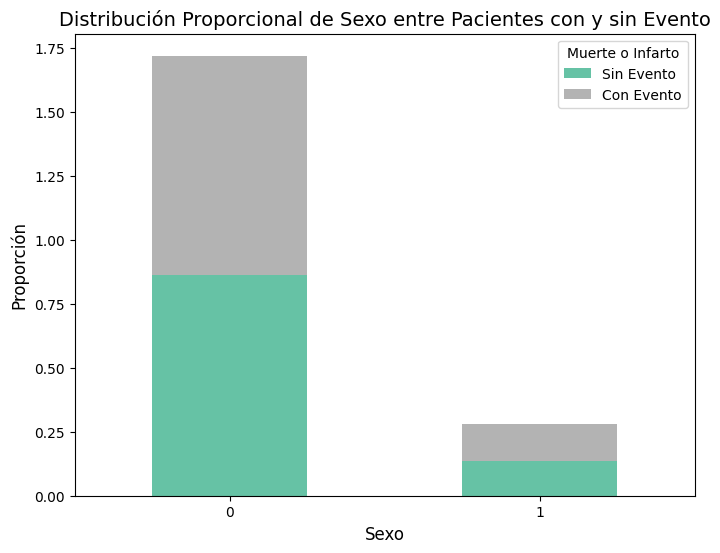

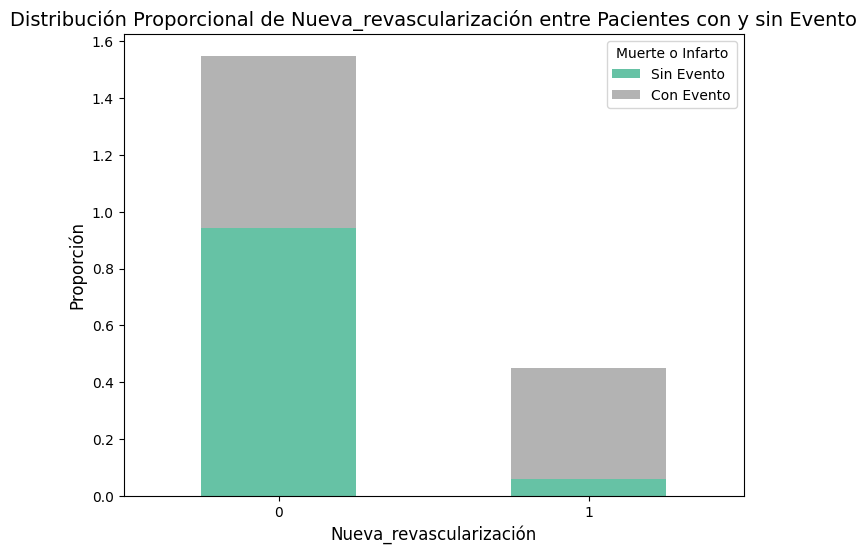

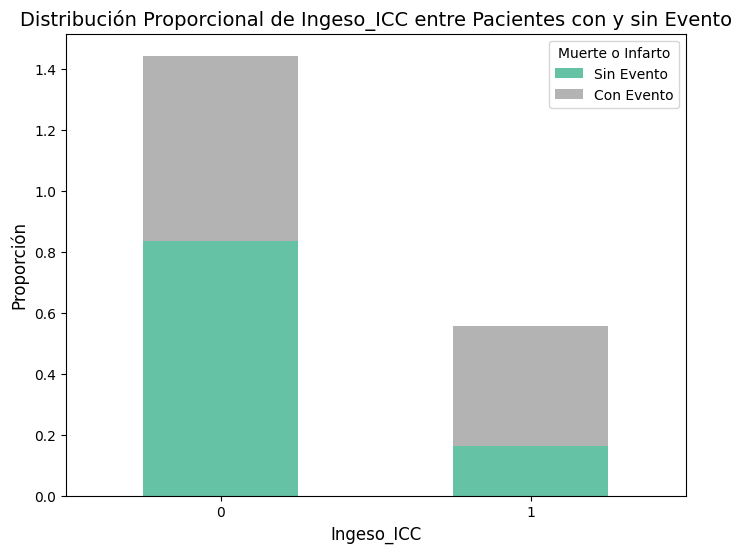

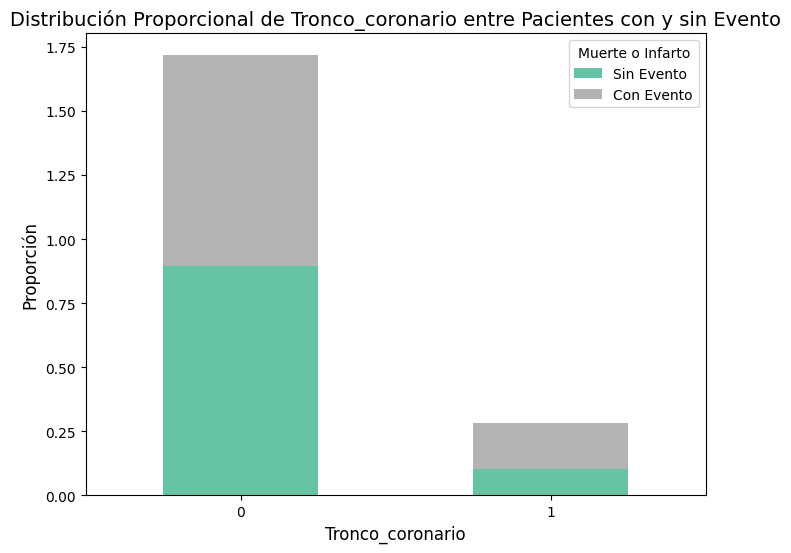

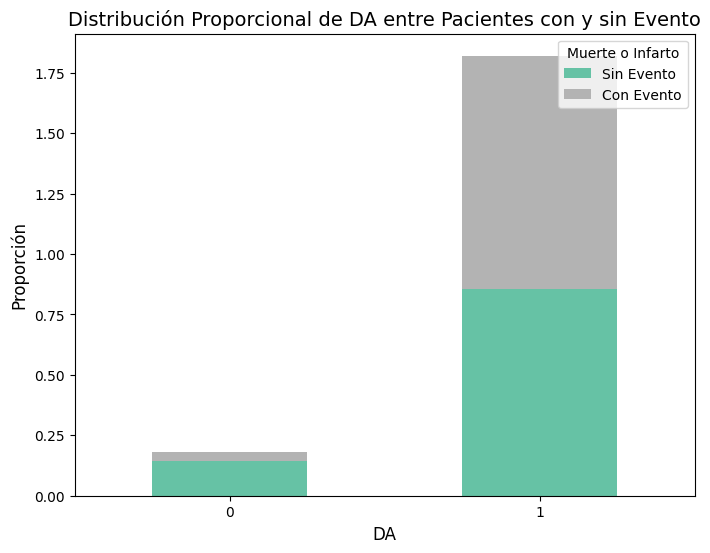

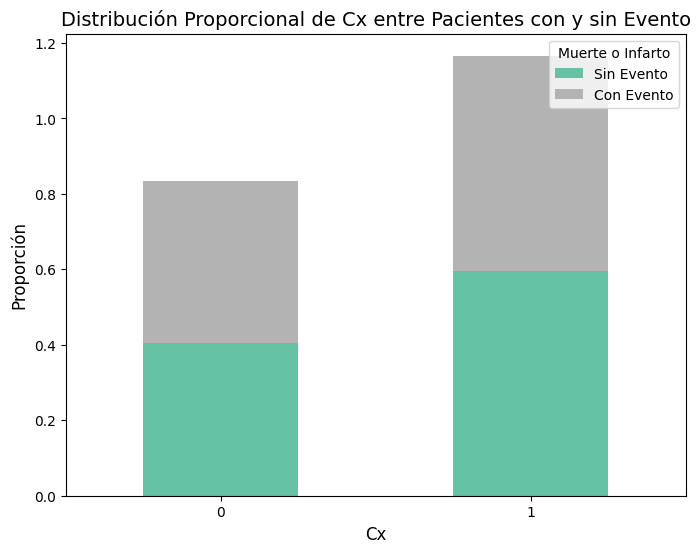

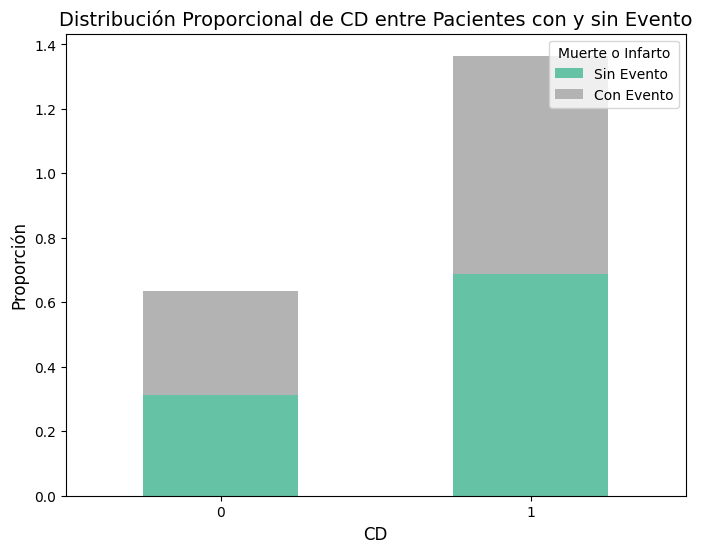

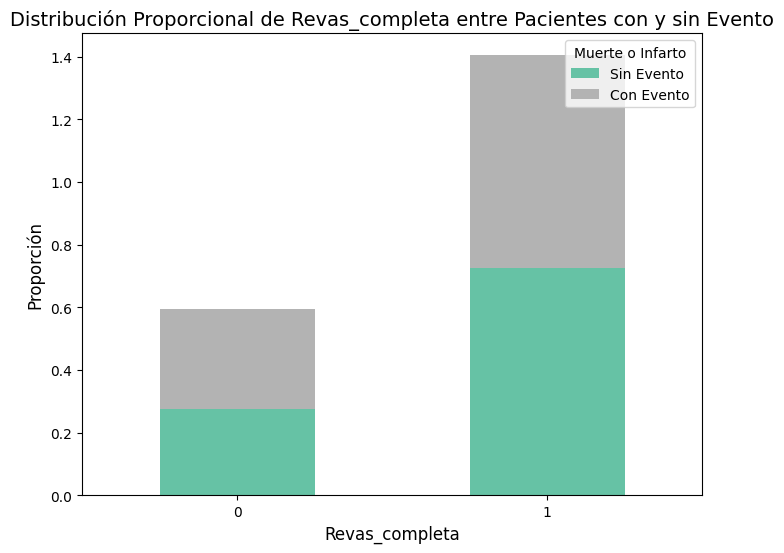

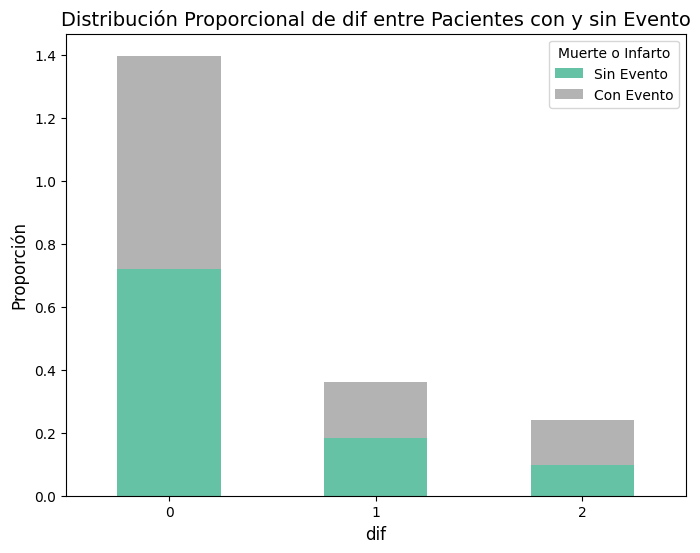

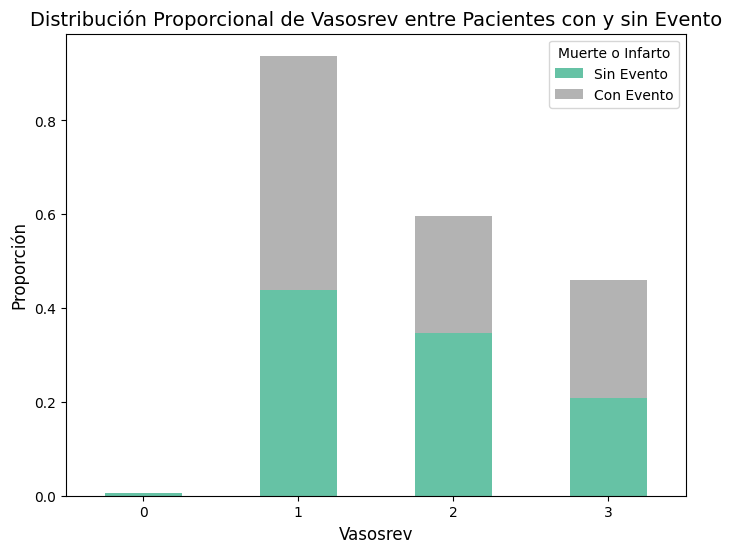

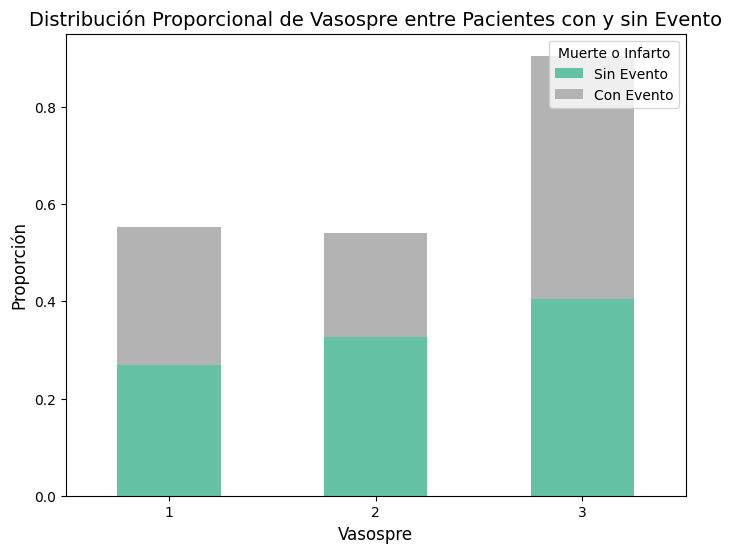

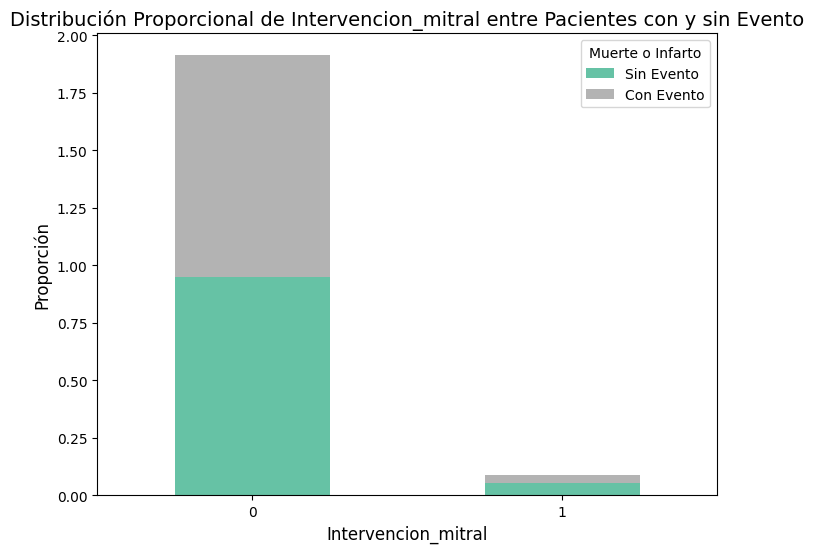

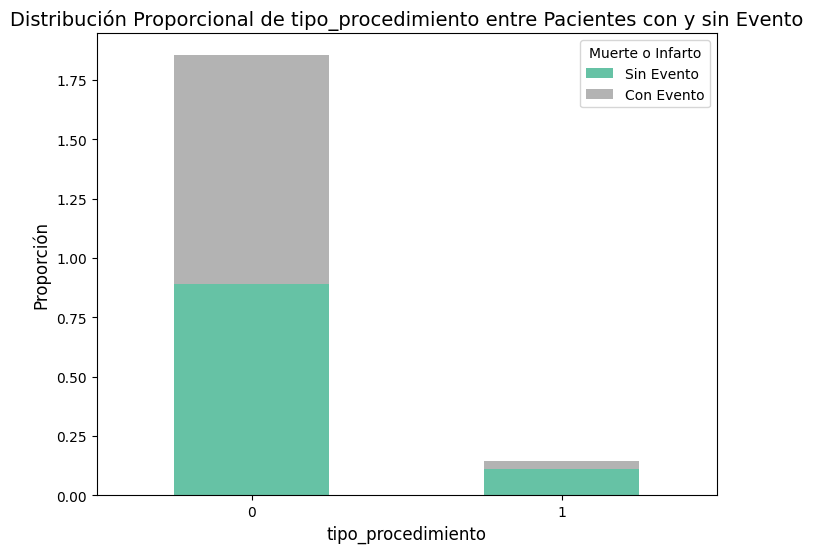

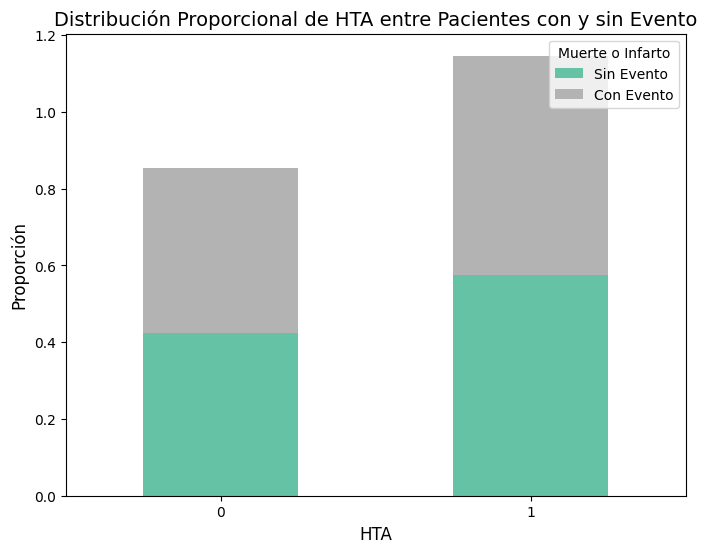

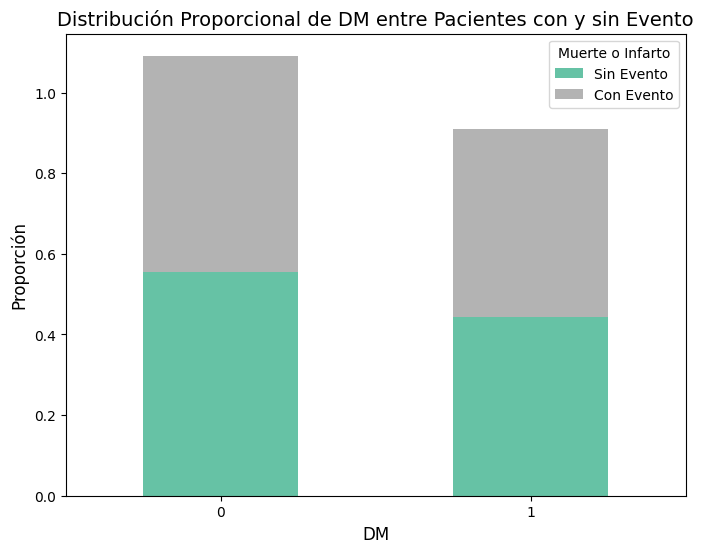

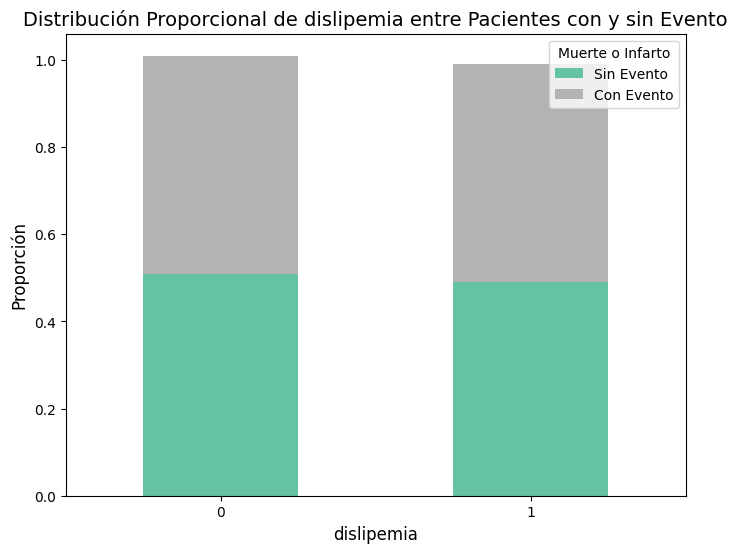

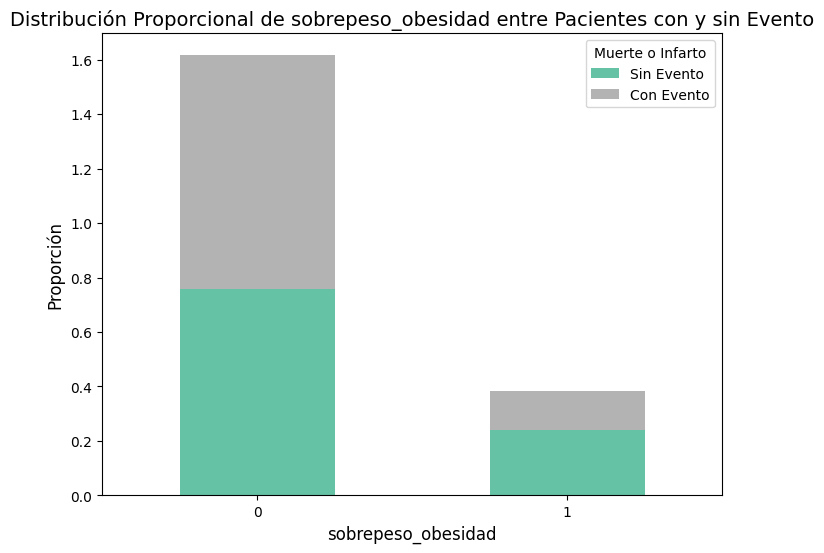

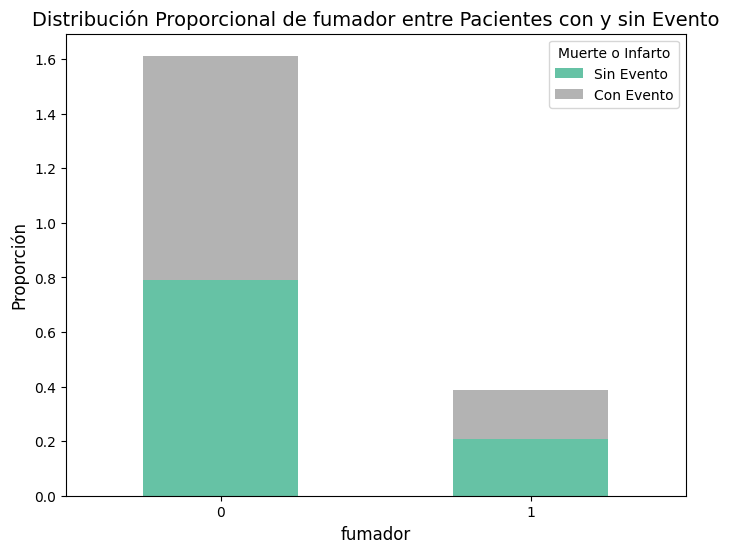

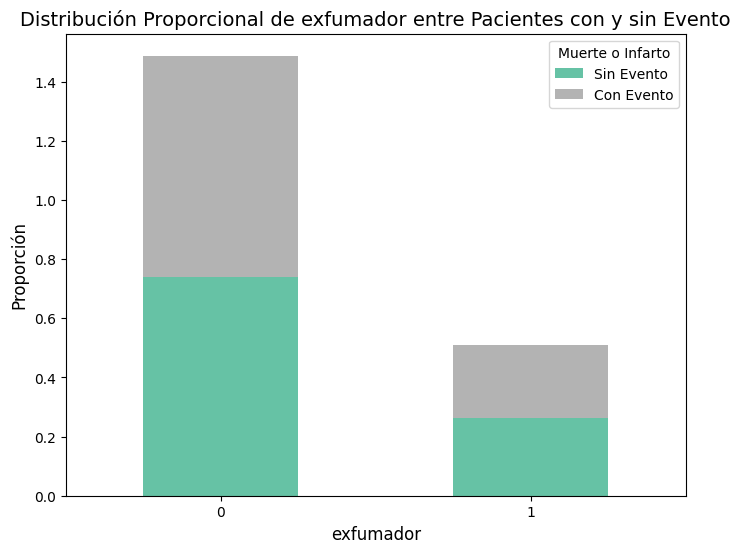

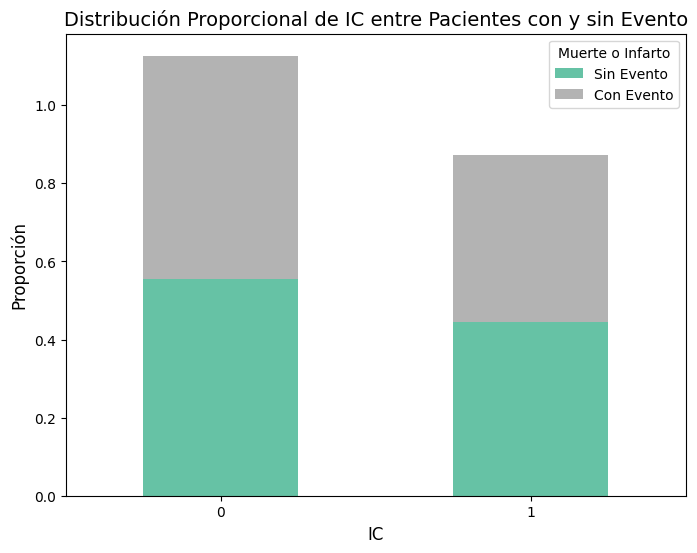

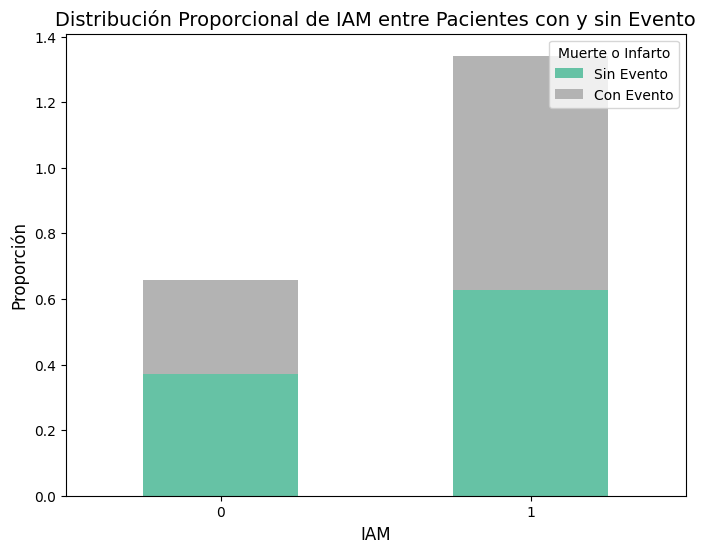

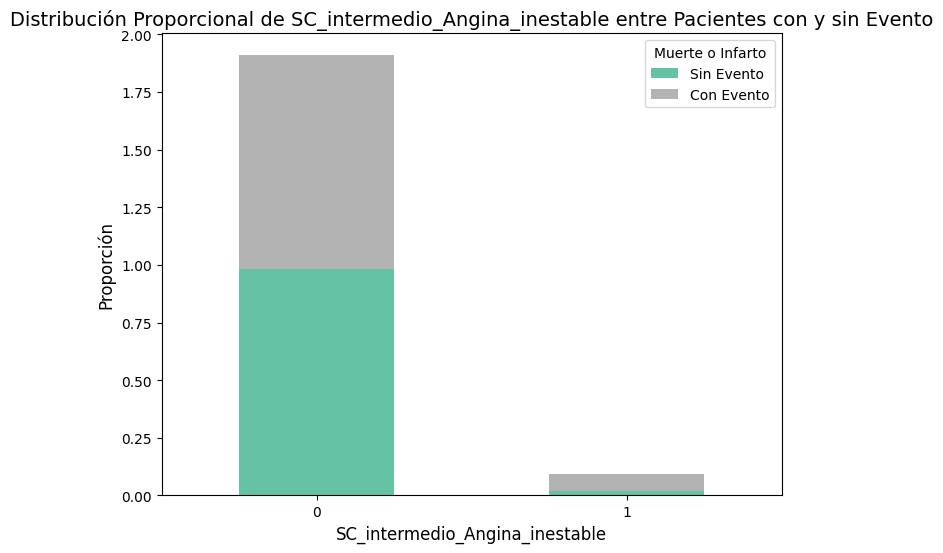

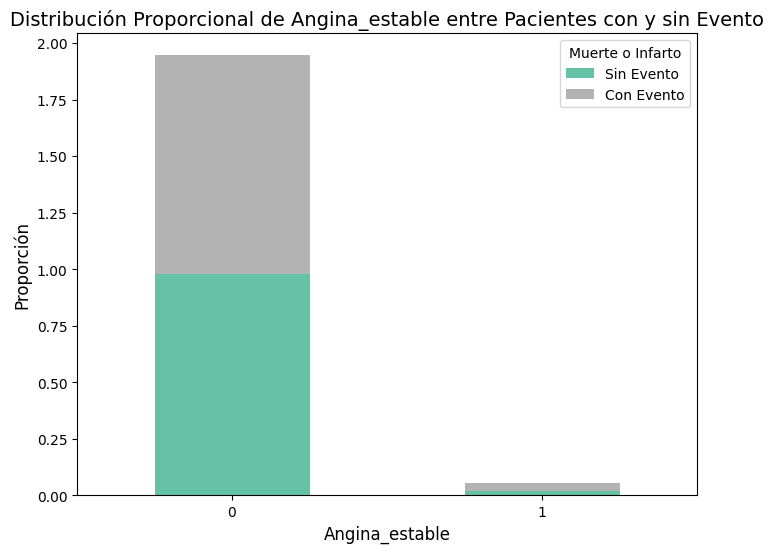

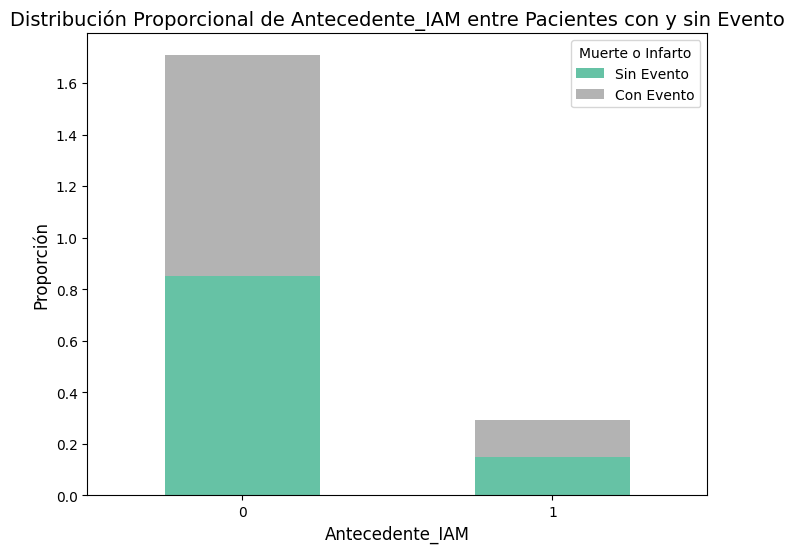

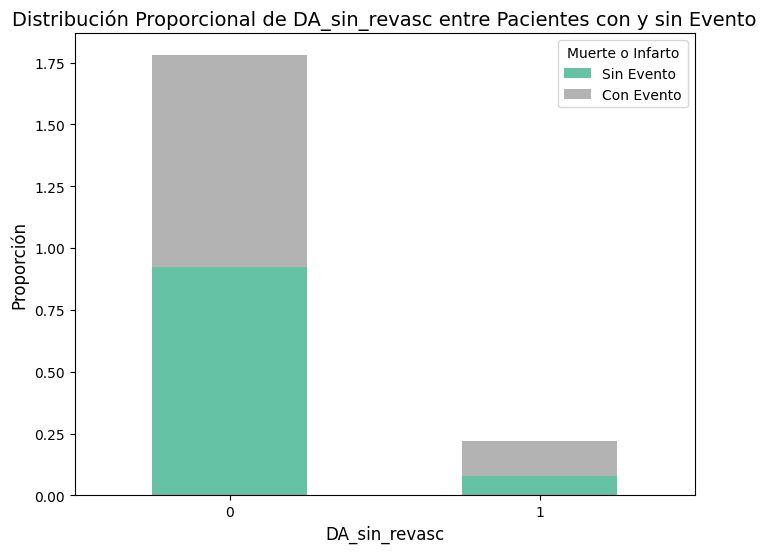

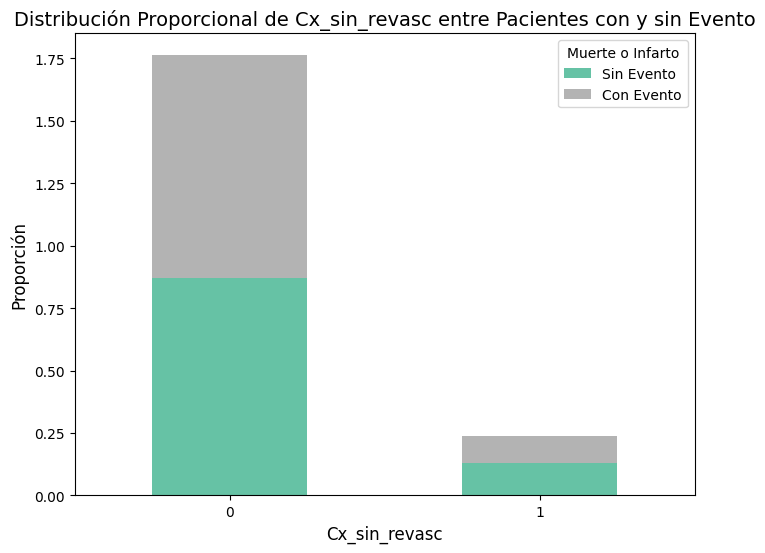

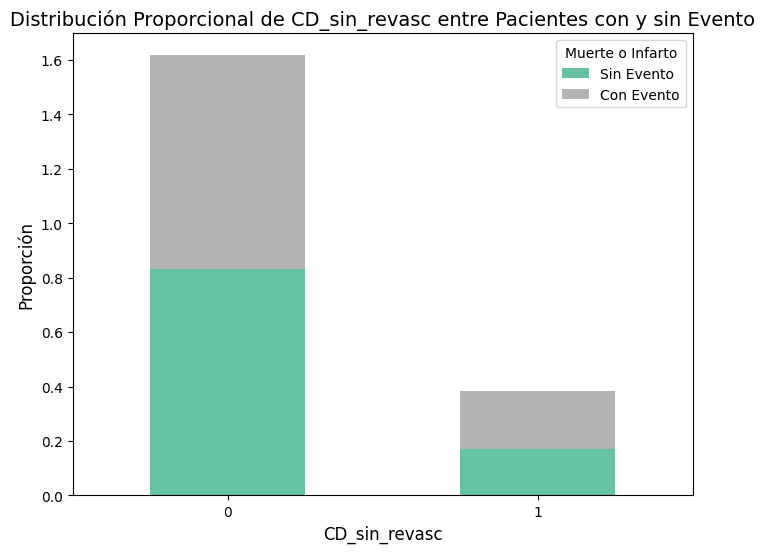

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

for var in var_cat:
    # Calculamos proporciones de cada categoría dentro de los grupos de 'muerte_o_infarto'
    prop_dfe = pd.crosstab(dfe[var], dfe['Muerte_o_Infarto'], normalize='columns')
    
    # Graficamos
    prop_dfe.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
    plt.title(f'Distribución Proporcional de {var} entre Pacientes con y sin Evento', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Proporción', fontsize=12)
    plt.xticks(rotation=0)  # Rotar las etiquetas en el eje X si es necesario
    plt.legend(title='Muerte o Infarto', loc='upper right', labels=['Sin Evento', 'Con Evento'])
    plt.show()

###### Distr. variables numéricas

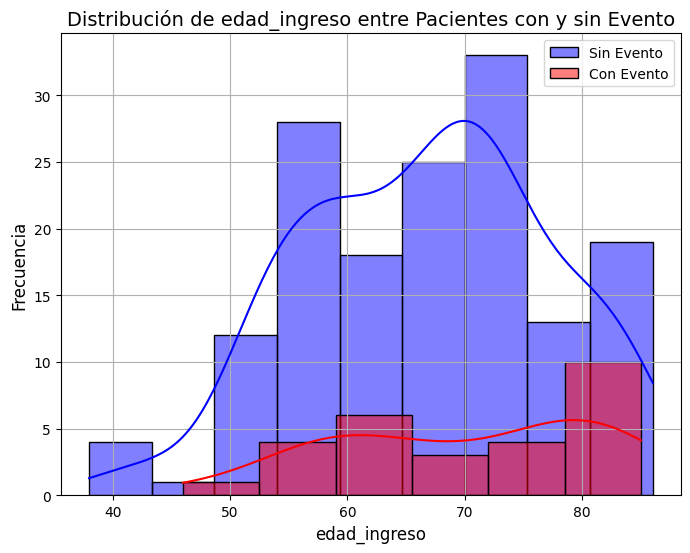

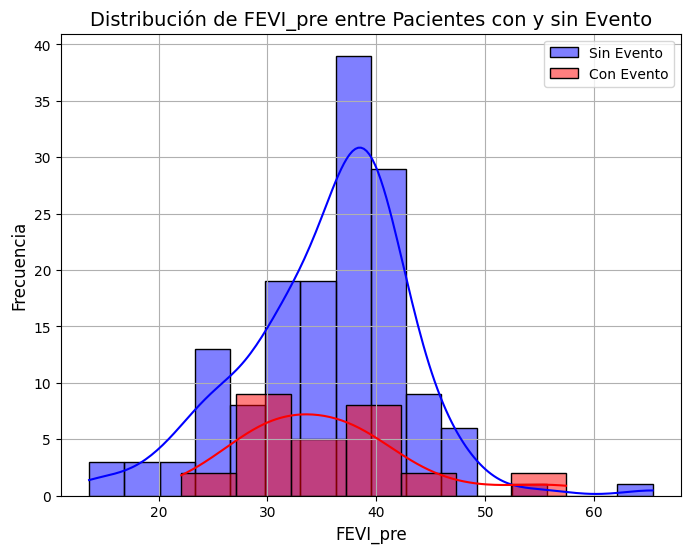

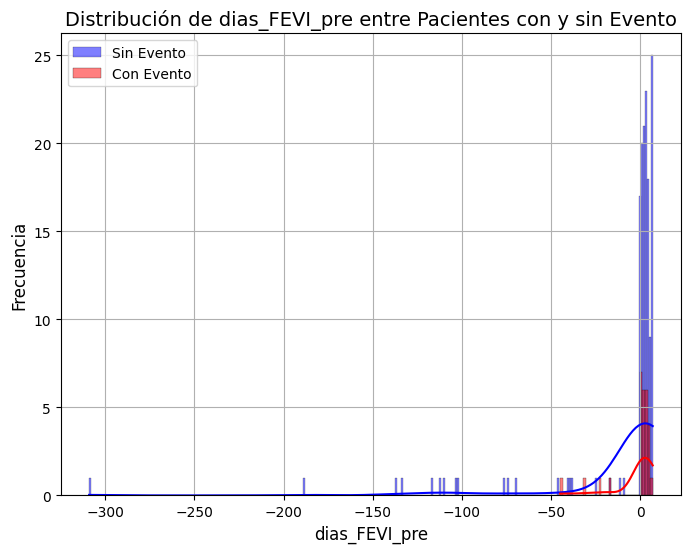

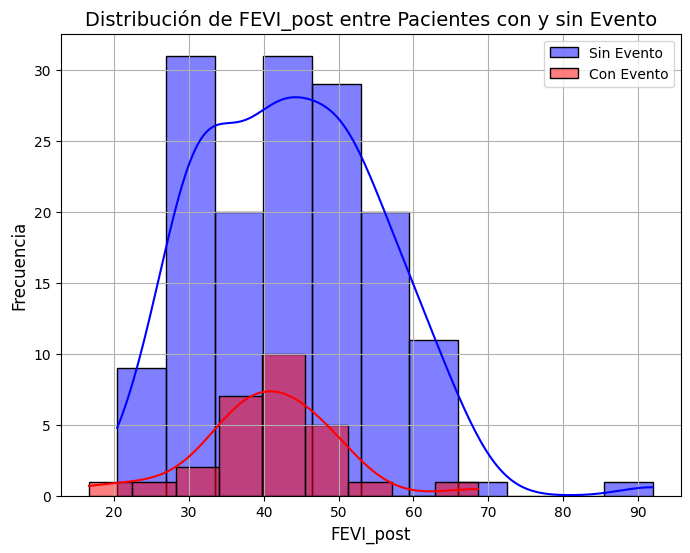

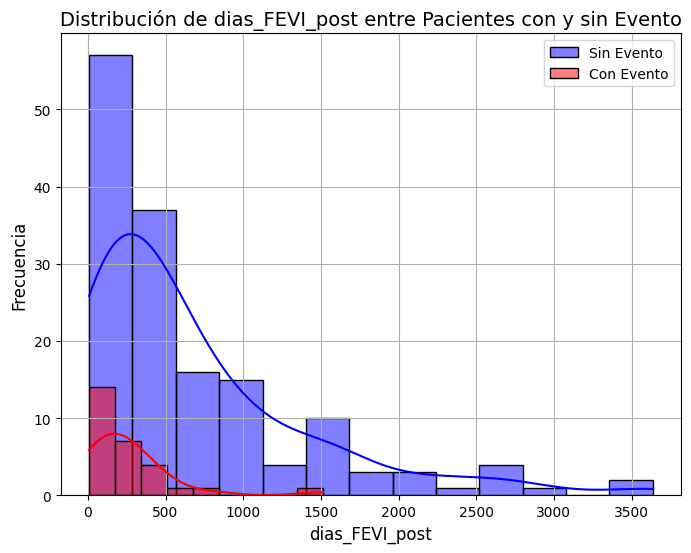

In [37]:
for var in var_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(dfe[dfe['Muerte_o_Infarto'] == 0][var], kde=True, color="blue", label="Sin Evento", alpha=0.5)
    sns.histplot(dfe[dfe['Muerte_o_Infarto'] == 1][var], kde=True, color="red", label="Con Evento", alpha=0.5)
    plt.title(f'Distribución de {var} entre Pacientes con y sin Evento', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

### Análisis de Supervivencia 

#### Kaplan-Meier

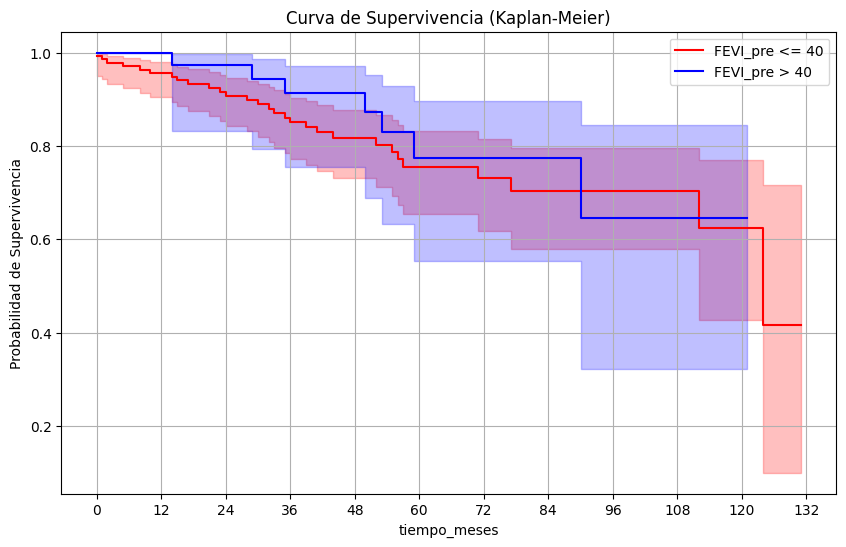

In [38]:
grupo1 = dfe[dfe['FEVI_pre'] <= 40]  # Grupo con FEVI_pre <= 40
grupo2 = dfe[dfe['FEVI_pre'] > 40]  # Grupo con FEVI_pre > 40

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# Grupo 1
kmf.fit(durations=grupo1['tiempo_meses'], event_observed=grupo1['Muerte'])
kmf.plot_survival_function(label='FEVI_pre <= 40', color='red')

# Grupo 2
kmf.fit(durations=grupo2['tiempo_meses'], event_observed=grupo2['Muerte'])
kmf.plot_survival_function(label='FEVI_pre > 40', color='blue')

plt.title('Curva de Supervivencia (Kaplan-Meier)')
plt.xlabel('tiempo_meses')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.grid(True)
max_time = max(grupo1['tiempo_meses'].max(), grupo2['tiempo_meses'].max())  # Máximo valor de tiempo
ticks = np.arange(0, max_time + 12, 12)  # Intervalos de 12 en 12 meses
plt.xticks(ticks, labels=[str(int(tick)) for tick in ticks])
plt.show()

#### log-rank test

In [39]:
from lifelines.statistics import logrank_test

# log-rank test
result = logrank_test(
    grupo1['tiempo_meses'], grupo2['tiempo_meses'],  # Tiempos de supervivencia de ambos grupos
    event_observed_A=grupo1['Muerte'],             # Eventos (muerte) para el grupo 1
    event_observed_B=grupo2['Muerte']              # Eventos (muerte) para el grupo 2
)

print("Estadístico de la prueba:", result.test_statistic)
print("p-valor:", result.p_value)

if result.p_value < 0.05:
    print("Existen diferencias significativas entre las curvas de supervivencia.")
else:
    print("No se encontraron diferencias significativas entre las curvas de supervivencia.")

Estadístico de la prueba: 0.35043969777809525
p-valor: 0.5538643333142218
No se encontraron diferencias significativas entre las curvas de supervivencia.


#### Regresión logística con variables escaladas y umbral optimo


Mejor umbral según índice de Youden: 0.18

Matriz de Confusión (con umbral óptimo):
[[32 14]
 [ 2  7]]

Accuracy: 0.71
Sensibilidad (Recall): 0.78
Especificidad: 0.70

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80        46
           1       0.33      0.78      0.47         9

    accuracy                           0.71        55
   macro avg       0.64      0.74      0.63        55
weighted avg       0.84      0.71      0.75        55


ROC-AUC Score: 0.60


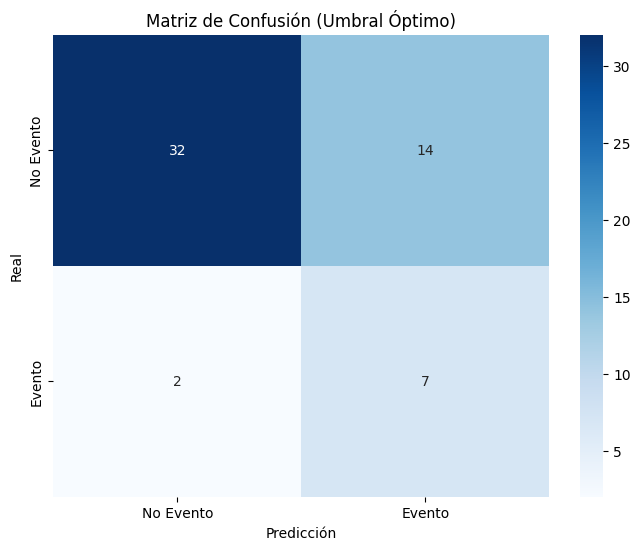

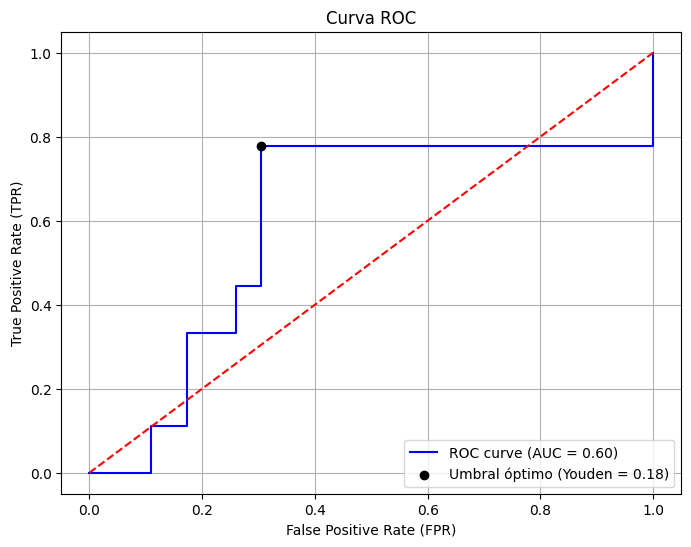

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preparar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto', 
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte', 'Infarto', 'dias_muerte', 
           'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

# Predicción probabilística
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Índice de Youden para umbral óptimo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
youden_index = tpr - fpr
best_idx = np.argmax(youden_index)
best_threshold = thresholds[best_idx]
y_pred_adj = (y_pred_proba >= best_threshold).astype(int)

# Métricas
cm = confusion_matrix(y_test, y_pred_adj)
tn, fp, fn, tp = cm.ravel()
sensibilidad = tp / (tp + fn)
especificidad = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred_adj)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Salidas
print(f"\nMejor umbral según índice de Youden: {best_threshold:.2f}")
print("\nMatriz de Confusión (con umbral óptimo):")
print(cm)
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_adj))

print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Visualización: Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Evento', 'Evento'], yticklabels=['No Evento', 'Evento'])
plt.title('Matriz de Confusión (Umbral Óptimo)')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Curva ROC con punto óptimo
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.scatter(fpr[best_idx], tpr[best_idx], color='black', label=f'Umbral óptimo (Youden = {best_threshold:.2f})', zorder=5)
plt.title('Curva ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\jaime\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


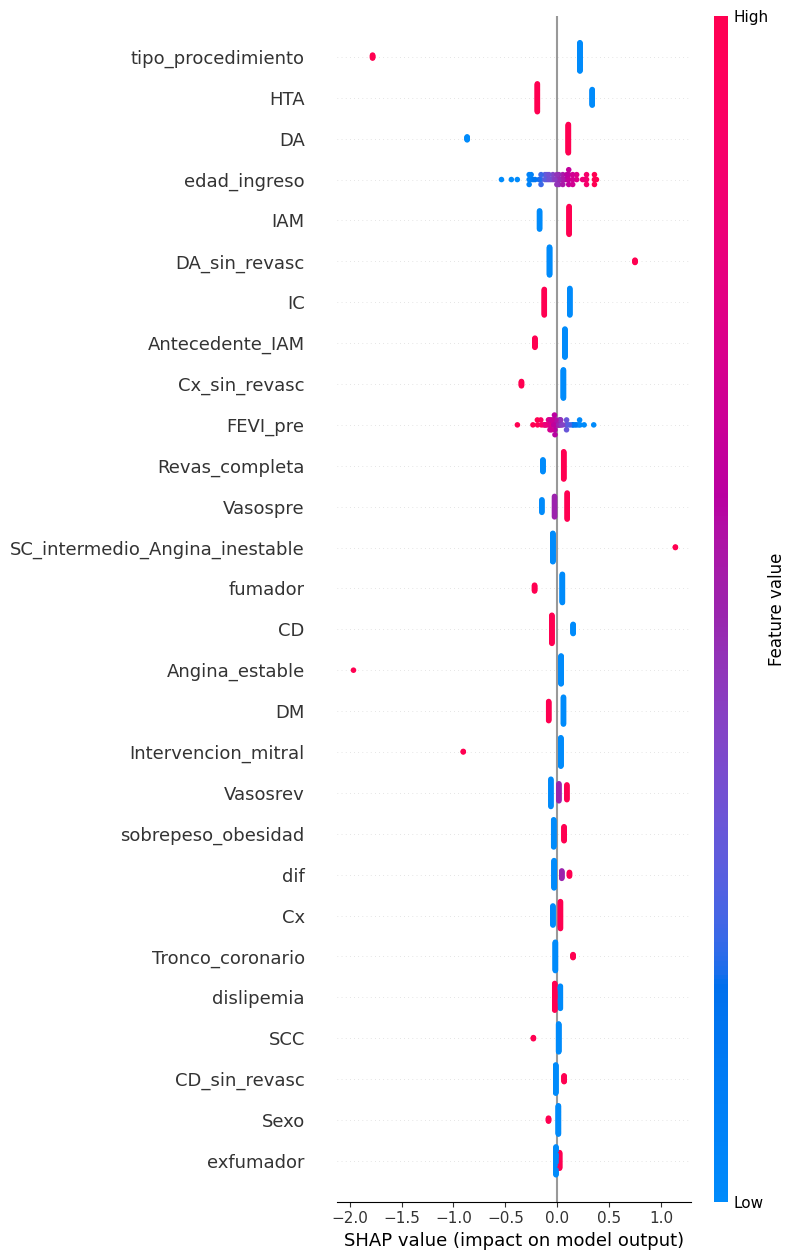

In [41]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Convertir X_test a DataFrame con nombres originales de columnas
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Explicador SHAP para modelos lineales
explainer = shap.Explainer(logreg, X_test_df)

# Obtener valores SHAP
shap_values = explainer(X_test_df)

# Extraer valores SHAP en matriz (como en Random Forest)
shap_array = shap_values.values  # array de tamaño (n_muestras, n_features)

# Graficar SHAP Summary Plot con todas las variables
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_array, X_test_df, plot_type="dot", max_display=len(X_test_df.columns))

In [42]:
# Obtener nombres originales de las variables del DataFrame original
feature_names = X.columns

# Extraer coeficientes del modelo ya entrenado
coefs = logreg.coef_[0]

# Crear un DataFrame con nombres y coeficientes
importancia_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coefs,
    'Importancia_absoluta': np.abs(coefs)
})

# Ordenar por importancia (valor absoluto del coeficiente)
importancia_coef = importancia_coef.sort_values(by='Importancia_absoluta', ascending=False)

# Mostrar tabla ordenada
print("\nCoeficientes del modelo de regresión logística ordenados por importancia:")
print(importancia_coef[['Variable', 'Coeficiente']].to_string(index=False))


Coeficientes del modelo de regresión logística ordenados por importancia:
                      Variable  Coeficiente
            tipo_procedimiento    -0.597457
                            DA     0.324589
                Angina_estable    -0.293845
                           HTA    -0.261177
                 DA_sin_revasc     0.233634
           Intervencion_mitral    -0.204246
                  edad_ingreso     0.201698
SC_intermedio_Angina_inestable     0.193389
                           IAM     0.136503
                      FEVI_pre    -0.134995
                 Cx_sin_revasc    -0.134516
                            IC    -0.122133
                       fumador    -0.107886
               Antecedente_IAM    -0.102944
                      Vasospre     0.099584
                            CD    -0.094989
                Revas_completa     0.090105
                            DM    -0.070716
                      Vasosrev     0.060923
              Tronco_coronario     0.054481
 

#### Regresión Logística configurada con validacion cruzada y umbral optimo

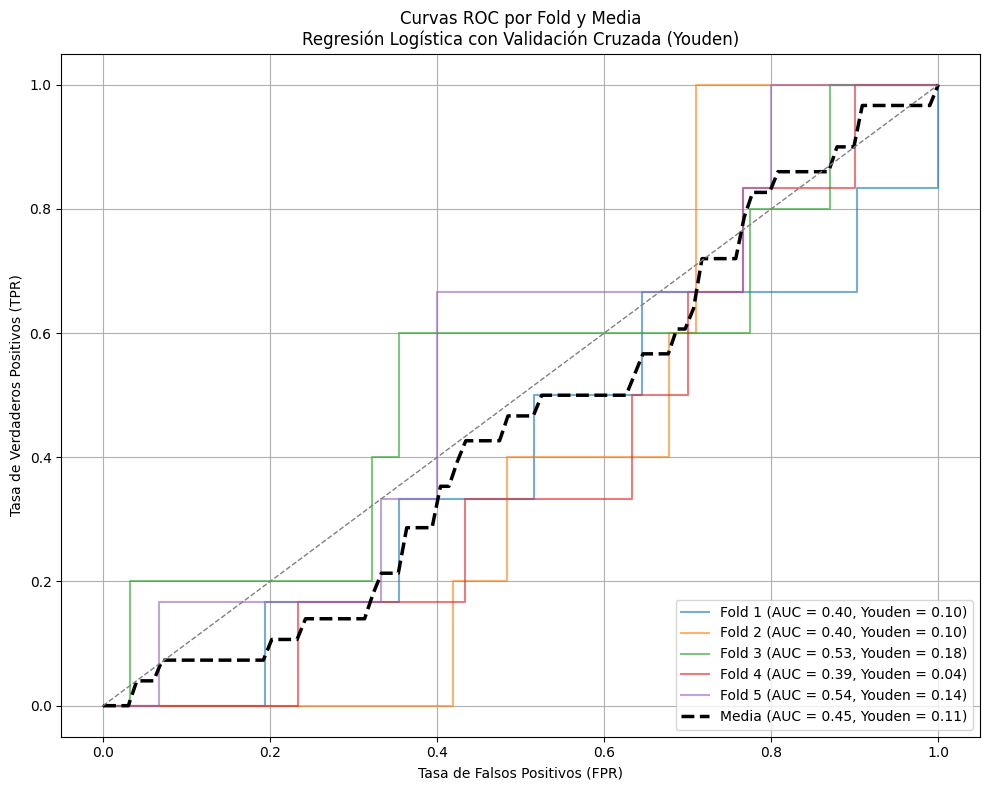


Métricas por Fold:
   Fold       AUC  Sensibilidad  Especificidad  Accuracy  \
0     1  0.397849      0.666667       0.354839  0.405405   
1     2  0.400000      1.000000       0.290323  0.388889   
2     3  0.529032      0.600000       0.645161  0.638889   
3     4  0.388889      1.000000       0.100000  0.250000   
4     5  0.538889      0.666667       0.600000  0.611111   

   Umbral óptimo (Youden)  
0                0.102766  
1                0.095200  
2                0.184051  
3                0.038100  
4                0.136816  

Promedio de métricas:
AUC                       0.450932
Sensibilidad              0.786667
Especificidad             0.398065
Accuracy                  0.458859
Umbral óptimo (Youden)    0.111387
dtype: float64

Matriz de Confusión Total:
[[61 92]
 [ 6 22]]


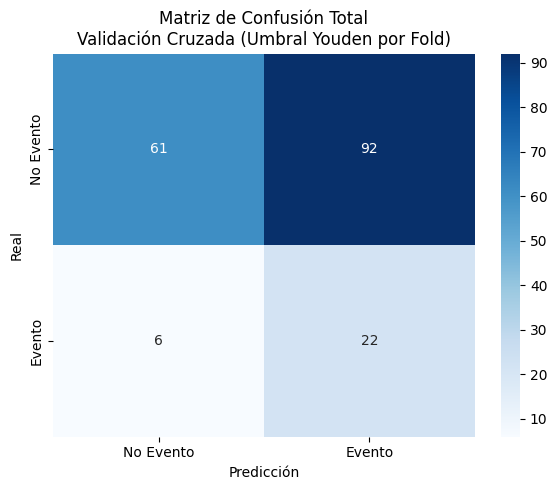

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, accuracy_score
)

# Preparar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto',
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte',
           'Infarto', 'dias_muerte', 'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc',
           'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
youden_thresholds = []
youden_points = []
mean_fpr = np.linspace(0, 1, 100)
metricas_fold = []

# Acumuladores para matriz de confusión total
y_true_total = []
y_pred_total = []

plt.figure(figsize=(10, 8))

for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Índice de Youden
    youden_index = tpr - fpr
    best_idx = np.argmax(youden_index)
    best_threshold = thresholds[best_idx]
    youden_thresholds.append(best_threshold)
    youden_points.append((fpr[best_idx], tpr[best_idx]))

    # Predicción binaria con umbral óptimo
    y_pred = (y_prob >= best_threshold).astype(int)

    # Guardar predicciones
    y_true_total.extend(y_test)
    y_pred_total.extend(y_pred)

    # Métricas
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)
    accuracy = accuracy_score(y_test, y_pred)

    metricas_fold.append({
        'Fold': fold_idx,
        'AUC': roc_auc,
        'Sensibilidad': sensibilidad,
        'Especificidad': especificidad,
        'Accuracy': accuracy,
        'Umbral óptimo (Youden)': best_threshold
    })

    # Curva ROC
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.6,
             label=f'Fold {fold_idx} (AUC = {roc_auc:.2f}, Youden = {best_threshold:.2f})')

# Media de curvas ROC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
mean_threshold = np.mean(youden_thresholds)

plt.plot(mean_fpr, mean_tpr, color='black',
         label=f'Media (AUC = {mean_auc:.2f}, Youden = {mean_threshold:.2f})',
         lw=2.5, linestyle='--')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por Fold y Media\nRegresión Logística con Validación Cruzada (Youden)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tabla de métricas
df_metricas = pd.DataFrame(metricas_fold)
print("\nMétricas por Fold:")
print(df_metricas)

# Promedio de métricas
print("\nPromedio de métricas:")
print(df_metricas.drop(columns='Fold').mean())

# Matriz de Confusión Total
cm_total = confusion_matrix(y_true_total, y_pred_total)
print("\nMatriz de Confusión Total:")
print(cm_total)

# Mostrar matriz de confusión total como heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Evento', 'Evento'], yticklabels=['No Evento', 'Evento'])
plt.title('Matriz de Confusión Total\nValidación Cruzada (Umbral Youden por Fold)')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.tight_layout()
plt.show()

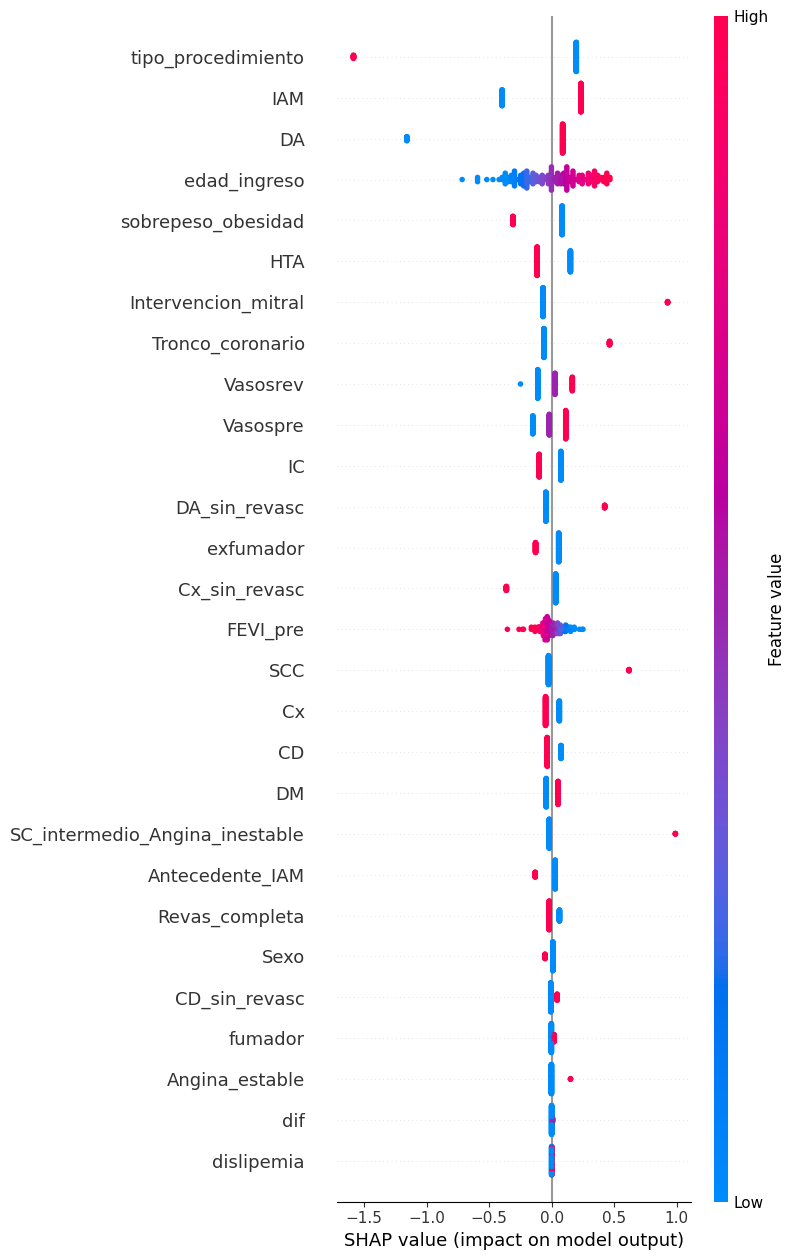

In [44]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Preparar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto',
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte',
           'Infarto', 'dias_muerte', 'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc',
           'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Entrenar modelo sobre todos los datos
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_df_scaled, y)

# Crear un masker para datos independientes (nuevo enfoque recomendado)
masker = shap.maskers.Independent(data=X_df_scaled)

# Crear el explicador SHAP sin el parámetro obsoleto
explainer = shap.Explainer(logreg, masker)

# Obtener valores SHAP
shap_values = explainer(X_df_scaled)

# Graficar todos los valores SHAP
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values.values, X_df_scaled, plot_type="dot", max_display=len(X.columns))

In [45]:
logreg.coef_

array([[-0.02164171,  0.26076499,  0.16824291,  0.41528545, -0.05406996,
        -0.05116923, -0.03678156,  0.00224746,  0.1092757 ,  0.10759621,
        -0.08882498,  0.21661674, -0.53339783, -0.13172079,  0.04708569,
         0.00103817, -0.16468083,  0.00877876, -0.08122405, -0.08638402,
         0.30280088,  0.16540062,  0.02250594,  0.1399281 , -0.05690246,
         0.13356098, -0.13151814,  0.01937933]])

In [46]:
X.columns

Index(['Sexo', 'edad_ingreso', 'Tronco_coronario', 'DA', 'Cx', 'CD',
       'Revas_completa', 'dif', 'Vasosrev', 'Vasospre', 'FEVI_pre',
       'Intervencion_mitral', 'tipo_procedimiento', 'HTA', 'DM', 'dislipemia',
       'sobrepeso_obesidad', 'fumador', 'exfumador', 'IC', 'IAM',
       'SC_intermedio_Angina_inestable', 'Angina_estable', 'SCC',
       'Antecedente_IAM', 'DA_sin_revasc', 'Cx_sin_revasc', 'CD_sin_revasc'],
      dtype='object')

In [47]:
# Inspeccionar las columnas de X después de la exclusión
print("Columnas seleccionadas:", X.columns.tolist())

# Verificar tipos de datos
print("Tipos de datos en X:")
print(X.dtypes.value_counts())

Columnas seleccionadas: ['Sexo', 'edad_ingreso', 'Tronco_coronario', 'DA', 'Cx', 'CD', 'Revas_completa', 'dif', 'Vasosrev', 'Vasospre', 'FEVI_pre', 'Intervencion_mitral', 'tipo_procedimiento', 'HTA', 'DM', 'dislipemia', 'sobrepeso_obesidad', 'fumador', 'exfumador', 'IC', 'IAM', 'SC_intermedio_Angina_inestable', 'Angina_estable', 'SCC', 'Antecedente_IAM', 'DA_sin_revasc', 'Cx_sin_revasc', 'CD_sin_revasc']
Tipos de datos en X:
int64      25
object      2
float64     1
Name: count, dtype: int64


In [48]:
# Revisar valores únicos en cada columna
for col in X.columns:
    print(f"Columna: {col}, Tipos: {X[col].map(type).unique()}")

Columna: Sexo, Tipos: [<class 'int'>]
Columna: edad_ingreso, Tipos: [<class 'int'>]
Columna: Tronco_coronario, Tipos: [<class 'int'>]
Columna: DA, Tipos: [<class 'int'>]
Columna: Cx, Tipos: [<class 'int'>]
Columna: CD, Tipos: [<class 'int'>]
Columna: Revas_completa, Tipos: [<class 'int'>]
Columna: dif, Tipos: [<class 'int'>]
Columna: Vasosrev, Tipos: [<class 'int'>]
Columna: Vasospre, Tipos: [<class 'int'>]
Columna: FEVI_pre, Tipos: [<class 'float'>]
Columna: Intervencion_mitral, Tipos: [<class 'int'>]
Columna: tipo_procedimiento, Tipos: [<class 'int'>]
Columna: HTA, Tipos: [<class 'int'>]
Columna: DM, Tipos: [<class 'int'>]
Columna: dislipemia, Tipos: [<class 'int'>]
Columna: sobrepeso_obesidad, Tipos: [<class 'int'>]
Columna: fumador, Tipos: [<class 'int'>]
Columna: exfumador, Tipos: [<class 'int'>]
Columna: IC, Tipos: [<class 'int'>]
Columna: IAM, Tipos: [<class 'int'>]
Columna: SC_intermedio_Angina_inestable, Tipos: [<class 'int'>]
Columna: Angina_estable, Tipos: [<class 'int'>]
Co

#### Validacion cruzada datos escalados + Youden

Fold 1: Mejor umbral (Youden) = 0.10
Fold 1: Sensibilidad = 0.67, Especificidad = 0.35, Accuracy = 0.41

Fold 2: Mejor umbral (Youden) = 0.10
Fold 2: Sensibilidad = 1.00, Especificidad = 0.29, Accuracy = 0.39

Fold 3: Mejor umbral (Youden) = 0.18
Fold 3: Sensibilidad = 0.60, Especificidad = 0.65, Accuracy = 0.64

Fold 4: Mejor umbral (Youden) = 0.04
Fold 4: Sensibilidad = 1.00, Especificidad = 0.10, Accuracy = 0.25

Fold 5: Mejor umbral (Youden) = 0.14
Fold 5: Sensibilidad = 0.67, Especificidad = 0.60, Accuracy = 0.61

Resultados por Fold:
   Fold  Threshold  Accuracy    Recall  Precision  F1 Score   ROC-AUC
0     1   0.102766  0.405405  0.666667   0.166667  0.266667  0.397849
1     2   0.095200  0.388889  1.000000   0.185185  0.312500  0.400000
2     3   0.184051  0.638889  0.600000   0.214286  0.315789  0.529032
3     4   0.038100  0.250000  1.000000   0.181818  0.307692  0.388889
4     5   0.136816  0.611111  0.666667   0.250000  0.363636  0.538889

Promedio de métricas:
Fold       

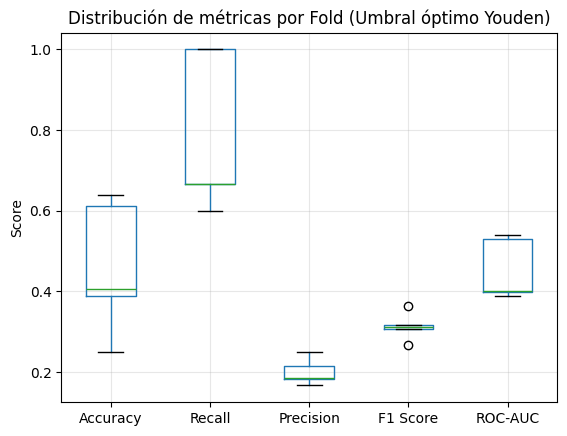

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, roc_curve
)
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar y preparar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto', 
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte', 'Infarto', 'dias_muerte',
           'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []
overall_confusion_matrix = np.zeros((2, 2))

# Ejecutar validación cruzada
for fold, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Modelo
    logreg = LogisticRegression(solver='liblinear', max_iter=1000)
    logreg.fit(X_train, y_train)

    # Predicciones probabilísticas
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]

    # Calcular índice de Youden para encontrar el mejor umbral
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    youden_index = tpr - fpr
    best_idx = np.argmax(youden_index)
    best_threshold = thresholds[best_idx]

    # Clasificación con umbral óptimo
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    # Métricas
    cm = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += cm
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Fold {fold}: Mejor umbral (Youden) = {best_threshold:.2f}")
    print(f"Fold {fold}: Sensibilidad = {recall:.2f}, Especificidad = {cm[0,0]/(cm[0,0]+cm[0,1]):.2f}, Accuracy = {accuracy:.2f}\n")

    fold_results.append({
        'Fold': fold,
        'Threshold': best_threshold,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

# Resultados
results_df = pd.DataFrame(fold_results)
print("Resultados por Fold:")
print(results_df)

# Promedios
mean_results = results_df.mean(numeric_only=True)
print("\nPromedio de métricas:")
print(mean_results)

# Matriz de confusión total
print("\nMatriz de Confusión Total:")
print(overall_confusion_matrix)

# Visualización de métricas por fold
results_df[['Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC-AUC']].boxplot()
plt.title('Distribución de métricas por Fold (Umbral óptimo Youden)')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.show()

#### Curvas ROC folds validacion cruzada + youden

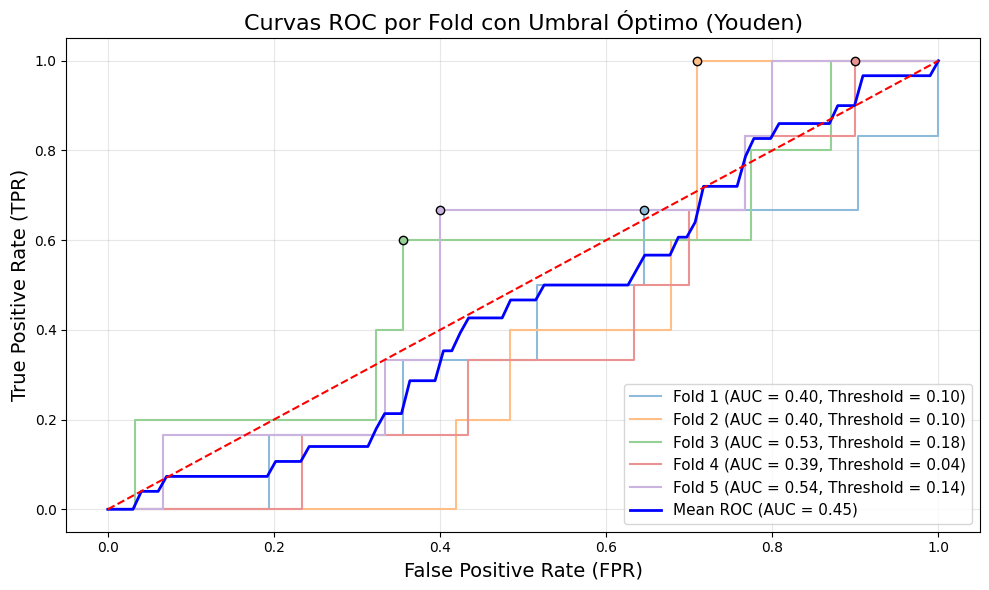

In [50]:
from matplotlib.colors import to_rgba
from matplotlib import colormaps
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto', 
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte', 'Infarto', 'dias_muerte',
           'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para aclarar colores
def lighten_color(color, amount=0.5):
    r, g, b, a = to_rgba(color)
    return (r + (1 - r) * amount, g + (1 - g) * amount, b + (1 - b) * amount, a)

# Preparar colores
colors = colormaps['tab10']
colors_light = [lighten_color(colors(i / 9), amount=0.5) for i in range(5)]

# Variables para curva promedio
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Graficar curvas ROC por fold
plt.figure(figsize=(10, 6))
for fold, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar modelo
    logreg = LogisticRegression(solver='liblinear', max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]

    # Curva ROC y Youden
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    youden_index = tpr - fpr
    best_idx = np.argmax(youden_index)
    best_threshold = thresholds[best_idx]
    best_fpr = fpr[best_idx]
    best_tpr = tpr[best_idx]

    # Interpolación para curva media
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Dibujar curva ROC del fold
    plt.plot(fpr, tpr, color=colors_light[fold - 1],
             label=f'Fold {fold} (AUC = {roc_auc:.2f}, Threshold = {best_threshold:.2f})')
    
    # Punto óptimo
    plt.scatter(best_fpr, best_tpr, color=colors_light[fold - 1], edgecolors='black', zorder=5)

# Curva ROC media
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', linewidth=2, label=f'Mean ROC (AUC = {mean_auc:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Estética
plt.title('Curvas ROC por Fold con Umbral Óptimo (Youden)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Extraemos variabes de mayor peso de la validacion cruzada

In [51]:
import pandas as pd
import numpy as np

# Obtener coeficientes absolutos del modelo ya entrenado
feature_importance = pd.Series(np.abs(logreg.coef_[0]), index=X.columns)

# Ordenar de mayor a menor importancia
top3_vars_cv = feature_importance.sort_values(ascending=False)

# Excluir 'tiempo_meses' si estuviera
top3_vars_cv = [var for var in top3_vars_cv.index if var != 'tiempo_meses'][:3]

print("Top 3 variables según regresión logística (validación cruzada):", top3_vars_cv)

Top 3 variables según regresión logística (validación cruzada): ['tipo_procedimiento', 'Intervencion_mitral', 'sobrepeso_obesidad']


In [52]:
# Filtramos las columnas que no están en la lista "excluir"
df_filtrado = dfe.drop(columns=excluir)
df_filtrado.columns

Index(['Sexo', 'edad_ingreso', 'Tronco_coronario', 'DA', 'Cx', 'CD',
       'Revas_completa', 'dif', 'Vasosrev', 'Vasospre', 'FEVI_pre',
       'Intervencion_mitral', 'tipo_procedimiento', 'HTA', 'DM', 'dislipemia',
       'sobrepeso_obesidad', 'fumador', 'exfumador', 'IC', 'IAM',
       'SC_intermedio_Angina_inestable', 'Angina_estable', 'SCC',
       'Antecedente_IAM', 'DA_sin_revasc', 'Cx_sin_revasc', 'CD_sin_revasc'],
      dtype='object')

#### Riesgos proporcionales de Cox (tres variables de mayor peso en Validación Cruzada)

In [53]:
import statsmodels.formula.api as smf

# df para modelo de Cox con esas variables
df_cox = dfe[['tiempo_meses', 'Muerte_o_Infarto'] + top3_vars_cv].dropna()

# Paso 2: Modelo de Cox con esas variables
modelo_cox = smf.phreg(
    formula="tiempo_meses ~ " + " + ".join(top3_vars_cv),
    data=df_cox,
    status=df_cox["Muerte_o_Infarto"],
    ties="efron"
)

# Ajustamos modelo
resultado = modelo_cox.fit()
print(resultado.summary())

                                Results: PHReg
Model:                         PH Reg                Sample size:          181
Dependent variable:            tiempo_meses          Num. events:          28 
Ties:                          Efron                                          
------------------------------------------------------------------------------
                         log HR log HR SE   HR      t    P>|t|  [0.025  0.975]
------------------------------------------------------------------------------
tipo_procedimiento[T.1] -1.8055    1.2495 0.1644 -1.4450 0.1484 0.0142  1.9029
Intervencion_mitral      1.0405    1.2617 2.8307  0.8247 0.4095 0.2387 33.5618
sobrepeso_obesidad      -0.6995    0.5601 0.4968 -1.2487 0.2118 0.1657  1.4894
Confidence intervals are for the hazard ratios


In [54]:
# variable tipo_procedimiento (ACTP = 0, Pontaje Aortocoronario = 1)
print(dfe['tipo_procedimiento'].value_counts())

tipo_procedimiento
0    163
1     18
Name: count, dtype: int64


#### Validacion cruzada datos escalados + Youden (configurada con Random Forest)

Fold 1: Mejor umbral (Youden) = 0.08
Fold 1: Sensibilidad = 1.00, Especificidad = 0.26, Accuracy = 0.38

Fold 2: Mejor umbral (Youden) = 0.31
Fold 2: Sensibilidad = 0.60, Especificidad = 0.84, Accuracy = 0.81

Fold 3: Mejor umbral (Youden) = 0.22
Fold 3: Sensibilidad = 0.60, Especificidad = 0.77, Accuracy = 0.75

Fold 4: Mejor umbral (Youden) = 0.10
Fold 4: Sensibilidad = 1.00, Especificidad = 0.30, Accuracy = 0.42

Fold 5: Mejor umbral (Youden) = 0.11
Fold 5: Sensibilidad = 0.83, Especificidad = 0.47, Accuracy = 0.53

Resultados por Fold:
   Fold  Threshold  Accuracy    Recall  Precision  F1 Score   ROC-AUC
0     1       0.08  0.378378  1.000000   0.206897  0.342857  0.521505
1     2       0.31  0.805556  0.600000   0.375000  0.461538  0.677419
2     3       0.22  0.750000  0.600000   0.300000  0.400000  0.700000
3     4       0.10  0.416667  1.000000   0.222222  0.363636  0.608333
4     5       0.11  0.527778  0.833333   0.238095  0.370370  0.536111

Promedio de métricas:
Fold       

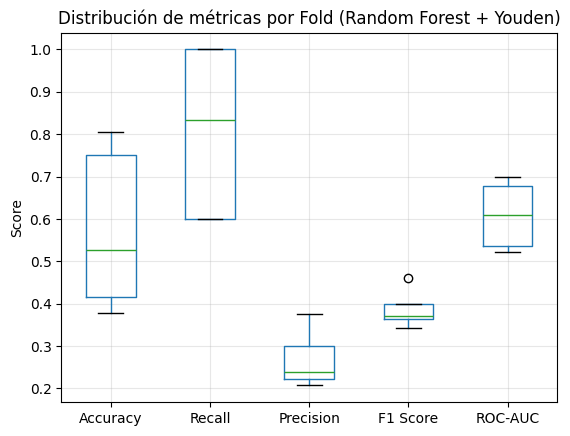

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, roc_curve
)
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar y preparar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto', 
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte', 'Infarto', 'dias_muerte',
           'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []
overall_confusion_matrix = np.zeros((2, 2))

# Ejecutar validación cruzada
for fold, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Modelo: Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predicciones probabilísticas
    y_pred_proba = rf.predict_proba(X_test)[:, 1]

    # Calcular índice de Youden para encontrar el mejor umbral
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    youden_index = tpr - fpr
    best_idx = np.argmax(youden_index)
    best_threshold = thresholds[best_idx]

    # Clasificación con umbral óptimo
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    # Métricas
    cm = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += cm
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Fold {fold}: Mejor umbral (Youden) = {best_threshold:.2f}")
    print(f"Fold {fold}: Sensibilidad = {recall:.2f}, Especificidad = {cm[0,0]/(cm[0,0]+cm[0,1]):.2f}, Accuracy = {accuracy:.2f}\n")

    fold_results.append({
        'Fold': fold,
        'Threshold': best_threshold,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

# Resultados
results_df = pd.DataFrame(fold_results)
print("Resultados por Fold:")
print(results_df)

# Promedios
mean_results = results_df.mean(numeric_only=True)
print("\nPromedio de métricas:")
print(mean_results)

# Matriz de confusión total
print("\nMatriz de Confusión Total:")
print(overall_confusion_matrix)

# Visualización de métricas por fold
results_df[['Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC-AUC']].boxplot()
plt.title('Distribución de métricas por Fold (Random Forest + Youden)')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.show()

#### Curvas ROC folds validacion cruzada + youden (configurada con Random Forest)

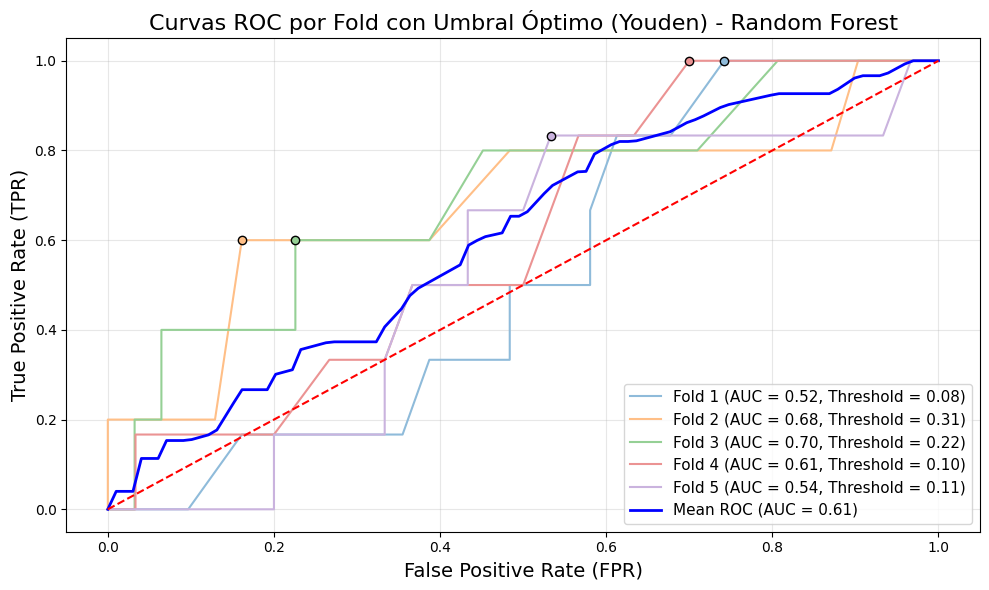

In [56]:
from matplotlib.colors import to_rgba
from matplotlib import colormaps
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto', 
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte', 'Infarto', 'dias_muerte',
           'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para aclarar colores
def lighten_color(color, amount=0.5):
    r, g, b, a = to_rgba(color)
    return (r + (1 - r) * amount, g + (1 - g) * amount, b + (1 - b) * amount, a)

# Preparar colores
colors = colormaps['tab10']
colors_light = [lighten_color(colors(i / 9), amount=0.5) for i in range(5)]

# Variables para curva promedio
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Graficar curvas ROC por fold
plt.figure(figsize=(10, 6))
for fold, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar modelo
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_proba = rf.predict_proba(X_test)[:, 1]

    # Curva ROC y Youden
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    youden_index = tpr - fpr
    best_idx = np.argmax(youden_index)
    best_threshold = thresholds[best_idx]
    best_fpr = fpr[best_idx]
    best_tpr = tpr[best_idx]

    # Interpolación para curva media
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Dibujar curva ROC del fold
    plt.plot(fpr, tpr, color=colors_light[fold - 1],
             label=f'Fold {fold} (AUC = {roc_auc:.2f}, Threshold = {best_threshold:.2f})')
    
    # Punto óptimo
    plt.scatter(best_fpr, best_tpr, color=colors_light[fold - 1], edgecolors='black', zorder=5)

# Curva ROC media
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', linewidth=2, label=f'Mean ROC (AUC = {mean_auc:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Estética
plt.title('Curvas ROC por Fold con Umbral Óptimo (Youden) - Random Forest', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Extraemos variabes de mayor peso de la validacion cruzada + youden (configurada con Random Forest)

In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Cargar y preparar datos
excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto', 
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte', 'Infarto', 'dias_muerte',
           'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']
X = dfe.drop(columns=excluir, errors='ignore')
y = dfe['Muerte_o_Infarto']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Acumulador de importancias
importancias_acumuladas = np.zeros(X.shape[1])

# Entrenar modelos y acumular importancias
for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, y_train = X_scaled[train_idx], y.iloc[train_idx]
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    importancias_acumuladas += rf.feature_importances_

# Calcular importancia media
importancia_media = importancias_acumuladas / cv.get_n_splits()

# Crear Series con nombres de variables
feature_importance_rf = pd.Series(importancia_media, index=X.columns)

# Ordenar y seleccionar las 3 más importantes
top3_vars_cv_rf = feature_importance_rf.sort_values(ascending=False)

# Excluir 'tiempo_meses' si estuviera
top3_vars_cv_rf = [var for var in top3_vars_cv_rf.index if var != 'tiempo_meses'][:3]

print("Top 3 variables según Random Forest (validación cruzada):", top3_vars_cv_rf)

Top 3 variables según Random Forest (validación cruzada): ['FEVI_pre', 'edad_ingreso', 'HTA']


#### Riesgos proporcionales de Cox (tres variables de mayor peso en Validación Cruzada + Youden) (configurada con Random Forest)

In [58]:
import statsmodels.formula.api as smf

# df para modelo de Cox con esas variables
df_cox_rf = dfe[['tiempo_meses', 'Muerte_o_Infarto'] + top3_vars_cv_rf].dropna()

# Paso 2: Modelo de Cox con esas variables
modelo_cox_rf = smf.phreg(
    formula="tiempo_meses ~ " + " + ".join(top3_vars_cv_rf),
    data=df_cox_rf,
    status=df_cox_rf["Muerte_o_Infarto"],
    ties="efron"
)

# Ajustamos modelo
resultado_rf = modelo_cox_rf.fit()
print(resultado_rf.summary())

                          Results: PHReg
Model:                     PH Reg            Sample size:      181
Dependent variable:        tiempo_meses      Num. events:      28 
Ties:                      Efron                                  
------------------------------------------------------------------
              log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
------------------------------------------------------------------
FEVI_pre     -0.0029    0.0243 0.9971 -0.1206 0.9040 0.9507 1.0457
edad_ingreso  0.0334    0.0198 1.0339  1.6883 0.0914 0.9946 1.0748
HTA          -0.2588    0.3933 0.7720 -0.6580 0.5105 0.3572 1.6687
Confidence intervals are for the hazard ratios


In [59]:
dfe.columns

Index(['NHC', 'ApellidosyNombre', 'Sexo', 'edad_ingreso', 'Fecha_Intervención',
       'fecha_alta', 'Muerte', 'Fecha_muerte', 'dias_muerte', 'Causa',
       'Infarto', 'Fecha_infarto', 'Nueva_revascularización',
       'Fecha_Nueva_revascularización', 'Ingeso_ICC', 'Fecha_Ingreso_ICC',
       'Tronco_coronario', 'DA', 'Cx', 'CD', 'DA_revasc', 'Cx_revasc',
       'CD_revasc', 'Revas_completa', 'dif', 'Vasosrev', 'Vasospre',
       'FEVI_pre', 'dias_FEVI_pre', 'FEVI_post', 'dias_FEVI_post',
       'Intervencion_mitral', 'Tipo_intervención_mitral', 'tipo_procedimiento',
       'HTA', 'DM', 'dislipemia', 'sobrepeso_obesidad', 'fumador', 'exfumador',
       'IC', 'IAM', 'SC_intermedio_Angina_inestable', 'Angina_estable', 'SCC',
       'Antecedente_IAM', 'Tabaquismo_Rec', 'tipo_causa', 'DA_sin_revasc',
       'Cx_sin_revasc', 'CD_sin_revasc', 'Muerte_o_Infarto', 'tiempo_meses'],
      dtype='object')

#### Random Forest (Umbral optimo)

Umbral óptimo (máximo sensibilidad + especificidad): 0.20
Matriz de Confusión (Umbral Óptimo):
[[37  9]
 [ 5  4]]

Exactitud: 0.75
Sensibilidad (Recall): 0.44
Especificidad: 0.80

Reporte de Clasificación (Umbral Óptimo):
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.31      0.44      0.36         9

    accuracy                           0.75        55
   macro avg       0.59      0.62      0.60        55
weighted avg       0.79      0.75      0.76        55


ROC-AUC Score: 0.64
Precisión (macro): 0.59
Recall (macro): 0.62
F1-Score (macro): 0.60


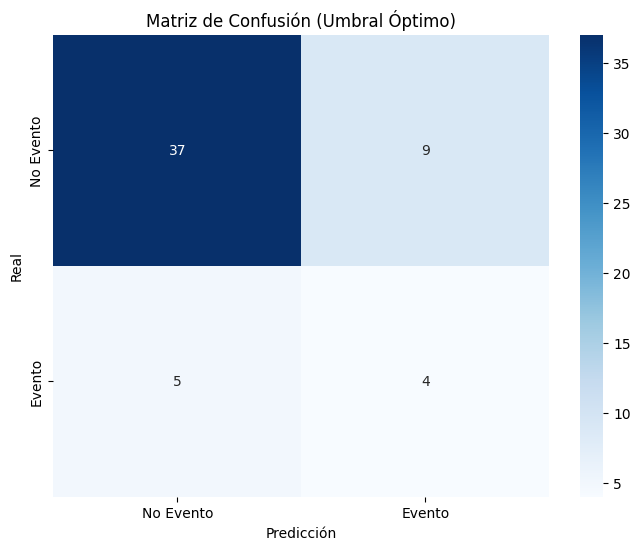

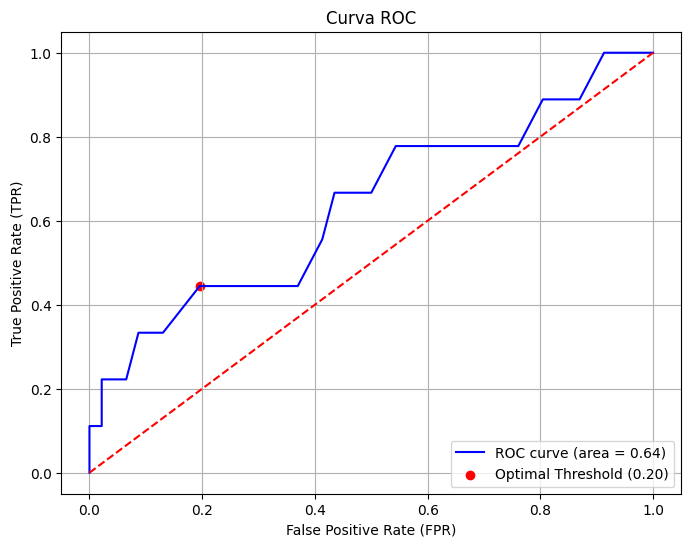

Resultados de Validación Cruzada (Accuracy): [0.81081081 0.83333333 0.86111111 0.83333333 0.83333333]
Promedio de Validación Cruzada: 0.83


In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

excluir = ['Muerte_o_Infarto', 'NHC', 'ApellidosyNombre', 'Fecha_Intervención', 'fecha_alta', 'Fecha_muerte', 'Fecha_infarto', 
           'Fecha_Nueva_revascularización', 'Fecha_Ingreso_ICC', 'Causa', 'tipo_causa', 'Tipo_intervención_mitral', 'Muerte', 'Infarto', 'dias_muerte', 
           'Nueva_revascularización', 'Ingeso_ICC', 'DA_revasc', 'Cx_revasc', 'CD_revasc', 'Tabaquismo_Rec', 'dias_FEVI_post', 'tiempo_meses', 'FEVI_post', 'dias_FEVI_pre']

X = dfe.drop(columns=excluir, errors='ignore')  # Variables independientes
y = dfe['Muerte_o_Infarto']  # Variable dependiente

# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenamos modelo Random Forest 
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=None, 
    min_samples_split=2, 
)
rf.fit(X_train, y_train)

# Probabilidades predichas
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calculamos curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Determinamos umbral óptimo máximo de sens + esp
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral óptimo (máximo sensibilidad + especificidad): {optimal_threshold:.2f}")

# Predicciones con umbral óptimo
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Matriz de confusión con umbral óptimo
cm = confusion_matrix(y_test, y_pred_optimal)
print("Matriz de Confusión (Umbral Óptimo):")
print(cm)

# sensibilidad, especificidad y precisión
tn, fp, fn, tp = cm.ravel()
sensibilidad = tp / (tp + fn)
especificidad = tn / (tn + fp)
exactitud = accuracy_score(y_test, y_pred_optimal)

print(f"\nExactitud: {exactitud:.2f}")
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")

print("\nReporte de Clasificación (Umbral Óptimo):")
print(classification_report(y_test, y_pred_optimal, zero_division=0))

# Métricas adicionales
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred_optimal, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_optimal, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_optimal, average='macro', zero_division=0)

print(f"\nROC-AUC Score: {roc_auc:.2f}")
print(f"Precisión (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1-Score (macro): {f1:.2f}")

# Visualización de resultados
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Evento', 'Evento'], yticklabels=['No Evento', 'Evento'])
plt.title('Matriz de Confusión (Umbral Óptimo)')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='blue')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Línea de referencia
plt.title('Curva ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Validación cruzada para evaluar el modelo
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')  # 5 particiones
print("Resultados de Validación Cruzada (Accuracy):", cv_scores)
print(f"Promedio de Validación Cruzada: {cv_scores.mean():.2f}")

##### Importancia de variables por reducción de impureza

C:\Users\jaime\AppData\Local\Temp\ipykernel_25200\1177553821.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancias_df, palette='viridis')


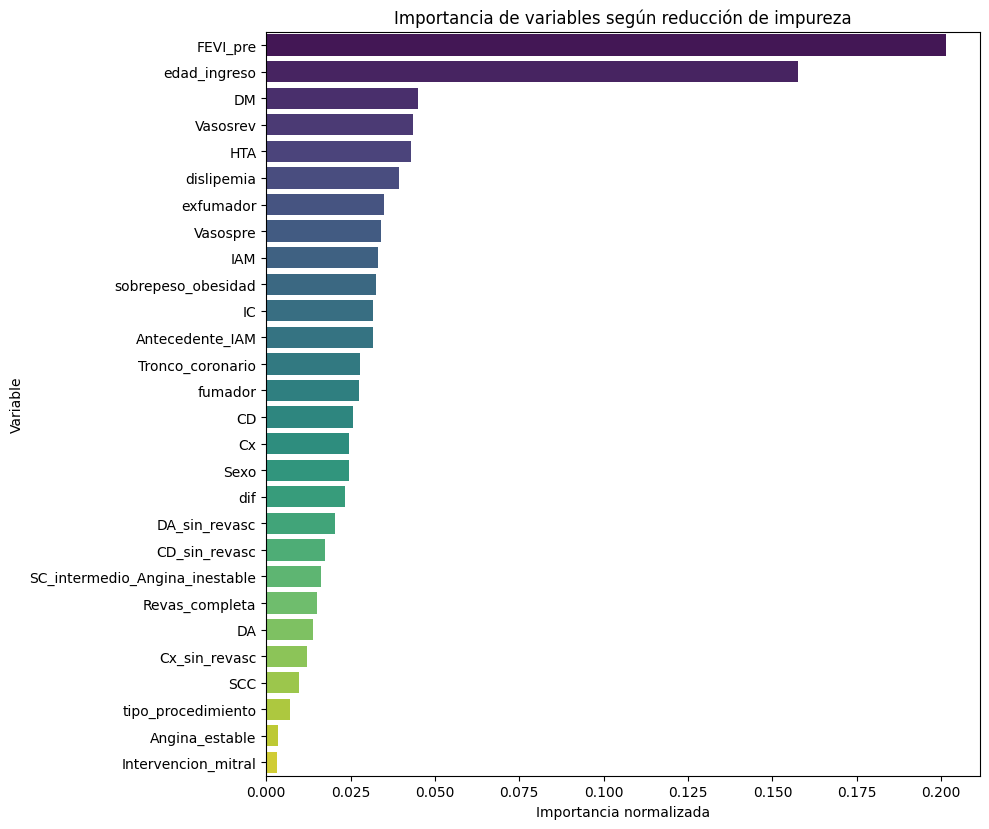


Importancia de todas las variables (ordenadas):
                          Variable  Importancia
0                         FEVI_pre     0.201441
1                     edad_ingreso     0.157559
2                               DM     0.045058
3                         Vasosrev     0.043624
4                              HTA     0.042949
5                       dislipemia     0.039290
6                        exfumador     0.034774
7                         Vasospre     0.034150
8                              IAM     0.033055
9               sobrepeso_obesidad     0.032407
10                              IC     0.031805
11                 Antecedente_IAM     0.031620
12                Tronco_coronario     0.027814
13                         fumador     0.027495
14                              CD     0.025707
15                              Cx     0.024496
16                            Sexo     0.024419
17                             dif     0.023485
18                   DA_sin_revasc     

In [61]:
# Importancia de variables por reducción de impureza
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recuperar nombres de variables originales
feature_names = X.columns

# Obtener importancias y ordenarlas
importancias = rf.feature_importances_
importancias_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar TODAS las variables en el gráfico
plt.figure(figsize=(10, len(importancias_df) * 0.3))  # Ajusta alto en función del número de variables
sns.barplot(x='Importancia', y='Variable', data=importancias_df, palette='viridis')
plt.title('Importancia de variables según reducción de impureza')
plt.xlabel('Importancia normalizada')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# (Opcional) Mostrar la tabla completa en pantalla
print("\nImportancia de todas las variables (ordenadas):")
print(importancias_df.reset_index(drop=True))

##### Importancia de variables por reducción de impureza (Top 15)

C:\Users\jaime\AppData\Local\Temp\ipykernel_25200\2529080007.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=top_importancias, palette='viridis')


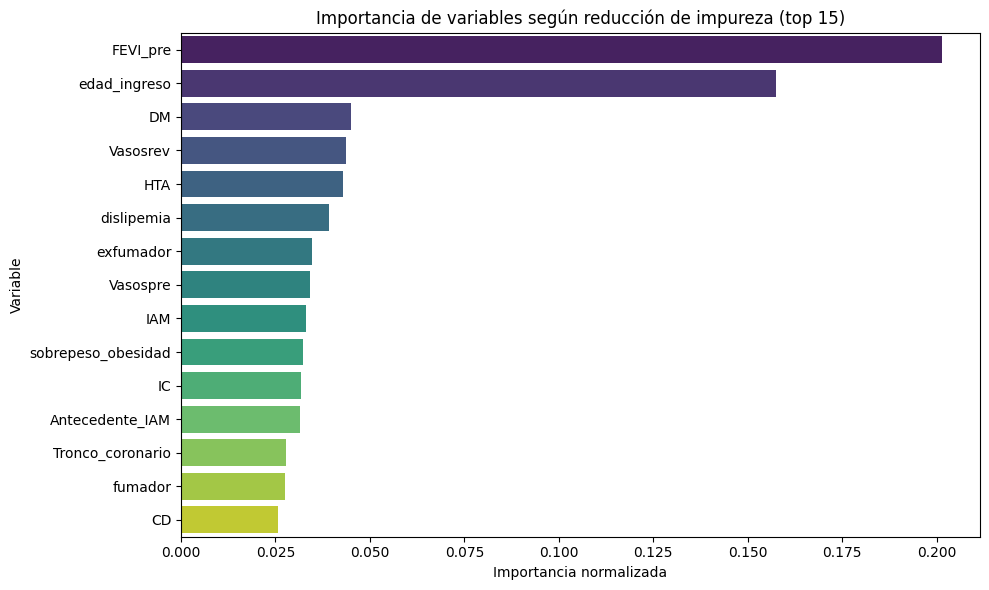


Importancia de todas las variables (ordenadas):
                          Variable  Importancia
0                         FEVI_pre     0.201441
1                     edad_ingreso     0.157559
2                               DM     0.045058
3                         Vasosrev     0.043624
4                              HTA     0.042949
5                       dislipemia     0.039290
6                        exfumador     0.034774
7                         Vasospre     0.034150
8                              IAM     0.033055
9               sobrepeso_obesidad     0.032407
10                              IC     0.031805
11                 Antecedente_IAM     0.031620
12                Tronco_coronario     0.027814
13                         fumador     0.027495
14                              CD     0.025707
15                              Cx     0.024496
16                            Sexo     0.024419
17                             dif     0.023485
18                   DA_sin_revasc     

In [62]:
# Importancia de variables por reducción de impureza
import pandas as pd

# Recuperar nombres de variables originales
feature_names = X.columns

# Obtener importancias y ordenarlas
importancias = rf.feature_importances_
importancias_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar top 15 más importantes (puedes ajustar a tus necesidades)
top_n = 15
top_importancias = importancias_df.head(top_n)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=top_importancias, palette='viridis')
plt.title(f'Importancia de variables según reducción de impureza (top {top_n})')
plt.xlabel('Importancia normalizada')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# (Opcional) Mostrar la tabla completa en pantalla
print("\nImportancia de todas las variables (ordenadas):")
print(importancias_df.reset_index(drop=True))

#### Gráfico Shap Values (Random Forest)

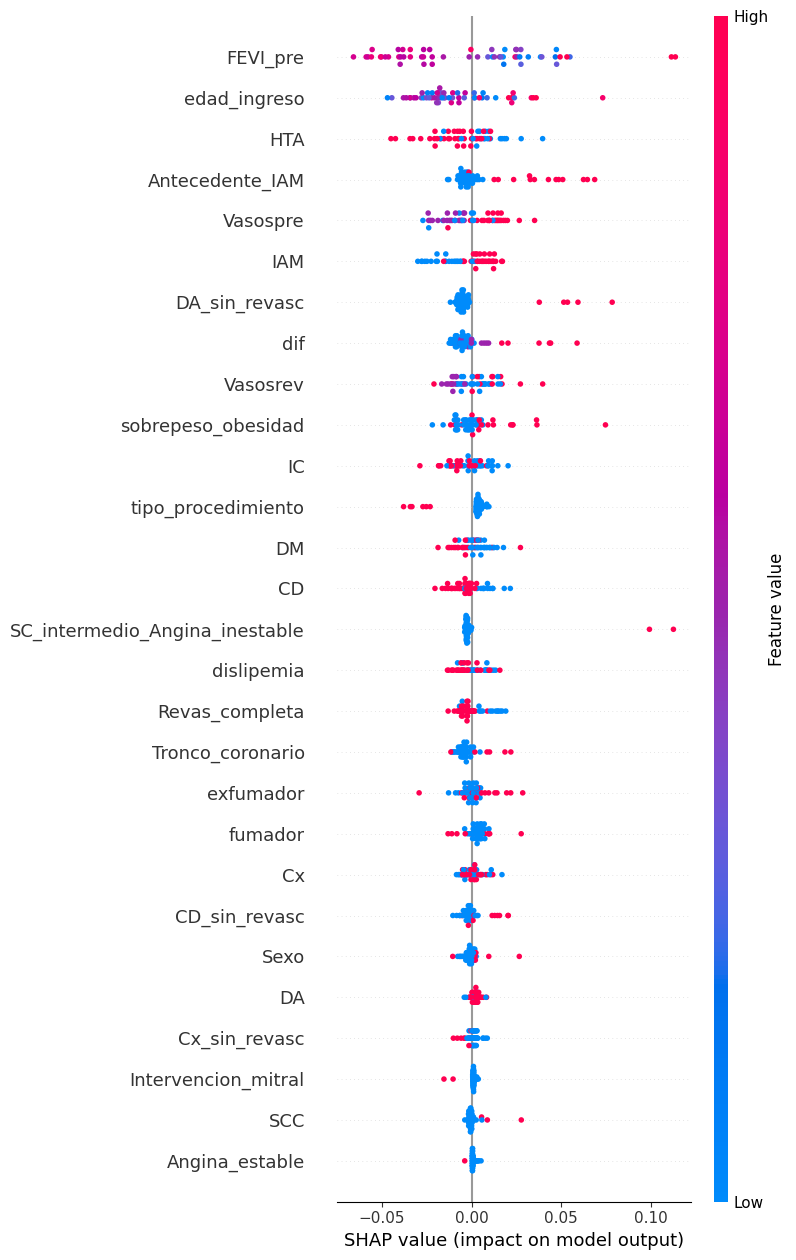

In [63]:
import shap
import matplotlib.pyplot as plt

# Convertir X_test de nuevo a DataFrame con nombres de columnas
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Explicador SHAP basado en árboles
explainer = shap.TreeExplainer(rf, feature_perturbation="tree_path_dependent")

# Obtener valores SHAP
shap_values = explainer.shap_values(X_test_df)

# Si hay más de una clase, seleccionamos la clase positiva
if isinstance(shap_values, list):  
    shap_values = shap_values[1]  # Para clasificación binaria con lista
elif shap_values.ndim == 3:
    shap_values = shap_values[:, :, 1]  # Para clasificación binaria con array 3D

# Graficar SHAP Summary Plot con todas las variables
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_df, plot_type="dot", max_display=len(X_test_df.columns))

In [64]:
import numpy as np

# Calcular importancia media absoluta de los SHAP values
shap_importance = np.abs(shap_values).mean(axis=0)

# Obtener índice ordenado (descendente) de importancia
sorted_idx = np.argsort(shap_importance)[::-1]

# Obtener las 4 variables más importantes
top4_vars = X_test_df.columns[sorted_idx[:4]].tolist()

# Eliminar 'tiempo_meses' si está presente
top3_vars_shap = [var for var in top4_vars if var != 'tiempo_meses'][:3]

print("Top 3 variables según SHAP values (excluyendo tiempo_meses):")
print(top3_vars_shap)

Top 3 variables según SHAP values (excluyendo tiempo_meses):
['FEVI_pre', 'edad_ingreso', 'HTA']


In [65]:
'DA_sin_revasc'

'DA_sin_revasc'

#### Riesgos proporcionales de Cox (tres variables de mayor peso en Shap values)

In [66]:
import pandas as pd
import statsmodels.formula.api as smf

# Asegúrate de que no haya valores nulos en las variables seleccionadas
variables_shap = ['FEVI_pre', 'edad_ingreso', 'HTA']
variables_modelo = ['tiempo_meses', 'Muerte_o_Infarto'] + variables_shap

# Filtrar y eliminar filas con datos faltantes
df_cox_shap = dfe[variables_modelo].dropna()

# Definir la fórmula del modelo de Cox
formula_cox = "tiempo_meses ~ " + " + ".join(variables_shap)

# Ajustar el modelo de riesgos proporcionales de Cox
modelo_cox_shap = smf.phreg(
    formula=formula_cox,
    data=df_cox_shap,
    status=df_cox_shap["Muerte_o_Infarto"],  # Variable de evento (1=evento, 0=censura)
    ties="efron"  # Método para manejo de empates (recomendado)
)

# Entrenar el modelo
resultado_shap = modelo_cox_shap.fit()

# Mostrar resumen de resultados
print(resultado_shap.summary())

                          Results: PHReg
Model:                     PH Reg            Sample size:      181
Dependent variable:        tiempo_meses      Num. events:      28 
Ties:                      Efron                                  
------------------------------------------------------------------
              log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
------------------------------------------------------------------
FEVI_pre     -0.0029    0.0243 0.9971 -0.1206 0.9040 0.9507 1.0457
edad_ingreso  0.0334    0.0198 1.0339  1.6883 0.0914 0.9946 1.0748
HTA          -0.2588    0.3933 0.7720 -0.6580 0.5105 0.3572 1.6687
Confidence intervals are for the hazard ratios


In [69]:
!jupyter nbconvert --to markdown "Downloads/Code Anexo TFG.ipynb"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Downloads/Code Anexo TFG.ipynb' matched no files


In [71]:
!cd

C:\Users\jaime\Downloads


In [72]:
!dir

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 1893-E30B

 Directorio de C:\Users\jaime\Downloads

04/07/2025  01:34    <DIR>          .
06/06/2025  21:10    <DIR>          ..
04/07/2025  01:20    <DIR>          .ipynb_checkpoints
03/05/2025  20:45           264.542 1FD7C5F6-1EC2-45E6-A0D8-94F7E9A3E533.jpeg
25/04/2025  18:57           836.672 7FAC099D-D634-49AB-9A40-53362E014A72.jpeg
27/05/2025  19:34           137.305 Aplicaciones de ML en medicina.png
19/03/2025  23:47    <DIR>          Base Alfredo Copia
24/05/2025  23:55            38.618 Bibliografia_y_anexo_APA7.docx
20/06/2025  19:39            59.348 CARTA DE PAGO.pdf
20/06/2025  18:08            44.130 cartaadmision70926022W.pdf
27/06/2025  11:31           421.060 certificacion-academica-oficial.pdf
26/04/2025  18:43           188.636 Certificado_Notas.pdf
19/03/2025  23:27        10.697.088 ChromeSetup.exe
04/07/2025  01:34         3.691.414 Code Anexo TFG.ipynb
04/07/2025  01:27             7.246 c

In [73]:
!jupyter nbconvert --to markdown "C:/Users/jaime/Downloads/Code Anexo TFG.ipynb"

[NbConvertApp] Converting notebook C:/Users/jaime/Downloads/Code Anexo TFG.ipynb to markdown
[NbConvertApp] Support files will be in Code Anexo TFG_files\
[NbConvertApp] Making directory C:/Users/jaime/Downloads\Code Anexo TFG_files
[NbConvertApp] Writing 171385 bytes to C:\Users\jaime\Downloads\Code Anexo TFG.md


In [74]:
!jupyter nbconvert --to html "C:/Users/jaime/Downloads/Code Anexo TFG.ipynb"

[NbConvertApp] Converting notebook C:/Users/jaime/Downloads/Code Anexo TFG.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 99 image(s).
[NbConvertApp] Writing 4208145 bytes to C:\Users\jaime\Downloads\Code Anexo TFG.html


In [75]:
!jupyter nbconvert --to script "C:/Users/jaime/Downloads/Code Anexo TFG.ipynb"

[NbConvertApp] Converting notebook C:/Users/jaime/Downloads/Code Anexo TFG.ipynb to script
[NbConvertApp] Writing 62649 bytes to C:\Users\jaime\Downloads\Code Anexo TFG.py
